# Importar as bibliotecas necessárias

In [1]:
#import matplotlib as mpl
# import seaborn as sns
import datetime
# import sklearn
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.decomposition import KernelPCA
import numpy as np
import pandas as pd
# import math
# import keras
import matplotlib.pyplot as plt
import tensorflow as tf
# import seaborn as sns
import json
# Time library to know how much time things take
import time
import random

2025-04-14 21:03:13.982077: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Configurar execução

In [2]:
run_start = time.time()
# run date isoformat
run_date = datetime.datetime.now()
print(run_date.isoformat())
print(run_date.strftime("%Y-%m-%d %H:%M:%S.%f"))

2025-04-14T21:03:18.492431
2025-04-14 21:03:18.492431


In [3]:
NUMBER_OF_SUB_EXPERIMENT = 1
MODEL_TO_USE = 2

# COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMNS_TO_USE = ['IBOVESPA - Close']
COLUMN_TO_PREDICT = 'IBOVESPA - Close'

# Dataframe constants
# Train, val and test split
START_ON_FIRST_VALID_DATE = True
START_DATE = None # '1995-01-02' # None
END_DATE = None # '2016-04-22' # None
TYPE_OF_UNIT = 'customDays'
# csv have 7993 data rows
TRAINING_SIZE = '1994-01-03'
VALIDATION_SIZE = '2023-10-01'
TESTING_SIZE = '2024-10-01'
FILE = 'data/2 - processed/normalized_data.csv'

# Keras config constants
BATCH_SIZE = 32
MAX_EPOCHS = 500
LEARNING_RATE = 0.01
LEARNING_DECAY = 0.9
DECAY_STEPS = 1000
PATIENCE = 10
# DECAY_EVERY_EPOCHS = 2
NUM_FEATURES = 10 # None # 100
RANDOM_SEED = 280
INPUT_WINDOW_SIZE = 40
OUTPUT_WINDOW_SIZE = 5
# Model constantsNUM_FEATURE
LOSS_FUNCTION = 'MAE'
MISMATCH_PENALITY = 2

# Save data constants
RUN_MOMENT = "2025-04-14 21:03:11"
SAVE_FILE_PATH = 'results/experiment_1'

# Comment to help Orquestrator to find the variables

In [4]:
# # define columns to use and columns to predict
# if NUMBER_OF_SUB_EXPERIMENT == 1:
#     COLUMNS_TO_USE = ['IBOVESPA - Close']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 2:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Spread']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 3:'DXY - Close', 'Gold - Close', 'Brent Crude Oil - Close'
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 5:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 6:
#     COLUMNS_TO_USE = ['IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close %'
# if NUMBER_OF_SUB_EXPERIMENT == 7:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 8:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - Spread %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'
# if NUMBER_OF_SUB_EXPERIMENT == 9:
#     COLUMNS_TO_USE = ['IBOVESPA - Close', 'IBOVESPA - Close %', 'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Open %']
#     COLUMN_TO_PREDICT = 'IBOVESPA - Close'

In [5]:
MODEL_NAME = ''
if MODEL_TO_USE == 1:
    MODEL_NAME = 'Model_1'
elif MODEL_TO_USE == 2:
    MODEL_NAME = 'Model_2'
elif MODEL_TO_USE == 3:
    MODEL_NAME = 'Model_3'
else:
    # throw error
    raise ValueError("MODEL_TO_USE must be 1, 2 or 3")

In [6]:
# Config fix seed
tf.random.set_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [7]:
save_file_name = f"{RUN_MOMENT}-s{NUMBER_OF_SUB_EXPERIMENT}-m{MODEL_TO_USE}"

In [8]:
# load normalized data from /data/2 - processed/normalized_data.csv
imported_df = pd.read_csv(FILE, index_col=0)

In [9]:
df_x_values = imported_df.copy()
# order on index
df_x_values = df_x_values.sort_index(ascending=True)
# turn index into column
df_x_values.reset_index(inplace=True)
# remove the first column (index)
df_x_values.drop(columns=['index'], inplace=True)
df_x_values.head()

,IBOVESPA - Close,IBOVESPA - High,IBOVESPA - Low,IBOVESPA - Open,Dólar - Close,Dólar - High,Dólar - Low,Dólar - Open,Dow Jones - Close,Dow Jones - High,...,IBOVESPA - Spread %,Kospi - Spread %,Minério de Ferro - Spread %,Nasdaq - Spread %,Nikkei - Spread %,Petróleo Brent - Spread %,Petróleo WTI - Spread %,S&P 500 - Spread %,STOXX 600 - Spread %,Shanghai SE - Spread %
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.003941,0.003148,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.000150,0.000150,0.000049,0.000034,0.0,0.0,0.0,0.0,0.004600,0.003605,...,0.036606,0.0,0.0,0.029525,0.000000,0.0,0.0,0.084905,0.0,0.0
2,0.000299,0.000406,0.000200,0.000183,0.0,0.0,0.0,0.0,0.004961,0.003965,...,0.020442,0.0,0.0,0.119266,0.201590,0.0,0.0,0.065165,0.0,0.0
3,0.000468,0.000484,0.000350,0.000333,0.0,0.0,0.0,0.0,0.005083,0.004311,...,0.008583,0.0,0.0,0.056198,0.049836,0.0,0.0,0.095393,0.0,0.0
4,0.000703,0.000704,0.000519,0.000502,0.0,0.0,0.0,0.0,0.005490,0.004630,...,0.015204,0.0,0.0,0.182793,0.129181,0.0,0.0,0.162195,0.0,0.0


Verificar correlação dos dados

In [10]:
corr = df_x_values.corr()[COLUMN_TO_PREDICT]
corr = corr.sort_values()
print(corr.to_string())

Meta Selic                    -0.258086
IPCA                          -0.183215
INPC                          -0.181477
Taxa acumulada no período     -0.181264
IBOVESPA - High %             -0.028419
IBOVESPA - Low %              -0.025172
IBOVESPA - Close %            -0.023741
IBOVESPA - Open %             -0.023504
HanSeng Index - Spread %      -0.015235
IBOVESPA - Spread %           -0.014234
Dow Jones - Spread %          -0.011542
S&P 500 - Spread %            -0.011357
Nasdaq - Spread %             -0.009685
Nikkei - Spread %             -0.003974
FTSE 100 - Spread %           -0.003755
Minério de Ferro - Spread %    0.000635
HanSeng Index - Open %         0.002705
HanSeng Index - Low %          0.002773
HanSeng Index - Close %        0.002917
HanSeng Index - High %         0.003144
DAX - Spread %                 0.004029
CAC 40 - Spread %              0.004522
Dow Jones - Open %             0.004659
CAC 40 - Open %                0.004786
Dow Jones - Low %              0.004847


In [11]:
corr.index

Index(['Meta Selic', 'IPCA', 'INPC', 'Taxa acumulada no período',
       'IBOVESPA - High %', 'IBOVESPA - Low %', 'IBOVESPA - Close %',
       'IBOVESPA - Open %', 'HanSeng Index - Spread %', 'IBOVESPA - Spread %',
       ...
       'Kospi - High', 'ASX 200 - Open', 'ASX 200 - Low', 'ASX 200 - Close',
       'ASX 200 - High', 'PIB', 'IBOVESPA - Open', 'IBOVESPA - High',
       'IBOVESPA - Low', 'IBOVESPA - Close'],
      dtype='object', length=200)

In [12]:
df_x_values = df_x_values[COLUMNS_TO_USE]

array([<Axes: >], dtype=object)

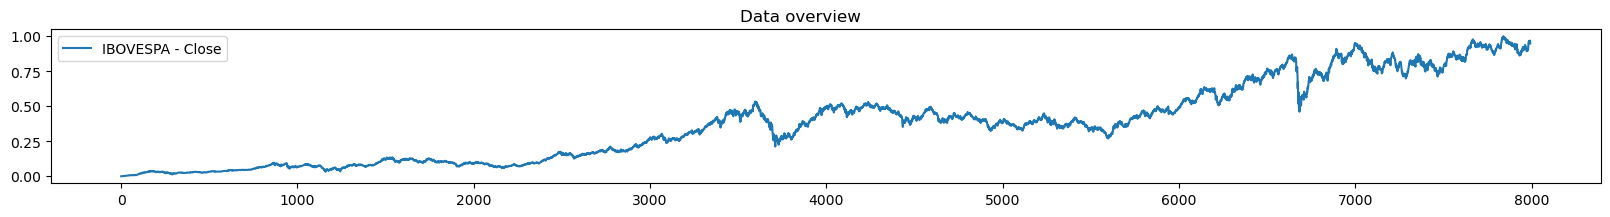

In [13]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

array([<Axes: >], dtype=object)

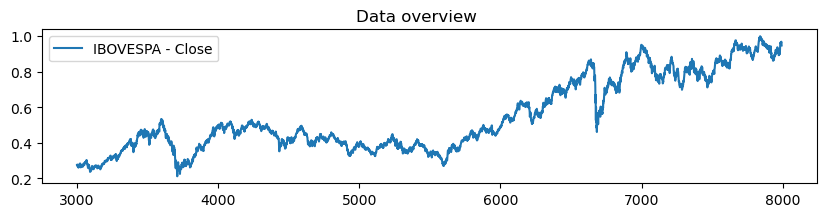

In [14]:
df_x_values[3000:].plot(subplots=True, figsize=(10, 2*len(df_x_values.columns)), title="Data overview") 

In [15]:
imported_df_cpy = imported_df.copy()
# remove the first column (index)
imported_df_cpy.reset_index(inplace=True)
# find date (index) of the 3050th row
print(imported_df_cpy.loc[3700, 'index'])
print(imported_df_cpy.loc[4860, 'index'])

2008-10-13
2013-03-27


Dividir os dados em treino e teste

In [16]:
valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
valid_indexes.head()
# find the first valid date for each column
# the index is the column name and the value is the value in "First Valid Index" column
valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
valid_indexes_dict

{'IBOVESPA - Close': '1994-01-03',
 'IBOVESPA - High': '1994-01-03',
 'IBOVESPA - Low': '1994-01-03',
 'IBOVESPA - Open': '1994-01-03',
 'Dólar - Close': '2003-12-01',
 'Dólar - High': '2003-12-01',
 'Dólar - Low': '2003-12-01',
 'Dólar - Open': '2003-12-01',
 'Dow Jones - Close': '1994-01-03',
 'Dow Jones - High': '1994-01-03',
 'Dow Jones - Low': '1994-01-03',
 'Dow Jones - Open': '1994-01-03',
 'S&P 500 - Close': '1994-01-03',
 'S&P 500 - High': '1994-01-03',
 'S&P 500 - Low': '1994-01-03',
 'S&P 500 - Open': '1994-01-03',
 'Nasdaq - Close': '1994-01-03',
 'Nasdaq - High': '1994-01-03',
 'Nasdaq - Low': '1994-01-03',
 'Nasdaq - Open': '1994-01-03',
 'Shanghai SE - Close': '1997-07-02',
 'Shanghai SE - High': '1997-07-02',
 'Shanghai SE - Low': '1997-07-02',
 'Shanghai SE - Open': '1997-07-02',
 'Nikkei - Close': '1994-01-04',
 'Nikkei - High': '1994-01-04',
 'Nikkei - Low': '1994-01-04',
 'Nikkei - Open': '1994-01-04',
 'HanSeng Index - Close': '1994-01-03',
 'HanSeng Index - High':

In [17]:
if START_ON_FIRST_VALID_DATE:
    # get valid indexes 
    valid_indexes = pd.read_csv('data/2 - processed/valid_indexes.csv', index_col=0)
    valid_indexes_dict = valid_indexes.to_dict()['First Valid Index']
    valid_indexes_dict
    biggest_valid_index = min(valid_indexes_dict.values())
    for col in df_x_values.columns:
        # get the first valid index for each column
        first_valid_index = valid_indexes_dict[col]
        # check if the first valid index is greater than the biggest valid index
        if first_valid_index > biggest_valid_index:
            biggest_valid_index = first_valid_index
    # filter the dataframe to start on the first valid index, first finding the numeric index searching imported_df
    imported_df_cp = imported_df.copy()
    # reset the index
    imported_df_cp.reset_index(inplace=True)
    # find the first valid index
    first_valid_index = imported_df_cp[imported_df_cp['index'] == biggest_valid_index].index[0]
    print(f"First valid index: {first_valid_index}")

if START_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the START_DATE
    start_index = imported_df_cp[imported_df_cp['index'] == START_DATE].index[0]

if END_DATE is not None:
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # find the index of the END_DATE
    end_index = imported_df_cp[imported_df_cp['index'] == END_DATE].index[0]

# crop the dataframe to start on the first valid index
if START_ON_FIRST_VALID_DATE and START_DATE is not None:
    if first_valid_index > start_index:
        # crop the dataframe to start on the first valid index
        df_x_values = df_x_values[first_valid_index:]
    else:
        # crop the dataframe to start on the START_DATE
        df_x_values = df_x_values[start_index:]
elif START_ON_FIRST_VALID_DATE:
    # crop the dataframe to start on the first valid index
    df_x_values = df_x_values[first_valid_index:]
elif START_DATE is not None:
    # crop the dataframe to start on the START_DATE
    df_x_values = df_x_values[start_index:]

# crop the dataframe to end on the END_DATE
if END_DATE is not None:
    # crop the dataframe to end on the END_DATE
    df_x_values = df_x_values[:end_index]
    # crop imported_df_cp to end on the END_DATE
    imported_df_cp = imported_df_cp[:end_index]

# calculate de size of training, validation and testing data
if TYPE_OF_UNIT == "percentual":
    train_size = int(len(df_x_values) * TRAINING_SIZE)
    validation_size = int(len(df_x_values) * VALIDATION_SIZE)
    test_size = int(len(df_x_values) * TESTING_SIZE)
elif TYPE_OF_UNIT == "days":
    train_size = TRAINING_SIZE
    validation_size = VALIDATION_SIZE
    test_size = TESTING_SIZE
elif TYPE_OF_UNIT == "weeks":
    train_size = TRAINING_SIZE * 7
    validation_size = VALIDATION_SIZE * 7
    test_size = TESTING_SIZE * 7
elif TYPE_OF_UNIT == "months":
    train_size = TRAINING_SIZE * 30
    validation_size = VALIDATION_SIZE * 30
    test_size = TESTING_SIZE * 30
elif TYPE_OF_UNIT == "customDays":
    # if iported_df_cp is not defined, define it
    if 'imported_df_cp' not in locals():
        imported_df_cp = imported_df.copy()
        # reset the index
        imported_df_cp.reset_index(inplace=True)
    # if TRAINING_SIZE is not in imported_df_cp, find the next closest date
    if TRAINING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TRAINING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Training date not found. Closest date to {TRAINING_SIZE} is {closest_date}")
        # set TRAINING_SIZE to the closest date
        TRAINING_SIZE = closest_date
    # if VALIDATION_SIZE is not in imported_df_cp, find the next closest date
    if VALIDATION_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > VALIDATION_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Validation date not found. Closest date to {VALIDATION_SIZE} is {closest_date}")
        # set VALIDATION_SIZE to the closest date
        VALIDATION_SIZE = closest_date
    # if TESTING_SIZE is not in imported_df_cp, find the next closest date
    if TESTING_SIZE not in imported_df_cp['index'].values:
        # find the next closest date
        closest_date = imported_df_cp[imported_df_cp['index'] > TESTING_SIZE].iloc[0]['index']
        # print the closest date
        print(f"Testing date not found. Closest date to {TESTING_SIZE} is {closest_date}")
        # set TESTING_SIZE to the closest date
        TESTING_SIZE = closest_date
    
    # if VALIDATION_SIZE is not in imported_df_cp, throw error
    # get the index of TRAINING_SIZE date
    train_index = imported_df_cp[imported_df_cp['index'] == TRAINING_SIZE].index[0]
    # get the index of VALIDATION_SIZE date
    validation_index = imported_df_cp[imported_df_cp['index'] == VALIDATION_SIZE].index[0]
    # get the index of TESTING_SIZE date
    test_index = imported_df_cp[imported_df_cp['index'] == TESTING_SIZE].index[0] 
    # throw error if some of the indexes is not valid
    if train_index < 0 or validation_index < 0 or test_index < 0:
        raise ValueError("Some of the indexes are not valid.")
    # thow error if the indexes are not in the same order
    if train_index > validation_index or validation_index > test_index:
        raise ValueError("The indexes are not in the same order.")
    # calculate the size of the training, validation and testing data
    train_size = len(imported_df_cp[train_index:validation_index])
    validation_size = len(imported_df_cp[validation_index:test_index])
    test_size = len(imported_df_cp[test_index:])
else:
    raise ValueError("Invalid type_of_unit. Must be 'days', 'weeks', 'months' or 'percentual'.")

if START_ON_FIRST_VALID_DATE:
    # if train_size+validation_size+test_size is greater than the size of the dataframe, adjust train_size
    # to be the size of the dataframe minus validation_size and test_size
    if train_size + validation_size + test_size > len(df_x_values):
        # adjust train_size to be the size of the dataframe minus validation_size and test_size
        train_size = len(df_x_values) - validation_size - test_size
        print(f"Adjusted train size: {train_size}")
    # check if train_size is less than 0
    if train_size < 0:
        raise ValueError("Train size is less than 0. Please check the sizes of the data.")

# check if sum of sizes is less than the size of the dataframe
if train_size + validation_size + test_size > len(df_x_values):
    raise ValueError("Sum of train, validate and test sizes is greater than the size of the dataframe.")

# create the train, validation and test dataframes
train_df = df_x_values[-(train_size + test_size + validation_size):-(test_size + validation_size)]
val_df = df_x_values[-(test_size + validation_size):-test_size]
test_df = df_x_values[-(test_size):]

# check the size of the data
print(f"Training data size: {len(train_df)}")
print(f"Validating data size: {len(val_df)}")
print(f"Testing data size: {len(test_df)}")


First valid index: 0
Validation date not found. Closest date to 2023-10-01 is 2023-10-02
Training data size: 7603
Validating data size: 261
Testing data size: 129


array([<Axes: >], dtype=object)

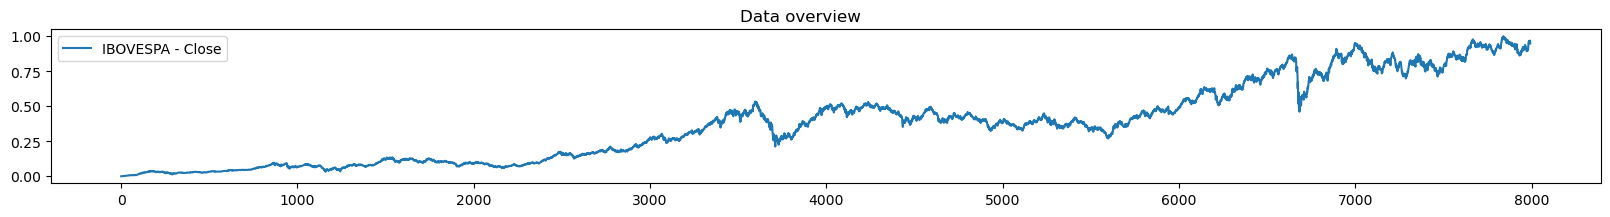

In [18]:
df_x_values.plot(subplots=True, figsize=(20, 2*len(df_x_values.columns)), title="Data overview") 

In [19]:
len(train_df), len(val_df), len(test_df), len(df_x_values)

(7603, 261, 129, 7993)

Criar a classe/função geradora das janelas

In [20]:
class WindowGenerator():
  def __init__(self, INPUT_WINDOW_SIZE, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.INPUT_WINDOW_SIZE = INPUT_WINDOW_SIZE
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = INPUT_WINDOW_SIZE + shift

    self.input_slice = slice(0, INPUT_WINDOW_SIZE)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])
  
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack(
          [labels[:, :, self.column_indices[name]] for name in self.label_columns],
          axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.INPUT_WINDOW_SIZE, None])
    labels.set_shape([None, self.label_width, None])

    return inputs, labels

  def plot(self, model=None, plot_col='IBOVESPA - Close', max_subplots=3):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for i in range(max_n):
      n = i#random.randint(0, len(inputs)-1)
      plt.subplot(max_n, 1, i+1)
      plt.ylabel(f'{plot_col} ({n}) [normed]')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index],
              label='Inputs', marker='.', zorder=-10)

      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index

      if label_col_index is None:
        continue

      plt.scatter(self.label_indices, labels[n, :, label_col_index],
                  edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64)

      if n == 0:
        plt.legend()

    plt.xlabel('Time [day]')

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.utils.timeseries_dataset_from_array(
        data=data,
        targets=None,
        sequence_length=self.total_window_size,
        sequence_stride=1,
        shuffle=False,
        # shuffle=True,
        seed=RANDOM_SEED,
        batch_size=BATCH_SIZE,)

    ds = ds.map(self.split_window)

    return ds

  @property
  def train(self):
    return self.make_dataset(self.train_df)

  @property
  def val(self):
    return self.make_dataset(self.val_df)

  @property
  def test(self):
    return self.make_dataset(self.test_df)
  
  @property
  def example(self):
    """Get and cache an example batch of `inputs, labels` for plotting."""
    result = getattr(self, '_example', None)
    if result is None:
      # No example batch was found, so get one from the `.train` dataset
      result = next(iter(self.test))
      # And cache it for next time
      self._example = result
    return result

Criar função de erro customizado, aumentando o peso de previsões na direção incorreta

In [21]:
import keras.backend as K
import tensorflow as tf

def custom_loss(y_true, y_pred):
    threshold = 0.5955062488  # Define the threshold

    # Calculate the error between the true and predicted values
    error = y_true - y_pred
    
    # Determine the direction (increase or decrease) for both true and predicted values
    true_direction = tf.cast(tf.greater(y_true, threshold), tf.float32)  # 1 if true value is above threshold (increase), 0 if below (decrease)
    pred_direction = tf.cast(tf.greater(y_pred, threshold), tf.float32)  # 1 if predicted value is above threshold (increase), 0 if below (decrease)
    
    # Check for mismatches: wrong direction between true and predicted
    direction_mismatch = tf.abs(true_direction - pred_direction)  # 1 if directions mismatch, 0 if they match
    
    # Calculate the weighted error: apply a higher penalty when directions mismatch
    loss = tf.square(error) * (1 + MISMATCH_PENALITY * direction_mismatch)  # 5x penalty for mismatch, adjust factor as needed
    
    # Return the mean of the loss over all samples
    return tf.reduce_mean(loss)


Total window size: 45
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Label indices: [40 41 42 43 44]
Label column name(s): ['IBOVESPA - Close']

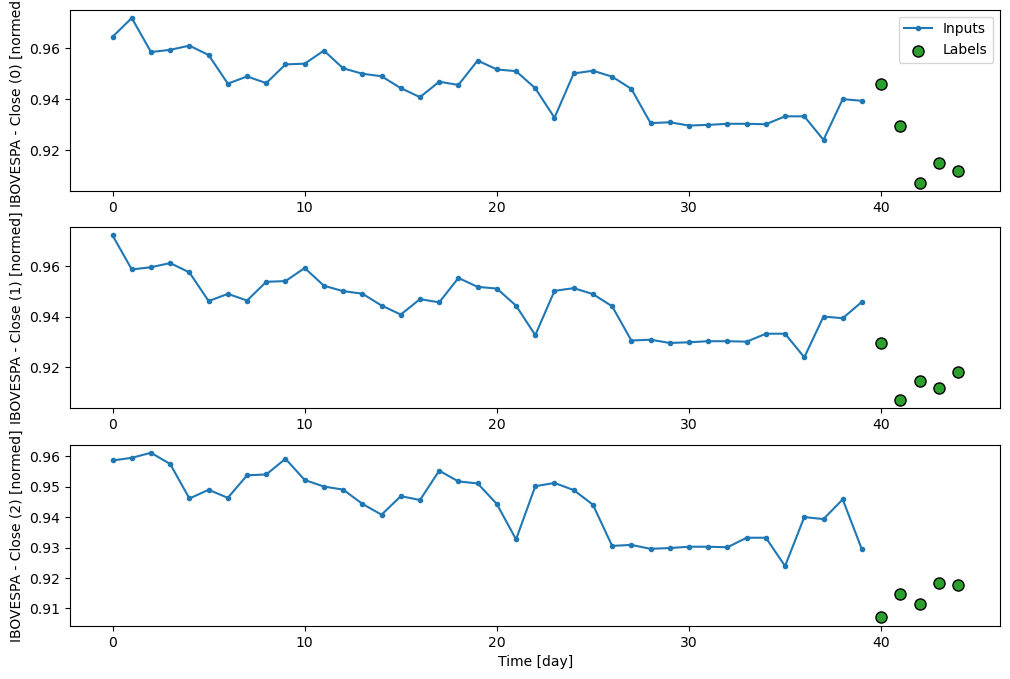

In [22]:
multi_window = WindowGenerator(INPUT_WINDOW_SIZE=INPUT_WINDOW_SIZE,
                               label_width=OUTPUT_WINDOW_SIZE,
                               shift=OUTPUT_WINDOW_SIZE, label_columns=[COLUMN_TO_PREDICT])

multi_window.plot(plot_col=COLUMN_TO_PREDICT)
multi_window

Criação da função de treino da rede

In [23]:
def compile_and_fit(model, window, PATIENCE=2, MAX_EPOCHS=150, LEARNING_RATE=0.00001):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=PATIENCE,
                                                    mode='min')
  
  # optimizer using learning rate schedule 
  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=LEARNING_RATE,
    decay_steps=DECAY_STEPS,
    decay_rate=LEARNING_DECAY)

  # config optimizer
  optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
  
  # callback to print the learning rate and add it to the history
  class PrintLR(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
      lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
      # print(f'Learning rate at epoch {epoch + 1}: {lr:.6f}')
      # add the learning rate to the history
      logs['lr'] = lr
  printlr = PrintLR()
  
  # config loss function
  if LOSS_FUNCTION == 'MAE':
    loss_function = tf.keras.losses.MeanAbsoluteError()
  elif LOSS_FUNCTION == 'MSE':
    loss_function = tf.keras.losses.MeanSquaredError()
  # elif LOSS_FUNCTION == 'CUSTOM':
  #   loss_function = custom_loss

  # model.compile(loss=tf.keras.losses.MeanAbsoluteError(),
  # model.compile(loss=tf.keras.losses.MeanSquaredError(),
  # model.compile(loss=custom_loss,
  model.compile(
                loss=loss_function,
                optimizer=optimizer,
                metrics=[
                  tf.keras.metrics.MeanAbsoluteError(),
                  tf.keras.metrics.MeanSquaredError(),
                  tf.keras.metrics.MeanAbsolutePercentageError(),
                  tf.keras.metrics.RootMeanSquaredError(),
                  # tf.keras.metrics.R2Score()
                  ]
              )

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[printlr, early_stopping])
  return history

Definir modelo da rede e realizar o treinamento

In [24]:
multi_window.train

<_MapDataset element_spec=(TensorSpec(shape=(None, 40, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 5, 1), dtype=tf.float32, name=None))>

# Definir modelos

In [25]:
num_features = df_x_values.shape[1]

num_features

1

In [26]:
def get_model():
    if NUM_FEATURES is not None:
        num_features = NUM_FEATURES
    else:
        num_features = df_x_values.shape[1]
    
    if MODEL_TO_USE == 1:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 2:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(50, return_sequences=True), 
                    tf.keras.layers.LSTM(50, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model
    
    elif MODEL_TO_USE == 3:
        model = tf.keras.Sequential([
                    tf.keras.layers.LSTM(100, return_sequences=False),
                    tf.keras.layers.Dense( OUTPUT_WINDOW_SIZE*num_features,
                                        kernel_initializer=tf.initializers.zeros()),
                    tf.keras.layers.Reshape([OUTPUT_WINDOW_SIZE, num_features])
                ])
        return model

Calculate metrics

In [27]:
# create dataframe for "hard" predictions
def create_df_repeat_prediction(data):        
    # predictions = data[COLUMN_TO_PREDICT].values[:-1]
    # labels = data[COLUMN_TO_PREDICT].values[1:]
    predictions, labels = None, None
    for part in iter(data):
        # print(part)
        if predictions is None:
            labels = part[1]
        else:
            labels = np.concatenate((labels, part[1]), axis=0)
    labels = labels[:, :, 0]
    # convert labels to 1D array
    # print(labels.shape)
    # print(labels)
    predictions = labels
    for i, label in enumerate(labels[:-1]):
        # if i == 3:
        #     break
        for j in range(len(label)):
            # replace values of predictions[i] with the first value of label
            predictions = tf.tensor_scatter_nd_update(
                predictions, 
                [[i, j]], 
                [label[0]]
            )
        # print(f"Label {i}: {label}")
        # print(f"Prediction {i}: {predictions[i]}")
    predictions = predictions[:-1]    
    labels = labels[1:]
    return {"predictions": predictions, "labels": labels}
    predictions_df = pd.DataFrame({"predictions": predictions, "labels": labels})
    predictions_df = predictions_df.dropna()
    return predictions_df

In [28]:
def make_repeat_predictions_metrics(data):
    predictions = create_df_repeat_prediction(data)
    mae = tf.keras.metrics.MeanAbsoluteError()
    mae.update_state(predictions["labels"], predictions["predictions"])
    mse = tf.keras.metrics.MeanSquaredError()
    mse.update_state(predictions["labels"], predictions["predictions"])
    mape = tf.keras.metrics.MeanAbsolutePercentageError()
    mape.update_state(predictions["labels"], predictions["predictions"])
    rmse = tf.keras.metrics.RootMeanSquaredError()
    rmse.update_state(predictions["labels"], predictions["predictions"])
    print(f"MAE: {mae.result()} - MSE: {mse.result()} - MAPE: {mape.result()} - RMSE: {rmse.result()}")
    return {
            "Loss": None,
            "MAE": float(mae.result()),
            "MSE": float(mse.result()),
            "MAPE": float(mape.result()),
            "RMSE": float(rmse.result()),
        }


In [29]:
def make_model_predictions_metrics(model, data):
    loss, mae, mse, mape, rmse = model.evaluate(data)
    print(f"Loss: {loss} - MAE: {mae} - MSE: {mse} - MAPE: {mape} - RMSE: {rmse}")
    return {
            "Loss": loss,
            "MAE": mae,
            "MSE": mse,
            "MAPE": mape,
            "RMSE": rmse,
        }

Treinar modelos

In [30]:
# record start time
training_start = time.time()

model = get_model()

history = compile_and_fit(model, multi_window, PATIENCE, MAX_EPOCHS, LEARNING_RATE)

# record end time
training_end = time.time()

Epoch 1/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 19:28 5s/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 100.0000 - mean_squared_error: 5.7411e-05 - root_mean_squared_error: 0.0076

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0060 - mean_absolute_error: 0.0060 - mean_absolute_percentage_error: 69.8530 - mean_squared_error: 4.3473e-05 - root_mean_squared_error: 0.0066  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 60.4908 - mean_squared_error: 6.6161e-05 - root_mean_squared_error: 0.0079

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 53.5299 - mean_squared_error: 6.9257e-05 - root_mean_squared_error: 0.0082

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 50.1400 - mean_squared_error: 7.2351e-05 - root_mean_squared_error: 0.0084

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 47.6238 - mean_squared_error: 7.3446e-05 - root_mean_squared_error: 0.0085

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 45.3930 - mean_squared_error: 7.2960e-05 - root_mean_squared_error: 0.0085

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0069 - mean_absolute_error: 0.0069 - mean_absolute_percentage_error: 43.4572 - mean_squared_error: 7.1809e-05 - root_mean_squared_error: 0.0084

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 41.7061 - mean_squared_error: 7.0305e-05 - root_mean_squared_error: 0.0083

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 40.0838 - mean_squared_error: 6.8613e-05 - root_mean_squared_error: 0.0082

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 38.5738 - mean_squared_error: 6.6810e-05 - root_mean_squared_error: 0.0081

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 37.2131 - mean_squared_error: 6.5304e-05 - root_mean_squared_error: 0.0080

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0065 - mean_absolute_error: 0.0065 - mean_absolute_percentage_error: 36.0738 - mean_squared_error: 6.5404e-05 - root_mean_squared_error: 0.0080

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0066 - mean_absolute_error: 0.0066 - mean_absolute_percentage_error: 35.0912 - mean_squared_error: 6.7241e-05 - root_mean_squared_error: 0.0081

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0067 - mean_absolute_error: 0.0067 - mean_absolute_percentage_error: 34.2566 - mean_squared_error: 7.0768e-05 - root_mean_squared_error: 0.0083

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0068 - mean_absolute_error: 0.0068 - mean_absolute_percentage_error: 33.5801 - mean_squared_error: 7.6100e-05 - root_mean_squared_error: 0.0086

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0070 - mean_absolute_error: 0.0070 - mean_absolute_percentage_error: 32.9458 - mean_squared_error: 8.0679e-05 - root_mean_squared_error: 0.0088

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0071 - mean_absolute_error: 0.0071 - mean_absolute_percentage_error: 32.3554 - mean_squared_error: 8.4697e-05 - root_mean_squared_error: 0.0090

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0072 - mean_absolute_error: 0.0072 - mean_absolute_percentage_error: 31.8963 - mean_squared_error: 8.9383e-05 - root_mean_squared_error: 0.0092

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0073 - mean_absolute_error: 0.0073 - mean_absolute_percentage_error: 31.4861 - mean_squared_error: 9.3650e-05 - root_mean_squared_error: 0.0094

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0075 - mean_absolute_error: 0.0075 - mean_absolute_percentage_error: 31.1344 - mean_squared_error: 9.8736e-05 - root_mean_squared_error: 0.0097

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0077 - mean_absolute_error: 0.0077 - mean_absolute_percentage_error: 30.8224 - mean_squared_error: 1.0404e-04 - root_mean_squared_error: 0.0099

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0078 - mean_absolute_error: 0.0078 - mean_absolute_percentage_error: 30.5284 - mean_squared_error: 1.0917e-04 - root_mean_squared_error: 0.0101

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0080 - mean_absolute_error: 0.0080 - mean_absolute_percentage_error: 30.2512 - mean_squared_error: 1.1472e-04 - root_mean_squared_error: 0.0103

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0082 - mean_absolute_error: 0.0082 - mean_absolute_percentage_error: 29.9757 - mean_squared_error: 1.1977e-04 - root_mean_squared_error: 0.0105

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - mean_absolute_percentage_error: 29.7030 - mean_squared_error: 1.2441e-04 - root_mean_squared_error: 0.0107

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0085 - mean_absolute_error: 0.0085 - mean_absolute_percentage_error: 29.4330 - mean_squared_error: 1.2859e-04 - root_mean_squared_error: 0.0109

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.0086 - mean_absolute_error: 0.0086 - mean_absolute_percentage_error: 29.1634 - mean_squared_error: 1.3231e-04 - root_mean_squared_error: 0.0111

 57/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0087 - mean_absolute_error: 0.0087 - mean_absolute_percentage_error: 28.8988 - mean_squared_error: 1.3566e-04 - root_mean_squared_error: 0.0112

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0088 - mean_absolute_error: 0.0088 - mean_absolute_percentage_error: 28.6434 - mean_squared_error: 1.3874e-04 - root_mean_squared_error: 0.0113

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0089 - mean_absolute_error: 0.0089 - mean_absolute_percentage_error: 28.3962 - mean_squared_error: 1.4157e-04 - root_mean_squared_error: 0.0115

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0090 - mean_absolute_error: 0.0090 - mean_absolute_percentage_error: 28.1592 - mean_squared_error: 1.4426e-04 - root_mean_squared_error: 0.0116

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - mean_absolute_percentage_error: 27.9280 - mean_squared_error: 1.4670e-04 - root_mean_squared_error: 0.0117

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0092 - mean_absolute_error: 0.0092 - mean_absolute_percentage_error: 27.7218 - mean_squared_error: 1.4926e-04 - root_mean_squared_error: 0.0118

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0093 - mean_absolute_error: 0.0093 - mean_absolute_percentage_error: 27.5276 - mean_squared_error: 1.5171e-04 - root_mean_squared_error: 0.0119

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 27.3338 - mean_squared_error: 1.5391e-04 - root_mean_squared_error: 0.0120

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0094 - mean_absolute_error: 0.0094 - mean_absolute_percentage_error: 27.1543 - mean_squared_error: 1.5626e-04 - root_mean_squared_error: 0.0121

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - mean_absolute_percentage_error: 26.9936 - mean_squared_error: 1.5944e-04 - root_mean_squared_error: 0.0122

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0097 - mean_absolute_error: 0.0097 - mean_absolute_percentage_error: 26.8553 - mean_squared_error: 1.6493e-04 - root_mean_squared_error: 0.0124

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - mean_absolute_percentage_error: 26.7312 - mean_squared_error: 1.7183e-04 - root_mean_squared_error: 0.0126

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0099 - mean_absolute_error: 0.0099 - mean_absolute_percentage_error: 26.6104 - mean_squared_error: 1.7864e-04 - root_mean_squared_error: 0.0128

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0101 - mean_absolute_error: 0.0101 - mean_absolute_percentage_error: 26.4856 - mean_squared_error: 1.8492e-04 - root_mean_squared_error: 0.0130

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - mean_absolute_percentage_error: 26.3572 - mean_squared_error: 1.9070e-04 - root_mean_squared_error: 0.0132

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0103 - mean_absolute_error: 0.0103 - mean_absolute_percentage_error: 26.2271 - mean_squared_error: 1.9611e-04 - root_mean_squared_error: 0.0134

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0104 - mean_absolute_error: 0.0104 - mean_absolute_percentage_error: 26.0941 - mean_squared_error: 2.0110e-04 - root_mean_squared_error: 0.0135

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0105 - mean_absolute_error: 0.0105 - mean_absolute_percentage_error: 25.9625 - mean_squared_error: 2.0601e-04 - root_mean_squared_error: 0.0137

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0106 - mean_absolute_error: 0.0106 - mean_absolute_percentage_error: 25.8321 - mean_squared_error: 2.1084e-04 - root_mean_squared_error: 0.0138

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - mean_absolute_percentage_error: 25.7060 - mean_squared_error: 2.1648e-04 - root_mean_squared_error: 0.0140

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - mean_absolute_percentage_error: 25.5822 - mean_squared_error: 2.2237e-04 - root_mean_squared_error: 0.0142

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0110 - mean_absolute_error: 0.0110 - mean_absolute_percentage_error: 25.4597 - mean_squared_error: 2.2830e-04 - root_mean_squared_error: 0.0143

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0111 - mean_absolute_error: 0.0111 - mean_absolute_percentage_error: 25.3425 - mean_squared_error: 2.3547e-04 - root_mean_squared_error: 0.0145

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - mean_absolute_percentage_error: 25.2269 - mean_squared_error: 2.4286e-04 - root_mean_squared_error: 0.0147

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0113 - mean_absolute_error: 0.0113 - mean_absolute_percentage_error: 25.1708 - mean_squared_error: 2.4733e-04 - root_mean_squared_error: 0.0148

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - mean_absolute_percentage_error: 25.0595 - mean_squared_error: 2.5657e-04 - root_mean_squared_error: 0.0151

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0116 - mean_absolute_error: 0.0116 - mean_absolute_percentage_error: 24.9510 - mean_squared_error: 2.6718e-04 - root_mean_squared_error: 0.0153

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - mean_absolute_percentage_error: 24.8431 - mean_squared_error: 2.7793e-04 - root_mean_squared_error: 0.0156

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0119 - mean_absolute_error: 0.0119 - mean_absolute_percentage_error: 24.7347 - mean_squared_error: 2.8837e-04 - root_mean_squared_error: 0.0158

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0121 - mean_absolute_error: 0.0121 - mean_absolute_percentage_error: 24.6312 - mean_squared_error: 3.0110e-04 - root_mean_squared_error: 0.0161

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.0123 - mean_absolute_error: 0.0123 - mean_absolute_percentage_error: 24.5411 - mean_squared_error: 3.1989e-04 - root_mean_squared_error: 0.0165

118/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - mean_absolute_percentage_error: 24.4575 - mean_squared_error: 3.4012e-04 - root_mean_squared_error: 0.0169

120/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0128 - mean_absolute_error: 0.0128 - mean_absolute_percentage_error: 24.3754 - mean_squared_error: 3.6026e-04 - root_mean_squared_error: 0.0172

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0130 - mean_absolute_error: 0.0130 - mean_absolute_percentage_error: 24.2988 - mean_squared_error: 3.8325e-04 - root_mean_squared_error: 0.0176

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0133 - mean_absolute_error: 0.0133 - mean_absolute_percentage_error: 24.2305 - mean_squared_error: 4.1461e-04 - root_mean_squared_error: 0.0181

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - mean_absolute_percentage_error: 24.1701 - mean_squared_error: 4.5589e-04 - root_mean_squared_error: 0.0187

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0139 - mean_absolute_error: 0.0139 - mean_absolute_percentage_error: 24.1157 - mean_squared_error: 5.0347e-04 - root_mean_squared_error: 0.0193

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0142 - mean_absolute_error: 0.0142 - mean_absolute_percentage_error: 24.0631 - mean_squared_error: 5.5130e-04 - root_mean_squared_error: 0.0200

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0146 - mean_absolute_error: 0.0146 - mean_absolute_percentage_error: 24.0103 - mean_squared_error: 5.9780e-04 - root_mean_squared_error: 0.0206

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0149 - mean_absolute_error: 0.0149 - mean_absolute_percentage_error: 23.9553 - mean_squared_error: 6.4226e-04 - root_mean_squared_error: 0.0212

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0152 - mean_absolute_error: 0.0152 - mean_absolute_percentage_error: 23.8981 - mean_squared_error: 6.8473e-04 - root_mean_squared_error: 0.0217

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - mean_absolute_percentage_error: 23.8411 - mean_squared_error: 7.2590e-04 - root_mean_squared_error: 0.0223

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0158 - mean_absolute_error: 0.0158 - mean_absolute_percentage_error: 23.7842 - mean_squared_error: 7.6589e-04 - root_mean_squared_error: 0.0228

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0161 - mean_absolute_error: 0.0161 - mean_absolute_percentage_error: 23.7266 - mean_squared_error: 8.0448e-04 - root_mean_squared_error: 0.0233

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0164 - mean_absolute_error: 0.0164 - mean_absolute_percentage_error: 23.6697 - mean_squared_error: 8.4245e-04 - root_mean_squared_error: 0.0238

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.0167 - mean_absolute_error: 0.0167 - mean_absolute_percentage_error: 23.6114 - mean_squared_error: 8.7884e-04 - root_mean_squared_error: 0.0243

148/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - mean_absolute_percentage_error: 23.5519 - mean_squared_error: 9.1368e-04 - root_mean_squared_error: 0.0248

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0172 - mean_absolute_error: 0.0172 - mean_absolute_percentage_error: 23.4911 - mean_squared_error: 9.4702e-04 - root_mean_squared_error: 0.0252

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0174 - mean_absolute_error: 0.0174 - mean_absolute_percentage_error: 23.4303 - mean_squared_error: 9.7919e-04 - root_mean_squared_error: 0.0257

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0177 - mean_absolute_error: 0.0177 - mean_absolute_percentage_error: 23.3715 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0261    

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0179 - mean_absolute_error: 0.0179 - mean_absolute_percentage_error: 23.3129 - mean_squared_error: 0.0010 - root_mean_squared_error: 0.0265

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0181 - mean_absolute_error: 0.0181 - mean_absolute_percentage_error: 23.2536 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0269

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0184 - mean_absolute_error: 0.0184 - mean_absolute_percentage_error: 23.1939 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0273

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0186 - mean_absolute_error: 0.0186 - mean_absolute_percentage_error: 23.1354 - mean_squared_error: 0.0011 - root_mean_squared_error: 0.0277

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0188 - mean_absolute_error: 0.0188 - mean_absolute_percentage_error: 23.0790 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0280

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0190 - mean_absolute_error: 0.0190 - mean_absolute_percentage_error: 23.0233 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0284

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0193 - mean_absolute_error: 0.0193 - mean_absolute_percentage_error: 22.9682 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0288

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - mean_absolute_percentage_error: 22.9135 - mean_squared_error: 0.0012 - root_mean_squared_error: 0.0291

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0197 - mean_absolute_error: 0.0197 - mean_absolute_percentage_error: 22.8585 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0295

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0199 - mean_absolute_error: 0.0199 - mean_absolute_percentage_error: 22.8045 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0298

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0201 - mean_absolute_error: 0.0201 - mean_absolute_percentage_error: 22.7513 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0301

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0203 - mean_absolute_error: 0.0203 - mean_absolute_percentage_error: 22.6975 - mean_squared_error: 0.0013 - root_mean_squared_error: 0.0304

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0205 - mean_absolute_error: 0.0205 - mean_absolute_percentage_error: 22.6443 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0307

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0207 - mean_absolute_error: 0.0207 - mean_absolute_percentage_error: 22.5921 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0310

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0209 - mean_absolute_error: 0.0209 - mean_absolute_percentage_error: 22.5411 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0313

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0210 - mean_absolute_error: 0.0210 - mean_absolute_percentage_error: 22.5158 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0315

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0211 - mean_absolute_error: 0.0211 - mean_absolute_percentage_error: 22.4906 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0316

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0213 - mean_absolute_error: 0.0213 - mean_absolute_percentage_error: 22.4408 - mean_squared_error: 0.0014 - root_mean_squared_error: 0.0319

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0215 - mean_absolute_error: 0.0215 - mean_absolute_percentage_error: 22.3914 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0322

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0216 - mean_absolute_error: 0.0216 - mean_absolute_percentage_error: 22.3426 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0325

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0218 - mean_absolute_error: 0.0218 - mean_absolute_percentage_error: 22.2939 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0327

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0220 - mean_absolute_error: 0.0220 - mean_absolute_percentage_error: 22.2460 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0330

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0222 - mean_absolute_error: 0.0222 - mean_absolute_percentage_error: 22.1979 - mean_squared_error: 0.0015 - root_mean_squared_error: 0.0333

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0224 - mean_absolute_error: 0.0224 - mean_absolute_percentage_error: 22.1497 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0336

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0226 - mean_absolute_error: 0.0226 - mean_absolute_percentage_error: 22.1012 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0338

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0228 - mean_absolute_error: 0.0228 - mean_absolute_percentage_error: 22.0525 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0341

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0229 - mean_absolute_error: 0.0229 - mean_absolute_percentage_error: 22.0034 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0343

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0231 - mean_absolute_error: 0.0231 - mean_absolute_percentage_error: 21.9551 - mean_squared_error: 0.0016 - root_mean_squared_error: 0.0345

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0233 - mean_absolute_error: 0.0233 - mean_absolute_percentage_error: 21.9105 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0349

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0235 - mean_absolute_error: 0.0235 - mean_absolute_percentage_error: 21.8670 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0352

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0237 - mean_absolute_error: 0.0237 - mean_absolute_percentage_error: 21.8237 - mean_squared_error: 0.0017 - root_mean_squared_error: 0.0355

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0239 - mean_absolute_error: 0.0239 - mean_absolute_percentage_error: 21.7810 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0358

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0241 - mean_absolute_error: 0.0241 - mean_absolute_percentage_error: 21.7392 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0361

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0243 - mean_absolute_error: 0.0243 - mean_absolute_percentage_error: 21.6983 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0364

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0245 - mean_absolute_error: 0.0245 - mean_absolute_percentage_error: 21.6572 - mean_squared_error: 0.0018 - root_mean_squared_error: 0.0368

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0247 - mean_absolute_error: 0.0247 - mean_absolute_percentage_error: 21.6158 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0371

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0249 - mean_absolute_error: 0.0249 - mean_absolute_percentage_error: 21.5741 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0374

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_absolute_percentage_error: 21.5329 - mean_squared_error: 0.0019 - root_mean_squared_error: 0.0377

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0253 - mean_absolute_error: 0.0253 - mean_absolute_percentage_error: 21.4913 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0380

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0255 - mean_absolute_error: 0.0255 - mean_absolute_percentage_error: 21.4494 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0383

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0256 - mean_absolute_error: 0.0256 - mean_absolute_percentage_error: 21.4284 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0384

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0258 - mean_absolute_error: 0.0258 - mean_absolute_percentage_error: 21.3865 - mean_squared_error: 0.0020 - root_mean_squared_error: 0.0387

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 21.3451 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0390

237/237 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - loss: 0.0260 - mean_absolute_error: 0.0260 - mean_absolute_percentage_error: 21.3247 - mean_squared_error: 0.0021 - root_mean_squared_error: 0.0391 - val_loss: 0.1869 - val_mean_absolute_error: 0.1869 - val_mean_absolute_percentage_error: 19.9205 - val_mean_squared_error: 0.0357 - val_root_mean_squared_error: 0.1891 - lr: 0.0098


Epoch 2/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 65ms/step - loss: 0.7136 - mean_absolute_error: 0.7136 - mean_absolute_percentage_error: 9587.5469 - mean_squared_error: 0.5092 - root_mean_squared_error: 0.7136

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7098 - mean_absolute_error: 0.7098 - mean_absolute_percentage_error: 7997.5762 - mean_squared_error: 0.5039 - root_mean_squared_error: 0.7099 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7022 - mean_absolute_error: 0.7022 - mean_absolute_percentage_error: 6777.7900 - mean_squared_error: 0.4934 - root_mean_squared_error: 0.7024

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6926 - mean_absolute_error: 0.6926 - mean_absolute_percentage_error: 5991.9800 - mean_squared_error: 0.4807 - root_mean_squared_error: 0.6931

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7018 - mean_absolute_error: 0.7018 - mean_absolute_percentage_error: 5570.4307 - mean_squared_error: 0.5287 - root_mean_squared_error: 0.7205

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7250 - mean_absolute_error: 0.7250 - mean_absolute_percentage_error: 5342.3081 - mean_squared_error: 0.6087 - root_mean_squared_error: 0.7684

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7271 - mean_absolute_error: 0.7271 - mean_absolute_percentage_error: 5100.9019 - mean_squared_error: 0.6425 - root_mean_squared_error: 0.7902

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7214 - mean_absolute_error: 0.7214 - mean_absolute_percentage_error: 4875.9658 - mean_squared_error: 0.6544 - root_mean_squared_error: 0.7989

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7099 - mean_absolute_error: 0.7099 - mean_absolute_percentage_error: 4663.1099 - mean_squared_error: 0.6537 - root_mean_squared_error: 0.7997

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6960 - mean_absolute_error: 0.6960 - mean_absolute_percentage_error: 4466.1982 - mean_squared_error: 0.6464 - root_mean_squared_error: 0.7959

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6807 - mean_absolute_error: 0.6807 - mean_absolute_percentage_error: 4283.6299 - mean_squared_error: 0.6352 - root_mean_squared_error: 0.7894

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6650 - mean_absolute_error: 0.6650 - mean_absolute_percentage_error: 4115.3369 - mean_squared_error: 0.6221 - root_mean_squared_error: 0.7813

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6493 - mean_absolute_error: 0.6493 - mean_absolute_percentage_error: 3959.8345 - mean_squared_error: 0.6081 - root_mean_squared_error: 0.7723

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6341 - mean_absolute_error: 0.6341 - mean_absolute_percentage_error: 3816.1670 - mean_squared_error: 0.5939 - root_mean_squared_error: 0.7628

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6192 - mean_absolute_error: 0.6192 - mean_absolute_percentage_error: 3683.0542 - mean_squared_error: 0.5796 - root_mean_squared_error: 0.7531

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.6049 - mean_absolute_error: 0.6049 - mean_absolute_percentage_error: 3559.6589 - mean_squared_error: 0.5656 - root_mean_squared_error: 0.7434

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5911 - mean_absolute_error: 0.5911 - mean_absolute_percentage_error: 3445.0298 - mean_squared_error: 0.5520 - root_mean_squared_error: 0.7337

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5779 - mean_absolute_error: 0.5779 - mean_absolute_percentage_error: 3338.3230 - mean_squared_error: 0.5388 - root_mean_squared_error: 0.7242

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5652 - mean_absolute_error: 0.5652 - mean_absolute_percentage_error: 3238.8652 - mean_squared_error: 0.5262 - root_mean_squared_error: 0.7149

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5531 - mean_absolute_error: 0.5531 - mean_absolute_percentage_error: 3145.9963 - mean_squared_error: 0.5140 - root_mean_squared_error: 0.7058

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5416 - mean_absolute_error: 0.5416 - mean_absolute_percentage_error: 3058.9863 - mean_squared_error: 0.5023 - root_mean_squared_error: 0.6969

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5307 - mean_absolute_error: 0.5307 - mean_absolute_percentage_error: 2977.3286 - mean_squared_error: 0.4912 - root_mean_squared_error: 0.6883

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5202 - mean_absolute_error: 0.5202 - mean_absolute_percentage_error: 2900.4995 - mean_squared_error: 0.4805 - root_mean_squared_error: 0.6800

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5103 - mean_absolute_error: 0.5103 - mean_absolute_percentage_error: 2828.0408 - mean_squared_error: 0.4703 - root_mean_squared_error: 0.6719

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5008 - mean_absolute_error: 0.5008 - mean_absolute_percentage_error: 2759.6526 - mean_squared_error: 0.4606 - root_mean_squared_error: 0.6642

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4919 - mean_absolute_error: 0.4919 - mean_absolute_percentage_error: 2694.9653 - mean_squared_error: 0.4512 - root_mean_squared_error: 0.6566

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4833 - mean_absolute_error: 0.4833 - mean_absolute_percentage_error: 2633.7131 - mean_squared_error: 0.4423 - root_mean_squared_error: 0.6494

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4752 - mean_absolute_error: 0.4752 - mean_absolute_percentage_error: 2575.5625 - mean_squared_error: 0.4338 - root_mean_squared_error: 0.6423

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4674 - mean_absolute_error: 0.4674 - mean_absolute_percentage_error: 2520.3613 - mean_squared_error: 0.4257 - root_mean_squared_error: 0.6356

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4600 - mean_absolute_error: 0.4600 - mean_absolute_percentage_error: 2467.9119 - mean_squared_error: 0.4179 - root_mean_squared_error: 0.6290

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4530 - mean_absolute_error: 0.4530 - mean_absolute_percentage_error: 2418.0005 - mean_squared_error: 0.4104 - root_mean_squared_error: 0.6227

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4463 - mean_absolute_error: 0.4463 - mean_absolute_percentage_error: 2370.4241 - mean_squared_error: 0.4032 - root_mean_squared_error: 0.6166

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4399 - mean_absolute_error: 0.4399 - mean_absolute_percentage_error: 2325.0420 - mean_squared_error: 0.3964 - root_mean_squared_error: 0.6106

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4337 - mean_absolute_error: 0.4337 - mean_absolute_percentage_error: 2281.6699 - mean_squared_error: 0.3897 - root_mean_squared_error: 0.6049

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4278 - mean_absolute_error: 0.4278 - mean_absolute_percentage_error: 2240.1919 - mean_squared_error: 0.3834 - root_mean_squared_error: 0.5993

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4221 - mean_absolute_error: 0.4221 - mean_absolute_percentage_error: 2200.4502 - mean_squared_error: 0.3772 - root_mean_squared_error: 0.5939

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 2162.3208 - mean_squared_error: 0.3713 - root_mean_squared_error: 0.5886

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4113 - mean_absolute_error: 0.4113 - mean_absolute_percentage_error: 2125.6799 - mean_squared_error: 0.3656 - root_mean_squared_error: 0.5834

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4061 - mean_absolute_error: 0.4061 - mean_absolute_percentage_error: 2090.4204 - mean_squared_error: 0.3600 - root_mean_squared_error: 0.5784

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.4010 - mean_absolute_error: 0.4010 - mean_absolute_percentage_error: 2056.4695 - mean_squared_error: 0.3547 - root_mean_squared_error: 0.5735

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3962 - mean_absolute_error: 0.3962 - mean_absolute_percentage_error: 2023.7557 - mean_squared_error: 0.3495 - root_mean_squared_error: 0.5688

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3914 - mean_absolute_error: 0.3914 - mean_absolute_percentage_error: 1992.2081 - mean_squared_error: 0.3445 - root_mean_squared_error: 0.5642

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3868 - mean_absolute_error: 0.3868 - mean_absolute_percentage_error: 1961.7711 - mean_squared_error: 0.3397 - root_mean_squared_error: 0.5596

 87/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3824 - mean_absolute_error: 0.3824 - mean_absolute_percentage_error: 1932.3787 - mean_squared_error: 0.3350 - root_mean_squared_error: 0.5552

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3781 - mean_absolute_error: 0.3781 - mean_absolute_percentage_error: 1903.9741 - mean_squared_error: 0.3304 - root_mean_squared_error: 0.5509

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3739 - mean_absolute_error: 0.3739 - mean_absolute_percentage_error: 1876.5006 - mean_squared_error: 0.3260 - root_mean_squared_error: 0.5467

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3698 - mean_absolute_error: 0.3698 - mean_absolute_percentage_error: 1849.9125 - mean_squared_error: 0.3217 - root_mean_squared_error: 0.5426

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3658 - mean_absolute_error: 0.3658 - mean_absolute_percentage_error: 1824.1693 - mean_squared_error: 0.3176 - root_mean_squared_error: 0.5386

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3619 - mean_absolute_error: 0.3619 - mean_absolute_percentage_error: 1799.2312 - mean_squared_error: 0.3135 - root_mean_squared_error: 0.5347

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3582 - mean_absolute_error: 0.3582 - mean_absolute_percentage_error: 1775.0651 - mean_squared_error: 0.3096 - root_mean_squared_error: 0.5309

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 1751.6270 - mean_squared_error: 0.3058 - root_mean_squared_error: 0.5272

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3511 - mean_absolute_error: 0.3511 - mean_absolute_percentage_error: 1728.8894 - mean_squared_error: 0.3021 - root_mean_squared_error: 0.5236

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1706.8145 - mean_squared_error: 0.2985 - root_mean_squared_error: 0.5200

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1685.3746 - mean_squared_error: 0.2950 - root_mean_squared_error: 0.5165

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3412 - mean_absolute_error: 0.3412 - mean_absolute_percentage_error: 1664.5387 - mean_squared_error: 0.2916 - root_mean_squared_error: 0.5131

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3381 - mean_absolute_error: 0.3381 - mean_absolute_percentage_error: 1644.2817 - mean_squared_error: 0.2883 - root_mean_squared_error: 0.5098

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3350 - mean_absolute_error: 0.3350 - mean_absolute_percentage_error: 1624.5750 - mean_squared_error: 0.2851 - root_mean_squared_error: 0.5065

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3321 - mean_absolute_error: 0.3321 - mean_absolute_percentage_error: 1605.3976 - mean_squared_error: 0.2819 - root_mean_squared_error: 0.5033

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1586.7289 - mean_squared_error: 0.2789 - root_mean_squared_error: 0.5002

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3264 - mean_absolute_error: 0.3264 - mean_absolute_percentage_error: 1568.5530 - mean_squared_error: 0.2759 - root_mean_squared_error: 0.4972

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3236 - mean_absolute_error: 0.3236 - mean_absolute_percentage_error: 1550.8475 - mean_squared_error: 0.2730 - root_mean_squared_error: 0.4942

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3210 - mean_absolute_error: 0.3210 - mean_absolute_percentage_error: 1533.5924 - mean_squared_error: 0.2702 - root_mean_squared_error: 0.4913

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3184 - mean_absolute_error: 0.3184 - mean_absolute_percentage_error: 1516.7687 - mean_squared_error: 0.2674 - root_mean_squared_error: 0.4884

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3159 - mean_absolute_error: 0.3159 - mean_absolute_percentage_error: 1500.3613 - mean_squared_error: 0.2647 - root_mean_squared_error: 0.4856

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3134 - mean_absolute_error: 0.3134 - mean_absolute_percentage_error: 1484.3546 - mean_squared_error: 0.2621 - root_mean_squared_error: 0.4829

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3110 - mean_absolute_error: 0.3110 - mean_absolute_percentage_error: 1468.7328 - mean_squared_error: 0.2595 - root_mean_squared_error: 0.4802

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1453.4824 - mean_squared_error: 0.2570 - root_mean_squared_error: 0.4775

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1438.5896 - mean_squared_error: 0.2546 - root_mean_squared_error: 0.4750

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3043 - mean_absolute_error: 0.3043 - mean_absolute_percentage_error: 1424.0411 - mean_squared_error: 0.2522 - root_mean_squared_error: 0.4724

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1409.8252 - mean_squared_error: 0.2499 - root_mean_squared_error: 0.4700

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.3001 - mean_absolute_error: 0.3001 - mean_absolute_percentage_error: 1395.9307 - mean_squared_error: 0.2476 - root_mean_squared_error: 0.4675

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2980 - mean_absolute_error: 0.2980 - mean_absolute_percentage_error: 1382.3455 - mean_squared_error: 0.2454 - root_mean_squared_error: 0.4652

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1369.0604 - mean_squared_error: 0.2432 - root_mean_squared_error: 0.4628

147/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2941 - mean_absolute_error: 0.2941 - mean_absolute_percentage_error: 1356.0643 - mean_squared_error: 0.2411 - root_mean_squared_error: 0.4605

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1343.3467 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4583

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2904 - mean_absolute_error: 0.2904 - mean_absolute_percentage_error: 1330.8987 - mean_squared_error: 0.2369 - root_mean_squared_error: 0.4561

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 1318.7128 - mean_squared_error: 0.2349 - root_mean_squared_error: 0.4539

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1306.7798 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4518

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1295.0916 - mean_squared_error: 0.2311 - root_mean_squared_error: 0.4497

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2834 - mean_absolute_error: 0.2834 - mean_absolute_percentage_error: 1283.6393 - mean_squared_error: 0.2292 - root_mean_squared_error: 0.4476

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1272.4152 - mean_squared_error: 0.2273 - root_mean_squared_error: 0.4456

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2801 - mean_absolute_error: 0.2801 - mean_absolute_percentage_error: 1261.4121 - mean_squared_error: 0.2255 - root_mean_squared_error: 0.4436

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1250.6233 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4416

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2777 - mean_absolute_error: 0.2777 - mean_absolute_percentage_error: 1245.3076 - mean_squared_error: 0.2229 - root_mean_squared_error: 0.4406

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2761 - mean_absolute_error: 0.2761 - mean_absolute_percentage_error: 1234.8289 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4387

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2746 - mean_absolute_error: 0.2746 - mean_absolute_percentage_error: 1224.5485 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4368

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1214.4612 - mean_squared_error: 0.2178 - root_mean_squared_error: 0.4349

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2716 - mean_absolute_error: 0.2716 - mean_absolute_percentage_error: 1204.5610 - mean_squared_error: 0.2161 - root_mean_squared_error: 0.4330

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2702 - mean_absolute_error: 0.2702 - mean_absolute_percentage_error: 1194.8435 - mean_squared_error: 0.2145 - root_mean_squared_error: 0.4312

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1185.3035 - mean_squared_error: 0.2129 - root_mean_squared_error: 0.4294

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1175.9351 - mean_squared_error: 0.2114 - root_mean_squared_error: 0.4276

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2659 - mean_absolute_error: 0.2659 - mean_absolute_percentage_error: 1166.7329 - mean_squared_error: 0.2098 - root_mean_squared_error: 0.4259

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2646 - mean_absolute_error: 0.2646 - mean_absolute_percentage_error: 1157.6931 - mean_squared_error: 0.2083 - root_mean_squared_error: 0.4242

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2632 - mean_absolute_error: 0.2632 - mean_absolute_percentage_error: 1148.8101 - mean_squared_error: 0.2069 - root_mean_squared_error: 0.4225

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1140.0806 - mean_squared_error: 0.2054 - root_mean_squared_error: 0.4208

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1131.4996 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4191

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2594 - mean_absolute_error: 0.2594 - mean_absolute_percentage_error: 1123.0634 - mean_squared_error: 0.2026 - root_mean_squared_error: 0.4175

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1114.7690 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4159

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2569 - mean_absolute_error: 0.2569 - mean_absolute_percentage_error: 1106.6132 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4143

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2557 - mean_absolute_error: 0.2557 - mean_absolute_percentage_error: 1098.5919 - mean_squared_error: 0.1985 - root_mean_squared_error: 0.4128

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2545 - mean_absolute_error: 0.2545 - mean_absolute_percentage_error: 1090.7012 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4112

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2533 - mean_absolute_error: 0.2533 - mean_absolute_percentage_error: 1082.9385 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4097

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2522 - mean_absolute_error: 0.2522 - mean_absolute_percentage_error: 1075.2997 - mean_squared_error: 0.1946 - root_mean_squared_error: 0.4082

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2511 - mean_absolute_error: 0.2511 - mean_absolute_percentage_error: 1067.7817 - mean_squared_error: 0.1934 - root_mean_squared_error: 0.4067

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2500 - mean_absolute_error: 0.2500 - mean_absolute_percentage_error: 1060.3824 - mean_squared_error: 0.1921 - root_mean_squared_error: 0.4053

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1053.1001 - mean_squared_error: 0.1909 - root_mean_squared_error: 0.4039

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2478 - mean_absolute_error: 0.2478 - mean_absolute_percentage_error: 1045.9301 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4024

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2468 - mean_absolute_error: 0.2468 - mean_absolute_percentage_error: 1038.8696 - mean_squared_error: 0.1885 - root_mean_squared_error: 0.4011

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2458 - mean_absolute_error: 0.2458 - mean_absolute_percentage_error: 1031.9164 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.3997

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2448 - mean_absolute_error: 0.2448 - mean_absolute_percentage_error: 1025.0676 - mean_squared_error: 0.1863 - root_mean_squared_error: 0.3983

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2438 - mean_absolute_error: 0.2438 - mean_absolute_percentage_error: 1018.3206 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.3970

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1011.6734 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3957

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1005.1237 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3944

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2409 - mean_absolute_error: 0.2409 - mean_absolute_percentage_error: 998.6692 - mean_squared_error: 0.1819 - root_mean_squared_error: 0.3931 

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2405 - mean_absolute_error: 0.2405 - mean_absolute_percentage_error: 995.4769 - mean_squared_error: 0.1814 - root_mean_squared_error: 0.3924

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2395 - mean_absolute_error: 0.2395 - mean_absolute_percentage_error: 989.1608 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3912

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2386 - mean_absolute_error: 0.2386 - mean_absolute_percentage_error: 982.9341 - mean_squared_error: 0.1793 - root_mean_squared_error: 0.3899

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 976.7951 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3887

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2368 - mean_absolute_error: 0.2368 - mean_absolute_percentage_error: 970.7418 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3875

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 964.7761 - mean_squared_error: 0.1762 - root_mean_squared_error: 0.3863

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 961.8303 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3857 - val_loss: 0.0387 - val_mean_absolute_error: 0.0387 - val_mean_absolute_percentage_error: 4.1088 - val_mean_squared_error: 0.0025 - val_root_mean_squared_error: 0.0498 - lr: 0.0095


Epoch 3/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 16s 68ms/step - loss: 0.9015 - mean_absolute_error: 0.9015 - mean_absolute_percentage_error: 12117.5264 - mean_squared_error: 0.8137 - root_mean_squared_error: 0.9021

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.8890 - mean_absolute_error: 0.8890 - mean_absolute_percentage_error: 10068.8965 - mean_squared_error: 0.7966 - root_mean_squared_error: 0.8925 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - loss: 0.8537 - mean_absolute_error: 0.8537 - mean_absolute_percentage_error: 8447.3369 - mean_squared_error: 0.7485 - root_mean_squared_error: 0.8644 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8038 - mean_absolute_error: 0.8038 - mean_absolute_percentage_error: 7332.5562 - mean_squared_error: 0.6889 - root_mean_squared_error: 0.8272

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.7537 - mean_absolute_error: 0.7537 - mean_absolute_percentage_error: 6534.8833 - mean_squared_error: 0.6318 - root_mean_squared_error: 0.7894

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7127 - mean_absolute_error: 0.7127 - mean_absolute_percentage_error: 5941.4131 - mean_squared_error: 0.5846 - root_mean_squared_error: 0.7568

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6810 - mean_absolute_error: 0.6810 - mean_absolute_percentage_error: 5484.1035 - mean_squared_error: 0.5472 - root_mean_squared_error: 0.7302

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6544 - mean_absolute_error: 0.6544 - mean_absolute_percentage_error: 5114.6401 - mean_squared_error: 0.5160 - root_mean_squared_error: 0.7075

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6300 - mean_absolute_error: 0.6300 - mean_absolute_percentage_error: 4801.4204 - mean_squared_error: 0.4884 - root_mean_squared_error: 0.6867

 19/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.6071 - mean_absolute_error: 0.6071 - mean_absolute_percentage_error: 4530.0913 - mean_squared_error: 0.4637 - root_mean_squared_error: 0.6675

 21/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5866 - mean_absolute_error: 0.5866 - mean_absolute_percentage_error: 4293.9824 - mean_squared_error: 0.4419 - root_mean_squared_error: 0.6500

 23/237 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - loss: 0.5682 - mean_absolute_error: 0.5682 - mean_absolute_percentage_error: 4086.1946 - mean_squared_error: 0.4224 - root_mean_squared_error: 0.6341

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5513 - mean_absolute_error: 0.5513 - mean_absolute_percentage_error: 3900.9353 - mean_squared_error: 0.4049 - root_mean_squared_error: 0.6194

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5357 - mean_absolute_error: 0.5357 - mean_absolute_percentage_error: 3734.1157 - mean_squared_error: 0.3889 - root_mean_squared_error: 0.6057

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5214 - mean_absolute_error: 0.5214 - mean_absolute_percentage_error: 3583.3215 - mean_squared_error: 0.3744 - root_mean_squared_error: 0.5931

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5082 - mean_absolute_error: 0.5082 - mean_absolute_percentage_error: 3446.3110 - mean_squared_error: 0.3611 - root_mean_squared_error: 0.5813

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4957 - mean_absolute_error: 0.4957 - mean_absolute_percentage_error: 3320.9399 - mean_squared_error: 0.3488 - root_mean_squared_error: 0.5702

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4842 - mean_absolute_error: 0.4842 - mean_absolute_percentage_error: 3206.0806 - mean_squared_error: 0.3375 - root_mean_squared_error: 0.5598

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4733 - mean_absolute_error: 0.4733 - mean_absolute_percentage_error: 3100.4463 - mean_squared_error: 0.3270 - root_mean_squared_error: 0.5501

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 3002.8247 - mean_squared_error: 0.3173 - root_mean_squared_error: 0.5408

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4537 - mean_absolute_error: 0.4537 - mean_absolute_percentage_error: 2912.3381 - mean_squared_error: 0.3083 - root_mean_squared_error: 0.5322

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4447 - mean_absolute_error: 0.4447 - mean_absolute_percentage_error: 2827.9763 - mean_squared_error: 0.2998 - root_mean_squared_error: 0.5240

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4361 - mean_absolute_error: 0.4361 - mean_absolute_percentage_error: 2749.0691 - mean_squared_error: 0.2919 - root_mean_squared_error: 0.5162

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4279 - mean_absolute_error: 0.4279 - mean_absolute_percentage_error: 2675.0649 - mean_squared_error: 0.2844 - root_mean_squared_error: 0.5087

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4200 - mean_absolute_error: 0.4200 - mean_absolute_percentage_error: 2605.5127 - mean_squared_error: 0.2773 - root_mean_squared_error: 0.5016

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4126 - mean_absolute_error: 0.4126 - mean_absolute_percentage_error: 2540.0232 - mean_squared_error: 0.2707 - root_mean_squared_error: 0.4948

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4055 - mean_absolute_error: 0.4055 - mean_absolute_percentage_error: 2478.1997 - mean_squared_error: 0.2644 - root_mean_squared_error: 0.4882

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3987 - mean_absolute_error: 0.3987 - mean_absolute_percentage_error: 2419.7214 - mean_squared_error: 0.2584 - root_mean_squared_error: 0.4820

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3921 - mean_absolute_error: 0.3921 - mean_absolute_percentage_error: 2364.2986 - mean_squared_error: 0.2527 - root_mean_squared_error: 0.4760

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 2311.7051 - mean_squared_error: 0.2473 - root_mean_squared_error: 0.4702

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3796 - mean_absolute_error: 0.3796 - mean_absolute_percentage_error: 2261.7239 - mean_squared_error: 0.2422 - root_mean_squared_error: 0.4646

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3737 - mean_absolute_error: 0.3737 - mean_absolute_percentage_error: 2214.1665 - mean_squared_error: 0.2372 - root_mean_squared_error: 0.4592

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3680 - mean_absolute_error: 0.3680 - mean_absolute_percentage_error: 2168.8484 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4541

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3626 - mean_absolute_error: 0.3626 - mean_absolute_percentage_error: 2125.6289 - mean_squared_error: 0.2281 - root_mean_squared_error: 0.4491

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3573 - mean_absolute_error: 0.3573 - mean_absolute_percentage_error: 2084.3689 - mean_squared_error: 0.2238 - root_mean_squared_error: 0.4443

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 2064.4285 - mean_squared_error: 0.2217 - root_mean_squared_error: 0.4419

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3498 - mean_absolute_error: 0.3498 - mean_absolute_percentage_error: 2025.8347 - mean_squared_error: 0.2177 - root_mean_squared_error: 0.4374

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3450 - mean_absolute_error: 0.3450 - mean_absolute_percentage_error: 1988.8610 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4329

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3403 - mean_absolute_error: 0.3403 - mean_absolute_percentage_error: 1953.3994 - mean_squared_error: 0.2101 - root_mean_squared_error: 0.4286

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3358 - mean_absolute_error: 0.3358 - mean_absolute_percentage_error: 1919.3582 - mean_squared_error: 0.2066 - root_mean_squared_error: 0.4245

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3315 - mean_absolute_error: 0.3315 - mean_absolute_percentage_error: 1886.6503 - mean_squared_error: 0.2031 - root_mean_squared_error: 0.4205

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3274 - mean_absolute_error: 0.3274 - mean_absolute_percentage_error: 1855.2024 - mean_squared_error: 0.1998 - root_mean_squared_error: 0.4166

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3233 - mean_absolute_error: 0.3233 - mean_absolute_percentage_error: 1824.9342 - mean_squared_error: 0.1967 - root_mean_squared_error: 0.4128

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3195 - mean_absolute_error: 0.3195 - mean_absolute_percentage_error: 1795.7760 - mean_squared_error: 0.1936 - root_mean_squared_error: 0.4091

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3157 - mean_absolute_error: 0.3157 - mean_absolute_percentage_error: 1767.6669 - mean_squared_error: 0.1907 - root_mean_squared_error: 0.4056

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1740.5419 - mean_squared_error: 0.1878 - root_mean_squared_error: 0.4021

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1714.3469 - mean_squared_error: 0.1851 - root_mean_squared_error: 0.3988

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3051 - mean_absolute_error: 0.3051 - mean_absolute_percentage_error: 1689.0334 - mean_squared_error: 0.1824 - root_mean_squared_error: 0.3955

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3018 - mean_absolute_error: 0.3018 - mean_absolute_percentage_error: 1664.5564 - mean_squared_error: 0.1798 - root_mean_squared_error: 0.3923

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2986 - mean_absolute_error: 0.2986 - mean_absolute_percentage_error: 1640.8761 - mean_squared_error: 0.1773 - root_mean_squared_error: 0.3892

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2955 - mean_absolute_error: 0.2955 - mean_absolute_percentage_error: 1617.9500 - mean_squared_error: 0.1749 - root_mean_squared_error: 0.3862

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1595.7421 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3833

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1574.2150 - mean_squared_error: 0.1703 - root_mean_squared_error: 0.3804

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1553.3351 - mean_squared_error: 0.1681 - root_mean_squared_error: 0.3776

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2840 - mean_absolute_error: 0.2840 - mean_absolute_percentage_error: 1533.0731 - mean_squared_error: 0.1660 - root_mean_squared_error: 0.3749

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2813 - mean_absolute_error: 0.2813 - mean_absolute_percentage_error: 1513.3997 - mean_squared_error: 0.1640 - root_mean_squared_error: 0.3723

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1494.2875 - mean_squared_error: 0.1619 - root_mean_squared_error: 0.3697

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2762 - mean_absolute_error: 0.2762 - mean_absolute_percentage_error: 1475.7145 - mean_squared_error: 0.1600 - root_mean_squared_error: 0.3671

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1457.6630 - mean_squared_error: 0.1581 - root_mean_squared_error: 0.3647

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2713 - mean_absolute_error: 0.2713 - mean_absolute_percentage_error: 1440.1101 - mean_squared_error: 0.1563 - root_mean_squared_error: 0.3622

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1423.0427 - mean_squared_error: 0.1545 - root_mean_squared_error: 0.3599

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1406.4355 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3577

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1390.2610 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3554

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2627 - mean_absolute_error: 0.2627 - mean_absolute_percentage_error: 1374.5057 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3533

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2607 - mean_absolute_error: 0.2607 - mean_absolute_percentage_error: 1359.1531 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3512

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1344.1849 - mean_squared_error: 0.1463 - root_mean_squared_error: 0.3491

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1329.5873 - mean_squared_error: 0.1448 - root_mean_squared_error: 0.3471

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2550 - mean_absolute_error: 0.2550 - mean_absolute_percentage_error: 1315.3457 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3452

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1301.4460 - mean_squared_error: 0.1419 - root_mean_squared_error: 0.3433

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1287.8765 - mean_squared_error: 0.1405 - root_mean_squared_error: 0.3414

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1274.6257 - mean_squared_error: 0.1392 - root_mean_squared_error: 0.3395

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1261.6826 - mean_squared_error: 0.1378 - root_mean_squared_error: 0.3377

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2465 - mean_absolute_error: 0.2465 - mean_absolute_percentage_error: 1249.0345 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3360

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1236.6707 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3343

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2434 - mean_absolute_error: 0.2434 - mean_absolute_percentage_error: 1224.5819 - mean_squared_error: 0.1340 - root_mean_squared_error: 0.3326

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2419 - mean_absolute_error: 0.2419 - mean_absolute_percentage_error: 1212.7570 - mean_squared_error: 0.1328 - root_mean_squared_error: 0.3309

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2404 - mean_absolute_error: 0.2404 - mean_absolute_percentage_error: 1201.1866 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3293

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2389 - mean_absolute_error: 0.2389 - mean_absolute_percentage_error: 1189.8624 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3277

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2375 - mean_absolute_error: 0.2375 - mean_absolute_percentage_error: 1178.7764 - mean_squared_error: 0.1293 - root_mean_squared_error: 0.3261

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1167.9210 - mean_squared_error: 0.1282 - root_mean_squared_error: 0.3245

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2347 - mean_absolute_error: 0.2347 - mean_absolute_percentage_error: 1157.2891 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3230

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2334 - mean_absolute_error: 0.2334 - mean_absolute_percentage_error: 1146.8740 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3215

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1136.6685 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3200

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1126.6680 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3185

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2294 - mean_absolute_error: 0.2294 - mean_absolute_percentage_error: 1116.8651 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3171

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2282 - mean_absolute_error: 0.2282 - mean_absolute_percentage_error: 1107.2533 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3157

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1097.8264 - mean_squared_error: 0.1210 - root_mean_squared_error: 0.3143

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2257 - mean_absolute_error: 0.2257 - mean_absolute_percentage_error: 1088.5785 - mean_squared_error: 0.1200 - root_mean_squared_error: 0.3129

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2245 - mean_absolute_error: 0.2245 - mean_absolute_percentage_error: 1079.5052 - mean_squared_error: 0.1191 - root_mean_squared_error: 0.3115

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2233 - mean_absolute_error: 0.2233 - mean_absolute_percentage_error: 1070.6018 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3102

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2222 - mean_absolute_error: 0.2222 - mean_absolute_percentage_error: 1061.8621 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3089

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2210 - mean_absolute_error: 0.2210 - mean_absolute_percentage_error: 1053.2815 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3076

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1044.8555 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3063

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2188 - mean_absolute_error: 0.2188 - mean_absolute_percentage_error: 1036.5796 - mean_squared_error: 0.1147 - root_mean_squared_error: 0.3051

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 1028.4502 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3038

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1020.4629 - mean_squared_error: 0.1130 - root_mean_squared_error: 0.3026

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1012.6135 - mean_squared_error: 0.1122 - root_mean_squared_error: 0.3014

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1004.8994 - mean_squared_error: 0.1114 - root_mean_squared_error: 0.3002

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 997.3168 - mean_squared_error: 0.1106 - root_mean_squared_error: 0.2990 

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2125 - mean_absolute_error: 0.2125 - mean_absolute_percentage_error: 989.8625 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.2979

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 982.5333 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2968

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 975.3249 - mean_squared_error: 0.1083 - root_mean_squared_error: 0.2956

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2096 - mean_absolute_error: 0.2096 - mean_absolute_percentage_error: 968.2344 - mean_squared_error: 0.1076 - root_mean_squared_error: 0.2945

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 961.2588 - mean_squared_error: 0.1069 - root_mean_squared_error: 0.2935

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 954.3956 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2924

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 947.6437 - mean_squared_error: 0.1055 - root_mean_squared_error: 0.2914

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2060 - mean_absolute_error: 0.2060 - mean_absolute_percentage_error: 940.9994 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2903

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 934.4601 - mean_squared_error: 0.1041 - root_mean_squared_error: 0.2893

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 928.0233 - mean_squared_error: 0.1035 - root_mean_squared_error: 0.2884

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2035 - mean_absolute_error: 0.2035 - mean_absolute_percentage_error: 921.6854 - mean_squared_error: 0.1028 - root_mean_squared_error: 0.2874

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 915.4445 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2865

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 909.2991 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2855

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 903.2468 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2847

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2005 - mean_absolute_error: 0.2005 - mean_absolute_percentage_error: 897.2850 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2838

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1998 - mean_absolute_error: 0.1998 - mean_absolute_percentage_error: 891.4111 - mean_squared_error: 0.0998 - root_mean_squared_error: 0.2829

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 885.6232 - mean_squared_error: 0.0993 - root_mean_squared_error: 0.2821

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1984 - mean_absolute_error: 0.1984 - mean_absolute_percentage_error: 879.9197 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2812

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1977 - mean_absolute_error: 0.1977 - mean_absolute_percentage_error: 874.2985 - mean_squared_error: 0.0981 - root_mean_squared_error: 0.2804

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1970 - mean_absolute_error: 0.1970 - mean_absolute_percentage_error: 868.7575 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2796

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 863.3043 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2788 - val_loss: 0.0898 - val_mean_absolute_error: 0.0898 - val_mean_absolute_percentage_error: 9.6030 - val_mean_squared_error: 0.0144 - val_root_mean_squared_error: 0.1200 - lr: 0.0093


Epoch 4/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 14s 60ms/step - loss: 0.9105 - mean_absolute_error: 0.9105 - mean_absolute_percentage_error: 12225.4150 - mean_squared_error: 0.8423 - root_mean_squared_error: 0.9178

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.9101 - mean_absolute_error: 0.9101 - mean_absolute_percentage_error: 10238.3730 - mean_squared_error: 0.8429 - root_mean_squared_error: 0.9181 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8896 - mean_absolute_error: 0.8896 - mean_absolute_percentage_error: 8648.5986 - mean_squared_error: 0.8102 - root_mean_squared_error: 0.8998 

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8534 - mean_absolute_error: 0.8534 - mean_absolute_percentage_error: 7564.7549 - mean_squared_error: 0.7594 - root_mean_squared_error: 0.8698

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.8070 - mean_absolute_error: 0.8070 - mean_absolute_percentage_error: 6769.8882 - mean_squared_error: 0.7031 - root_mean_squared_error: 0.8345

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7634 - mean_absolute_error: 0.7634 - mean_absolute_percentage_error: 6159.0537 - mean_squared_error: 0.6522 - root_mean_squared_error: 0.8011

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7299 - mean_absolute_error: 0.7299 - mean_absolute_percentage_error: 5689.2959 - mean_squared_error: 0.6115 - root_mean_squared_error: 0.7736

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7038 - mean_absolute_error: 0.7038 - mean_absolute_percentage_error: 5316.9092 - mean_squared_error: 0.5787 - root_mean_squared_error: 0.7511

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6813 - mean_absolute_error: 0.6813 - mean_absolute_percentage_error: 5005.5381 - mean_squared_error: 0.5506 - root_mean_squared_error: 0.7313

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6598 - mean_absolute_error: 0.6598 - mean_absolute_percentage_error: 4734.9927 - mean_squared_error: 0.5252 - root_mean_squared_error: 0.7128

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6397 - mean_absolute_error: 0.6397 - mean_absolute_percentage_error: 4497.0952 - mean_squared_error: 0.5021 - root_mean_squared_error: 0.6956

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6216 - mean_absolute_error: 0.6216 - mean_absolute_percentage_error: 4287.5273 - mean_squared_error: 0.4815 - root_mean_squared_error: 0.6799

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6054 - mean_absolute_error: 0.6054 - mean_absolute_percentage_error: 4100.5425 - mean_squared_error: 0.4630 - root_mean_squared_error: 0.6655

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5900 - mean_absolute_error: 0.5900 - mean_absolute_percentage_error: 3931.3535 - mean_squared_error: 0.4460 - root_mean_squared_error: 0.6520

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5755 - mean_absolute_error: 0.5755 - mean_absolute_percentage_error: 3777.5193 - mean_squared_error: 0.4303 - root_mean_squared_error: 0.6392

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5620 - mean_absolute_error: 0.5620 - mean_absolute_percentage_error: 3637.4446 - mean_squared_error: 0.4159 - root_mean_squared_error: 0.6273

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5493 - mean_absolute_error: 0.5493 - mean_absolute_percentage_error: 3509.0947 - mean_squared_error: 0.4025 - root_mean_squared_error: 0.6161

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 3391.0173 - mean_squared_error: 0.3901 - root_mean_squared_error: 0.6056

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5262 - mean_absolute_error: 0.5262 - mean_absolute_percentage_error: 3282.3779 - mean_squared_error: 0.3786 - root_mean_squared_error: 0.5956

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5157 - mean_absolute_error: 0.5157 - mean_absolute_percentage_error: 3182.0474 - mean_squared_error: 0.3679 - root_mean_squared_error: 0.5862

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5057 - mean_absolute_error: 0.5057 - mean_absolute_percentage_error: 3088.6543 - mean_squared_error: 0.3579 - root_mean_squared_error: 0.5773

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4961 - mean_absolute_error: 0.4961 - mean_absolute_percentage_error: 3001.3879 - mean_squared_error: 0.3485 - root_mean_squared_error: 0.5687

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4869 - mean_absolute_error: 0.4869 - mean_absolute_percentage_error: 2919.6418 - mean_squared_error: 0.3396 - root_mean_squared_error: 0.5606

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4781 - mean_absolute_error: 0.4781 - mean_absolute_percentage_error: 2842.8193 - mean_squared_error: 0.3312 - root_mean_squared_error: 0.5528

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4697 - mean_absolute_error: 0.4697 - mean_absolute_percentage_error: 2770.4905 - mean_squared_error: 0.3233 - root_mean_squared_error: 0.5453

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4616 - mean_absolute_error: 0.4616 - mean_absolute_percentage_error: 2702.2241 - mean_squared_error: 0.3158 - root_mean_squared_error: 0.5382

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4537 - mean_absolute_error: 0.4537 - mean_absolute_percentage_error: 2637.6736 - mean_squared_error: 0.3086 - root_mean_squared_error: 0.5313

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4461 - mean_absolute_error: 0.4461 - mean_absolute_percentage_error: 2576.5391 - mean_squared_error: 0.3018 - root_mean_squared_error: 0.5247

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4388 - mean_absolute_error: 0.4388 - mean_absolute_percentage_error: 2518.5618 - mean_squared_error: 0.2954 - root_mean_squared_error: 0.5183

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4318 - mean_absolute_error: 0.4318 - mean_absolute_percentage_error: 2463.4946 - mean_squared_error: 0.2892 - root_mean_squared_error: 0.5122

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4251 - mean_absolute_error: 0.4251 - mean_absolute_percentage_error: 2411.1333 - mean_squared_error: 0.2833 - root_mean_squared_error: 0.5062

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4186 - mean_absolute_error: 0.4186 - mean_absolute_percentage_error: 2361.2781 - mean_squared_error: 0.2777 - root_mean_squared_error: 0.5006

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4123 - mean_absolute_error: 0.4123 - mean_absolute_percentage_error: 2313.7510 - mean_squared_error: 0.2724 - root_mean_squared_error: 0.4951

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4063 - mean_absolute_error: 0.4063 - mean_absolute_percentage_error: 2268.3911 - mean_squared_error: 0.2673 - root_mean_squared_error: 0.4898

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.4005 - mean_absolute_error: 0.4005 - mean_absolute_percentage_error: 2225.0461 - mean_squared_error: 0.2624 - root_mean_squared_error: 0.4846

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3948 - mean_absolute_error: 0.3948 - mean_absolute_percentage_error: 2183.5640 - mean_squared_error: 0.2576 - root_mean_squared_error: 0.4797

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3894 - mean_absolute_error: 0.3894 - mean_absolute_percentage_error: 2143.8174 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4749

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 2105.6909 - mean_squared_error: 0.2488 - root_mean_squared_error: 0.4702

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 2069.0798 - mean_squared_error: 0.2446 - root_mean_squared_error: 0.4657

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3741 - mean_absolute_error: 0.3741 - mean_absolute_percentage_error: 2033.8937 - mean_squared_error: 0.2406 - root_mean_squared_error: 0.4613

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 2000.0420 - mean_squared_error: 0.2367 - root_mean_squared_error: 0.4571

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3647 - mean_absolute_error: 0.3647 - mean_absolute_percentage_error: 1967.4539 - mean_squared_error: 0.2330 - root_mean_squared_error: 0.4529

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3602 - mean_absolute_error: 0.3602 - mean_absolute_percentage_error: 1936.0515 - mean_squared_error: 0.2294 - root_mean_squared_error: 0.4489

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 1905.7716 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4450

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3517 - mean_absolute_error: 0.3517 - mean_absolute_percentage_error: 1876.5586 - mean_squared_error: 0.2225 - root_mean_squared_error: 0.4413

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3477 - mean_absolute_error: 0.3477 - mean_absolute_percentage_error: 1848.3492 - mean_squared_error: 0.2193 - root_mean_squared_error: 0.4376

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3437 - mean_absolute_error: 0.3437 - mean_absolute_percentage_error: 1821.0903 - mean_squared_error: 0.2162 - root_mean_squared_error: 0.4340

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3399 - mean_absolute_error: 0.3399 - mean_absolute_percentage_error: 1794.7292 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4305

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3362 - mean_absolute_error: 0.3362 - mean_absolute_percentage_error: 1769.2235 - mean_squared_error: 0.2102 - root_mean_squared_error: 0.4271

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3326 - mean_absolute_error: 0.3326 - mean_absolute_percentage_error: 1744.5293 - mean_squared_error: 0.2073 - root_mean_squared_error: 0.4238

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3292 - mean_absolute_error: 0.3292 - mean_absolute_percentage_error: 1720.6078 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4206

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3258 - mean_absolute_error: 0.3258 - mean_absolute_percentage_error: 1697.4188 - mean_squared_error: 0.2019 - root_mean_squared_error: 0.4174

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3225 - mean_absolute_error: 0.3225 - mean_absolute_percentage_error: 1674.9281 - mean_squared_error: 0.1993 - root_mean_squared_error: 0.4144

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3193 - mean_absolute_error: 0.3193 - mean_absolute_percentage_error: 1653.1039 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4114

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1631.9128 - mean_squared_error: 0.1944 - root_mean_squared_error: 0.4085

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3132 - mean_absolute_error: 0.3132 - mean_absolute_percentage_error: 1611.3281 - mean_squared_error: 0.1920 - root_mean_squared_error: 0.4056

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3103 - mean_absolute_error: 0.3103 - mean_absolute_percentage_error: 1591.3223 - mean_squared_error: 0.1897 - root_mean_squared_error: 0.4028

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3074 - mean_absolute_error: 0.3074 - mean_absolute_percentage_error: 1571.8777 - mean_squared_error: 0.1874 - root_mean_squared_error: 0.4001

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3047 - mean_absolute_error: 0.3047 - mean_absolute_percentage_error: 1552.9727 - mean_squared_error: 0.1853 - root_mean_squared_error: 0.3975

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.3020 - mean_absolute_error: 0.3020 - mean_absolute_percentage_error: 1534.5806 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3949

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1516.6862 - mean_squared_error: 0.1811 - root_mean_squared_error: 0.3924

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2970 - mean_absolute_error: 0.2970 - mean_absolute_percentage_error: 1499.2657 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3900

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2958 - mean_absolute_error: 0.2958 - mean_absolute_percentage_error: 1490.7253 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3888

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2934 - mean_absolute_error: 0.2934 - mean_absolute_percentage_error: 1473.9720 - mean_squared_error: 0.1763 - root_mean_squared_error: 0.3864

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2911 - mean_absolute_error: 0.2911 - mean_absolute_percentage_error: 1457.6436 - mean_squared_error: 0.1744 - root_mean_squared_error: 0.3842

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2889 - mean_absolute_error: 0.2889 - mean_absolute_percentage_error: 1441.7225 - mean_squared_error: 0.1726 - root_mean_squared_error: 0.3819

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1426.1917 - mean_squared_error: 0.1708 - root_mean_squared_error: 0.3798

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2847 - mean_absolute_error: 0.2847 - mean_absolute_percentage_error: 1411.0375 - mean_squared_error: 0.1691 - root_mean_squared_error: 0.3776

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2826 - mean_absolute_error: 0.2826 - mean_absolute_percentage_error: 1396.2441 - mean_squared_error: 0.1675 - root_mean_squared_error: 0.3755

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1381.7999 - mean_squared_error: 0.1658 - root_mean_squared_error: 0.3735

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2787 - mean_absolute_error: 0.2787 - mean_absolute_percentage_error: 1367.6937 - mean_squared_error: 0.1642 - root_mean_squared_error: 0.3715

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1353.9108 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3695

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2749 - mean_absolute_error: 0.2749 - mean_absolute_percentage_error: 1340.4408 - mean_squared_error: 0.1612 - root_mean_squared_error: 0.3676

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2731 - mean_absolute_error: 0.2731 - mean_absolute_percentage_error: 1327.2704 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3657

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2714 - mean_absolute_error: 0.2714 - mean_absolute_percentage_error: 1314.3877 - mean_squared_error: 0.1582 - root_mean_squared_error: 0.3639

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2696 - mean_absolute_error: 0.2696 - mean_absolute_percentage_error: 1301.7833 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3620

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2679 - mean_absolute_error: 0.2679 - mean_absolute_percentage_error: 1289.4481 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3602

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2662 - mean_absolute_error: 0.2662 - mean_absolute_percentage_error: 1277.3735 - mean_squared_error: 0.1540 - root_mean_squared_error: 0.3585

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1265.5525 - mean_squared_error: 0.1527 - root_mean_squared_error: 0.3567

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2629 - mean_absolute_error: 0.2629 - mean_absolute_percentage_error: 1253.9760 - mean_squared_error: 0.1514 - root_mean_squared_error: 0.3550

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2613 - mean_absolute_error: 0.2613 - mean_absolute_percentage_error: 1242.6371 - mean_squared_error: 0.1501 - root_mean_squared_error: 0.3533

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2597 - mean_absolute_error: 0.2597 - mean_absolute_percentage_error: 1231.5270 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3517

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1220.6394 - mean_squared_error: 0.1476 - root_mean_squared_error: 0.3500

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2567 - mean_absolute_error: 0.2567 - mean_absolute_percentage_error: 1209.9684 - mean_squared_error: 0.1464 - root_mean_squared_error: 0.3484

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 1199.5063 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3468

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2537 - mean_absolute_error: 0.2537 - mean_absolute_percentage_error: 1189.2463 - mean_squared_error: 0.1440 - root_mean_squared_error: 0.3453

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1179.1823 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3437

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - mean_absolute_percentage_error: 1169.3083 - mean_squared_error: 0.1418 - root_mean_squared_error: 0.3422

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2494 - mean_absolute_error: 0.2494 - mean_absolute_percentage_error: 1159.6199 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3407

178/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1150.1117 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3393

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1140.7777 - mean_squared_error: 0.1385 - root_mean_squared_error: 0.3378

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2454 - mean_absolute_error: 0.2454 - mean_absolute_percentage_error: 1131.6127 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3364

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2441 - mean_absolute_error: 0.2441 - mean_absolute_percentage_error: 1122.6122 - mean_squared_error: 0.1364 - root_mean_squared_error: 0.3350

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2428 - mean_absolute_error: 0.2428 - mean_absolute_percentage_error: 1113.7712 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3336

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1105.0854 - mean_squared_error: 0.1344 - root_mean_squared_error: 0.3322

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2403 - mean_absolute_error: 0.2403 - mean_absolute_percentage_error: 1096.5513 - mean_squared_error: 0.1335 - root_mean_squared_error: 0.3309

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2391 - mean_absolute_error: 0.2391 - mean_absolute_percentage_error: 1088.1639 - mean_squared_error: 0.1325 - root_mean_squared_error: 0.3296

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1079.9197 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3283

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1071.8151 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3270

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1063.8468 - mean_squared_error: 0.1297 - root_mean_squared_error: 0.3257

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2343 - mean_absolute_error: 0.2343 - mean_absolute_percentage_error: 1056.0107 - mean_squared_error: 0.1288 - root_mean_squared_error: 0.3244

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2332 - mean_absolute_error: 0.2332 - mean_absolute_percentage_error: 1048.3038 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3232

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1040.7224 - mean_squared_error: 0.1271 - root_mean_squared_error: 0.3220

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2310 - mean_absolute_error: 0.2310 - mean_absolute_percentage_error: 1033.2631 - mean_squared_error: 0.1262 - root_mean_squared_error: 0.3208

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2300 - mean_absolute_error: 0.2300 - mean_absolute_percentage_error: 1025.9238 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3196

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2289 - mean_absolute_error: 0.2289 - mean_absolute_percentage_error: 1018.7023 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3185

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2279 - mean_absolute_error: 0.2279 - mean_absolute_percentage_error: 1011.5945 - mean_squared_error: 0.1238 - root_mean_squared_error: 0.3173

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2269 - mean_absolute_error: 0.2269 - mean_absolute_percentage_error: 1004.5975 - mean_squared_error: 0.1230 - root_mean_squared_error: 0.3162

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2259 - mean_absolute_error: 0.2259 - mean_absolute_percentage_error: 997.7087 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3151 

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2249 - mean_absolute_error: 0.2249 - mean_absolute_percentage_error: 990.9254 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3140

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 984.2449 - mean_squared_error: 0.1207 - root_mean_squared_error: 0.3129

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2230 - mean_absolute_error: 0.2230 - mean_absolute_percentage_error: 977.6651 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3118

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 971.1840 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3108

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2212 - mean_absolute_error: 0.2212 - mean_absolute_percentage_error: 964.7991 - mean_squared_error: 0.1185 - root_mean_squared_error: 0.3098

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2203 - mean_absolute_error: 0.2203 - mean_absolute_percentage_error: 958.5079 - mean_squared_error: 0.1178 - root_mean_squared_error: 0.3088

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2195 - mean_absolute_error: 0.2195 - mean_absolute_percentage_error: 952.3082 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3078

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 946.1979 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3068

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2177 - mean_absolute_error: 0.2177 - mean_absolute_percentage_error: 940.1747 - mean_squared_error: 0.1157 - root_mean_squared_error: 0.3058

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 934.2370 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3048

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 928.3931 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3039 - val_loss: 0.0733 - val_mean_absolute_error: 0.0733 - val_mean_absolute_percentage_error: 7.8283 - val_mean_squared_error: 0.0082 - val_root_mean_squared_error: 0.0907 - lr: 0.0090


Epoch 5/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 67ms/step - loss: 0.8840 - mean_absolute_error: 0.8840 - mean_absolute_percentage_error: 11879.9766 - mean_squared_error: 0.7870 - root_mean_squared_error: 0.8871

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.8758 - mean_absolute_error: 0.8758 - mean_absolute_percentage_error: 9896.9668 - mean_squared_error: 0.7750 - root_mean_squared_error: 0.8803  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8496 - mean_absolute_error: 0.8496 - mean_absolute_percentage_error: 8333.4541 - mean_squared_error: 0.7362 - root_mean_squared_error: 0.8575

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.8099 - mean_absolute_error: 0.8099 - mean_absolute_percentage_error: 7268.1035 - mean_squared_error: 0.6845 - root_mean_squared_error: 0.8253

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7629 - mean_absolute_error: 0.7629 - mean_absolute_percentage_error: 6489.8921 - mean_squared_error: 0.6307 - root_mean_squared_error: 0.7896

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7194 - mean_absolute_error: 0.7194 - mean_absolute_percentage_error: 5893.2163 - mean_squared_error: 0.5829 - root_mean_squared_error: 0.7563

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6852 - mean_absolute_error: 0.6852 - mean_absolute_percentage_error: 5431.6006 - mean_squared_error: 0.5441 - root_mean_squared_error: 0.7284

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6576 - mean_absolute_error: 0.6576 - mean_absolute_percentage_error: 5062.5698 - mean_squared_error: 0.5124 - root_mean_squared_error: 0.7051

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6337 - mean_absolute_error: 0.6337 - mean_absolute_percentage_error: 4754.1758 - mean_squared_error: 0.4852 - root_mean_squared_error: 0.6846

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6118 - mean_absolute_error: 0.6118 - mean_absolute_percentage_error: 4488.4717 - mean_squared_error: 0.4612 - root_mean_squared_error: 0.6658

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5917 - mean_absolute_error: 0.5917 - mean_absolute_percentage_error: 4256.3594 - mean_squared_error: 0.4397 - root_mean_squared_error: 0.6486

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5739 - mean_absolute_error: 0.5739 - mean_absolute_percentage_error: 4052.3718 - mean_squared_error: 0.4205 - root_mean_squared_error: 0.6330

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5575 - mean_absolute_error: 0.5575 - mean_absolute_percentage_error: 3870.4666 - mean_squared_error: 0.4033 - root_mean_squared_error: 0.6186

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5424 - mean_absolute_error: 0.5424 - mean_absolute_percentage_error: 3706.5381 - mean_squared_error: 0.3877 - root_mean_squared_error: 0.6053

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5281 - mean_absolute_error: 0.5281 - mean_absolute_percentage_error: 3557.8899 - mean_squared_error: 0.3734 - root_mean_squared_error: 0.5928

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5148 - mean_absolute_error: 0.5148 - mean_absolute_percentage_error: 3422.5549 - mean_squared_error: 0.3602 - root_mean_squared_error: 0.5811

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5024 - mean_absolute_error: 0.5024 - mean_absolute_percentage_error: 3298.8816 - mean_squared_error: 0.3481 - root_mean_squared_error: 0.5701

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4907 - mean_absolute_error: 0.4907 - mean_absolute_percentage_error: 3185.2559 - mean_squared_error: 0.3369 - root_mean_squared_error: 0.5598

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4797 - mean_absolute_error: 0.4797 - mean_absolute_percentage_error: 3080.6021 - mean_squared_error: 0.3265 - root_mean_squared_error: 0.5501

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4695 - mean_absolute_error: 0.4695 - mean_absolute_percentage_error: 2984.0415 - mean_squared_error: 0.3168 - root_mean_squared_error: 0.5410

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4598 - mean_absolute_error: 0.4598 - mean_absolute_percentage_error: 2894.4026 - mean_squared_error: 0.3079 - root_mean_squared_error: 0.5324

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4507 - mean_absolute_error: 0.4507 - mean_absolute_percentage_error: 2810.8091 - mean_squared_error: 0.2994 - root_mean_squared_error: 0.5241

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - mean_absolute_percentage_error: 2732.6138 - mean_squared_error: 0.2915 - root_mean_squared_error: 0.5163

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4336 - mean_absolute_error: 0.4336 - mean_absolute_percentage_error: 2659.2397 - mean_squared_error: 0.2841 - root_mean_squared_error: 0.5089

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4256 - mean_absolute_error: 0.4256 - mean_absolute_percentage_error: 2590.2419 - mean_squared_error: 0.2770 - root_mean_squared_error: 0.5017

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4179 - mean_absolute_error: 0.4179 - mean_absolute_percentage_error: 2525.2371 - mean_squared_error: 0.2704 - root_mean_squared_error: 0.4949

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4106 - mean_absolute_error: 0.4106 - mean_absolute_percentage_error: 2463.8679 - mean_squared_error: 0.2641 - root_mean_squared_error: 0.4884

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4036 - mean_absolute_error: 0.4036 - mean_absolute_percentage_error: 2405.7986 - mean_squared_error: 0.2581 - root_mean_squared_error: 0.4821

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3968 - mean_absolute_error: 0.3968 - mean_absolute_percentage_error: 2350.7632 - mean_squared_error: 0.2524 - root_mean_squared_error: 0.4761

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3903 - mean_absolute_error: 0.3903 - mean_absolute_percentage_error: 2298.5312 - mean_squared_error: 0.2470 - root_mean_squared_error: 0.4703

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3840 - mean_absolute_error: 0.3840 - mean_absolute_percentage_error: 2248.8796 - mean_squared_error: 0.2419 - root_mean_squared_error: 0.4647

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3779 - mean_absolute_error: 0.3779 - mean_absolute_percentage_error: 2201.6257 - mean_squared_error: 0.2370 - root_mean_squared_error: 0.4593

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3721 - mean_absolute_error: 0.3721 - mean_absolute_percentage_error: 2156.5969 - mean_squared_error: 0.2323 - root_mean_squared_error: 0.4541

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3665 - mean_absolute_error: 0.3665 - mean_absolute_percentage_error: 2113.6458 - mean_squared_error: 0.2278 - root_mean_squared_error: 0.4491

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3638 - mean_absolute_error: 0.3638 - mean_absolute_percentage_error: 2092.9094 - mean_squared_error: 0.2256 - root_mean_squared_error: 0.4467

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3611 - mean_absolute_error: 0.3611 - mean_absolute_percentage_error: 2072.6418 - mean_squared_error: 0.2235 - root_mean_squared_error: 0.4443

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3559 - mean_absolute_error: 0.3559 - mean_absolute_percentage_error: 2033.4333 - mean_squared_error: 0.2194 - root_mean_squared_error: 0.4397

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3509 - mean_absolute_error: 0.3509 - mean_absolute_percentage_error: 1995.8999 - mean_squared_error: 0.2155 - root_mean_squared_error: 0.4351

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3460 - mean_absolute_error: 0.3460 - mean_absolute_percentage_error: 1959.9180 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4308

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3414 - mean_absolute_error: 0.3414 - mean_absolute_percentage_error: 1925.3812 - mean_squared_error: 0.2080 - root_mean_squared_error: 0.4265

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3368 - mean_absolute_error: 0.3368 - mean_absolute_percentage_error: 1892.2036 - mean_squared_error: 0.2046 - root_mean_squared_error: 0.4224

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3324 - mean_absolute_error: 0.3324 - mean_absolute_percentage_error: 1860.2998 - mean_squared_error: 0.2012 - root_mean_squared_error: 0.4185

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3282 - mean_absolute_error: 0.3282 - mean_absolute_percentage_error: 1829.6000 - mean_squared_error: 0.1980 - root_mean_squared_error: 0.4146

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3241 - mean_absolute_error: 0.3241 - mean_absolute_percentage_error: 1800.0270 - mean_squared_error: 0.1948 - root_mean_squared_error: 0.4109

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3201 - mean_absolute_error: 0.3201 - mean_absolute_percentage_error: 1771.5240 - mean_squared_error: 0.1918 - root_mean_squared_error: 0.4072

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1744.0308 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.4037

 91/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3125 - mean_absolute_error: 0.3125 - mean_absolute_percentage_error: 1717.4901 - mean_squared_error: 0.1861 - root_mean_squared_error: 0.4003

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3089 - mean_absolute_error: 0.3089 - mean_absolute_percentage_error: 1691.8541 - mean_squared_error: 0.1834 - root_mean_squared_error: 0.3969

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3054 - mean_absolute_error: 0.3054 - mean_absolute_percentage_error: 1667.0719 - mean_squared_error: 0.1808 - root_mean_squared_error: 0.3937

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.3021 - mean_absolute_error: 0.3021 - mean_absolute_percentage_error: 1643.1021 - mean_squared_error: 0.1782 - root_mean_squared_error: 0.3905

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2988 - mean_absolute_error: 0.2988 - mean_absolute_percentage_error: 1619.9056 - mean_squared_error: 0.1758 - root_mean_squared_error: 0.3874

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2956 - mean_absolute_error: 0.2956 - mean_absolute_percentage_error: 1597.4426 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3844

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2925 - mean_absolute_error: 0.2925 - mean_absolute_percentage_error: 1575.6757 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3815

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2896 - mean_absolute_error: 0.2896 - mean_absolute_percentage_error: 1554.5714 - mean_squared_error: 0.1689 - root_mean_squared_error: 0.3787

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2867 - mean_absolute_error: 0.2867 - mean_absolute_percentage_error: 1534.0980 - mean_squared_error: 0.1667 - root_mean_squared_error: 0.3759

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 35ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1514.2252 - mean_squared_error: 0.1646 - root_mean_squared_error: 0.3732

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2811 - mean_absolute_error: 0.2811 - mean_absolute_percentage_error: 1494.9275 - mean_squared_error: 0.1626 - root_mean_squared_error: 0.3706

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2785 - mean_absolute_error: 0.2785 - mean_absolute_percentage_error: 1476.1769 - mean_squared_error: 0.1606 - root_mean_squared_error: 0.3680

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2759 - mean_absolute_error: 0.2759 - mean_absolute_percentage_error: 1457.9531 - mean_squared_error: 0.1587 - root_mean_squared_error: 0.3655

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2734 - mean_absolute_error: 0.2734 - mean_absolute_percentage_error: 1440.2375 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3630

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2710 - mean_absolute_error: 0.2710 - mean_absolute_percentage_error: 1423.0111 - mean_squared_error: 0.1550 - root_mean_squared_error: 0.3606

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2687 - mean_absolute_error: 0.2687 - mean_absolute_percentage_error: 1406.2532 - mean_squared_error: 0.1532 - root_mean_squared_error: 0.3583

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2664 - mean_absolute_error: 0.2664 - mean_absolute_percentage_error: 1389.9387 - mean_squared_error: 0.1515 - root_mean_squared_error: 0.3561

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2642 - mean_absolute_error: 0.2642 - mean_absolute_percentage_error: 1374.0500 - mean_squared_error: 0.1498 - root_mean_squared_error: 0.3539

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1358.5695 - mean_squared_error: 0.1482 - root_mean_squared_error: 0.3517

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2601 - mean_absolute_error: 0.2601 - mean_absolute_percentage_error: 1343.4813 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3496

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2591 - mean_absolute_error: 0.2591 - mean_absolute_percentage_error: 1336.0792 - mean_squared_error: 0.1459 - root_mean_squared_error: 0.3486

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2581 - mean_absolute_error: 0.2581 - mean_absolute_percentage_error: 1328.7693 - mean_squared_error: 0.1451 - root_mean_squared_error: 0.3476

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.2562 - mean_absolute_error: 0.2562 - mean_absolute_percentage_error: 1314.4187 - mean_squared_error: 0.1436 - root_mean_squared_error: 0.3456

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2552 - mean_absolute_error: 0.2552 - mean_absolute_percentage_error: 1307.3739 - mean_squared_error: 0.1429 - root_mean_squared_error: 0.3446

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2534 - mean_absolute_error: 0.2534 - mean_absolute_percentage_error: 1293.5386 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3427

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2524 - mean_absolute_error: 0.2524 - mean_absolute_percentage_error: 1286.7449 - mean_squared_error: 0.1408 - root_mean_squared_error: 0.3417

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.2515 - mean_absolute_error: 0.2515 - mean_absolute_percentage_error: 1280.0319 - mean_squared_error: 0.1401 - root_mean_squared_error: 0.3408

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1273.3977 - mean_squared_error: 0.1394 - root_mean_squared_error: 0.3398

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.2498 - mean_absolute_error: 0.2498 - mean_absolute_percentage_error: 1266.8412 - mean_squared_error: 0.1387 - root_mean_squared_error: 0.3389

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2489 - mean_absolute_error: 0.2489 - mean_absolute_percentage_error: 1260.3610 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3380

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2481 - mean_absolute_error: 0.2481 - mean_absolute_percentage_error: 1253.9553 - mean_squared_error: 0.1374 - root_mean_squared_error: 0.3371

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2472 - mean_absolute_error: 0.2472 - mean_absolute_percentage_error: 1247.6227 - mean_squared_error: 0.1367 - root_mean_squared_error: 0.3362

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1241.3619 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3353

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1235.1722 - mean_squared_error: 0.1354 - root_mean_squared_error: 0.3344

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1229.0519 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3335

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1222.9995 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3327

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1217.0138 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3318

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1205.2386 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3301

151/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2407 - mean_absolute_error: 0.2407 - mean_absolute_percentage_error: 1199.4470 - mean_squared_error: 0.1317 - root_mean_squared_error: 0.3293

153/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1188.0502 - mean_squared_error: 0.1305 - root_mean_squared_error: 0.3276

155/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1176.8955 - mean_squared_error: 0.1294 - root_mean_squared_error: 0.3260

157/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1165.9747 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3244

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2354 - mean_absolute_error: 0.2354 - mean_absolute_percentage_error: 1160.5994 - mean_squared_error: 0.1277 - root_mean_squared_error: 0.3236

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.2340 - mean_absolute_error: 0.2340 - mean_absolute_percentage_error: 1150.0144 - mean_squared_error: 0.1266 - root_mean_squared_error: 0.3221

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2326 - mean_absolute_error: 0.2326 - mean_absolute_percentage_error: 1139.6443 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3205

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1129.4823 - mean_squared_error: 0.1244 - root_mean_squared_error: 0.3190

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2298 - mean_absolute_error: 0.2298 - mean_absolute_percentage_error: 1119.5234 - mean_squared_error: 0.1234 - root_mean_squared_error: 0.3175

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1109.7610 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3161

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1104.9515 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3153

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1100.1888 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3146

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1095.4725 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3139

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1090.8018 - mean_squared_error: 0.1204 - root_mean_squared_error: 0.3132

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2251 - mean_absolute_error: 0.2251 - mean_absolute_percentage_error: 1086.1759 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3125

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2239 - mean_absolute_error: 0.2239 - mean_absolute_percentage_error: 1077.0565 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3111

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2226 - mean_absolute_error: 0.2226 - mean_absolute_percentage_error: 1068.1097 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3098

179/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2214 - mean_absolute_error: 0.2214 - mean_absolute_percentage_error: 1059.3301 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3084

181/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2202 - mean_absolute_error: 0.2202 - mean_absolute_percentage_error: 1050.7117 - mean_squared_error: 0.1162 - root_mean_squared_error: 0.3071

183/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2190 - mean_absolute_error: 0.2190 - mean_absolute_percentage_error: 1042.2504 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3058

185/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1033.9413 - mean_squared_error: 0.1145 - root_mean_squared_error: 0.3045

187/237 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 1025.7803 - mean_squared_error: 0.1136 - root_mean_squared_error: 0.3033

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1017.7631 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3020

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2145 - mean_absolute_error: 0.2145 - mean_absolute_percentage_error: 1009.8856 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3008

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1005.9979 - mean_squared_error: 0.1116 - root_mean_squared_error: 0.3002

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2135 - mean_absolute_error: 0.2135 - mean_absolute_percentage_error: 1002.1439 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.2996

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2124 - mean_absolute_error: 0.2124 - mean_absolute_percentage_error: 994.5353 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.2984 

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 987.0557 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.2972

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 979.7023 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.2961

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2093 - mean_absolute_error: 0.2093 - mean_absolute_percentage_error: 972.4713 - mean_squared_error: 0.1081 - root_mean_squared_error: 0.2950

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 965.3592 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2938

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2074 - mean_absolute_error: 0.2074 - mean_absolute_percentage_error: 958.3629 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2927

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2064 - mean_absolute_error: 0.2064 - mean_absolute_percentage_error: 951.4792 - mean_squared_error: 0.1059 - root_mean_squared_error: 0.2916

209/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 944.7076 - mean_squared_error: 0.1052 - root_mean_squared_error: 0.2906

211/237 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 938.0438 - mean_squared_error: 0.1045 - root_mean_squared_error: 0.2895

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 931.4847 - mean_squared_error: 0.1038 - root_mean_squared_error: 0.2885

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 925.0284 - mean_squared_error: 0.1031 - root_mean_squared_error: 0.2875

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2020 - mean_absolute_error: 0.2020 - mean_absolute_percentage_error: 918.6716 - mean_squared_error: 0.1025 - root_mean_squared_error: 0.2865

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 915.5298 - mean_squared_error: 0.1022 - root_mean_squared_error: 0.2860

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 909.3179 - mean_squared_error: 0.1015 - root_mean_squared_error: 0.2850

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 903.2001 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2840

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 897.1743 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2831

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 891.2384 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2821

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 888.3033 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.2816

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 882.4975 - mean_squared_error: 0.0988 - root_mean_squared_error: 0.2807

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 876.7759 - mean_squared_error: 0.0982 - root_mean_squared_error: 0.2798

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1955 - mean_absolute_error: 0.1955 - mean_absolute_percentage_error: 871.1368 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2789

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 865.5784 - mean_squared_error: 0.0970 - root_mean_squared_error: 0.2780

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 860.1019 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2771

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 857.3978 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2767 - val_loss: 0.0779 - val_mean_absolute_error: 0.0779 - val_mean_absolute_percentage_error: 8.3360 - val_mean_squared_error: 0.0101 - val_root_mean_squared_error: 0.1006 - lr: 0.0088


Epoch 6/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.8878 - mean_absolute_error: 0.8878 - mean_absolute_percentage_error: 11912.0508 - mean_squared_error: 0.7959 - root_mean_squared_error: 0.8921

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8860 - mean_absolute_error: 0.8860 - mean_absolute_percentage_error: 9963.1299 - mean_squared_error: 0.7927 - root_mean_squared_error: 0.8903  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8671 - mean_absolute_error: 0.8671 - mean_absolute_percentage_error: 8417.9717 - mean_squared_error: 0.7617 - root_mean_squared_error: 0.8724

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8351 - mean_absolute_error: 0.8351 - mean_absolute_percentage_error: 7374.0801 - mean_squared_error: 0.7152 - root_mean_squared_error: 0.8442

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.7921 - mean_absolute_error: 0.7921 - mean_absolute_percentage_error: 6608.8032 - mean_squared_error: 0.6628 - root_mean_squared_error: 0.8104

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7477 - mean_absolute_error: 0.7477 - mean_absolute_percentage_error: 6006.5923 - mean_squared_error: 0.6138 - root_mean_squared_error: 0.7771

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.7117 - mean_absolute_error: 0.7117 - mean_absolute_percentage_error: 5536.7236 - mean_squared_error: 0.5729 - root_mean_squared_error: 0.7483

 15/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6826 - mean_absolute_error: 0.6826 - mean_absolute_percentage_error: 5161.3267 - mean_squared_error: 0.5392 - root_mean_squared_error: 0.7239

 17/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.6572 - mean_absolute_error: 0.6572 - mean_absolute_percentage_error: 4846.7773 - mean_squared_error: 0.5099 - root_mean_squared_error: 0.7021

 19/237 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.6331 - mean_absolute_error: 0.6331 - mean_absolute_percentage_error: 4573.4224 - mean_squared_error: 0.4837 - root_mean_squared_error: 0.6820

 20/237 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.6218 - mean_absolute_error: 0.6218 - mean_absolute_percentage_error: 4449.9565 - mean_squared_error: 0.4716 - root_mean_squared_error: 0.6725

 21/237 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.6111 - mean_absolute_error: 0.6111 - mean_absolute_percentage_error: 4334.5259 - mean_squared_error: 0.4603 - root_mean_squared_error: 0.6635

 23/237 ━━━━━━━━━━━━━━━━━━━━ 8s 42ms/step - loss: 0.5913 - mean_absolute_error: 0.5913 - mean_absolute_percentage_error: 4124.3530 - mean_squared_error: 0.4395 - root_mean_squared_error: 0.6467

 25/237 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.5728 - mean_absolute_error: 0.5728 - mean_absolute_percentage_error: 3936.2700 - mean_squared_error: 0.4206 - root_mean_squared_error: 0.6310

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 44ms/step - loss: 0.5640 - mean_absolute_error: 0.5640 - mean_absolute_percentage_error: 3849.3481 - mean_squared_error: 0.4118 - root_mean_squared_error: 0.6236

 27/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.5556 - mean_absolute_error: 0.5556 - mean_absolute_percentage_error: 3766.7759 - mean_squared_error: 0.4035 - root_mean_squared_error: 0.6165

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5475 - mean_absolute_error: 0.5475 - mean_absolute_percentage_error: 3688.2080 - mean_squared_error: 0.3955 - root_mean_squared_error: 0.6096

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5320 - mean_absolute_error: 0.5320 - mean_absolute_percentage_error: 3541.8054 - mean_squared_error: 0.3805 - root_mean_squared_error: 0.5966

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.5174 - mean_absolute_error: 0.5174 - mean_absolute_percentage_error: 3408.1123 - mean_squared_error: 0.3668 - root_mean_squared_error: 0.5843

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.5038 - mean_absolute_error: 0.5038 - mean_absolute_percentage_error: 3285.6082 - mean_squared_error: 0.3541 - root_mean_squared_error: 0.5728

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 45ms/step - loss: 0.4910 - mean_absolute_error: 0.4910 - mean_absolute_percentage_error: 3173.0068 - mean_squared_error: 0.3424 - root_mean_squared_error: 0.5621

 38/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4790 - mean_absolute_error: 0.4790 - mean_absolute_percentage_error: 3069.0857 - mean_squared_error: 0.3316 - root_mean_squared_error: 0.5519

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4678 - mean_absolute_error: 0.4678 - mean_absolute_percentage_error: 2972.8999 - mean_squared_error: 0.3215 - root_mean_squared_error: 0.5423

 41/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.4624 - mean_absolute_error: 0.4624 - mean_absolute_percentage_error: 2927.4355 - mean_squared_error: 0.3167 - root_mean_squared_error: 0.5378

 42/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.4573 - mean_absolute_error: 0.4573 - mean_absolute_percentage_error: 2883.5703 - mean_squared_error: 0.3121 - root_mean_squared_error: 0.5333

 44/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.4474 - mean_absolute_error: 0.4474 - mean_absolute_percentage_error: 2800.2356 - mean_squared_error: 0.3033 - root_mean_squared_error: 0.5248

 46/237 ━━━━━━━━━━━━━━━━━━━━ 9s 48ms/step - loss: 0.4380 - mean_absolute_error: 0.4380 - mean_absolute_percentage_error: 2722.2852 - mean_squared_error: 0.2951 - root_mean_squared_error: 0.5166

 48/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.4291 - mean_absolute_error: 0.4291 - mean_absolute_percentage_error: 2649.1672 - mean_squared_error: 0.2874 - root_mean_squared_error: 0.5089

 50/237 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - loss: 0.4207 - mean_absolute_error: 0.4207 - mean_absolute_percentage_error: 2580.4253 - mean_squared_error: 0.2801 - root_mean_squared_error: 0.5015

 52/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.4127 - mean_absolute_error: 0.4127 - mean_absolute_percentage_error: 2515.6753 - mean_squared_error: 0.2732 - root_mean_squared_error: 0.4945

 54/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.4051 - mean_absolute_error: 0.4051 - mean_absolute_percentage_error: 2454.5376 - mean_squared_error: 0.2667 - root_mean_squared_error: 0.4878

 56/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3978 - mean_absolute_error: 0.3978 - mean_absolute_percentage_error: 2396.7009 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4814

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3908 - mean_absolute_error: 0.3908 - mean_absolute_percentage_error: 2341.8972 - mean_squared_error: 0.2548 - root_mean_squared_error: 0.4752

 60/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3841 - mean_absolute_error: 0.3841 - mean_absolute_percentage_error: 2289.8958 - mean_squared_error: 0.2492 - root_mean_squared_error: 0.4692

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.3777 - mean_absolute_error: 0.3777 - mean_absolute_percentage_error: 2240.4866 - mean_squared_error: 0.2439 - root_mean_squared_error: 0.4635

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.3716 - mean_absolute_error: 0.3716 - mean_absolute_percentage_error: 2193.4590 - mean_squared_error: 0.2389 - root_mean_squared_error: 0.4581

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - loss: 0.3657 - mean_absolute_error: 0.3657 - mean_absolute_percentage_error: 2148.6772 - mean_squared_error: 0.2341 - root_mean_squared_error: 0.4528

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.3600 - mean_absolute_error: 0.3600 - mean_absolute_percentage_error: 2105.9646 - mean_squared_error: 0.2295 - root_mean_squared_error: 0.4477

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.3546 - mean_absolute_error: 0.3546 - mean_absolute_percentage_error: 2065.1816 - mean_squared_error: 0.2251 - root_mean_squared_error: 0.4428

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - loss: 0.3494 - mean_absolute_error: 0.3494 - mean_absolute_percentage_error: 2026.1925 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4381

 74/237 ━━━━━━━━━━━━━━━━━━━━ 6s 43ms/step - loss: 0.3444 - mean_absolute_error: 0.3444 - mean_absolute_percentage_error: 1988.8734 - mean_squared_error: 0.2169 - root_mean_squared_error: 0.4335

 76/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3396 - mean_absolute_error: 0.3396 - mean_absolute_percentage_error: 1953.0966 - mean_squared_error: 0.2131 - root_mean_squared_error: 0.4291

 78/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3349 - mean_absolute_error: 0.3349 - mean_absolute_percentage_error: 1918.7614 - mean_squared_error: 0.2094 - root_mean_squared_error: 0.4248

 80/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3304 - mean_absolute_error: 0.3304 - mean_absolute_percentage_error: 1885.7759 - mean_squared_error: 0.2058 - root_mean_squared_error: 0.4206

 82/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3261 - mean_absolute_error: 0.3261 - mean_absolute_percentage_error: 1854.0619 - mean_squared_error: 0.2024 - root_mean_squared_error: 0.4166

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3219 - mean_absolute_error: 0.3219 - mean_absolute_percentage_error: 1823.5400 - mean_squared_error: 0.1991 - root_mean_squared_error: 0.4127

 86/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3179 - mean_absolute_error: 0.3179 - mean_absolute_percentage_error: 1794.1383 - mean_squared_error: 0.1959 - root_mean_squared_error: 0.4090

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3140 - mean_absolute_error: 0.3140 - mean_absolute_percentage_error: 1765.7977 - mean_squared_error: 0.1929 - root_mean_squared_error: 0.4053

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - loss: 0.3102 - mean_absolute_error: 0.3102 - mean_absolute_percentage_error: 1738.4568 - mean_squared_error: 0.1899 - root_mean_squared_error: 0.4017

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 0.3065 - mean_absolute_error: 0.3065 - mean_absolute_percentage_error: 1712.0619 - mean_squared_error: 0.1871 - root_mean_squared_error: 0.3983

 94/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.3030 - mean_absolute_error: 0.3030 - mean_absolute_percentage_error: 1686.5592 - mean_squared_error: 0.1843 - root_mean_squared_error: 0.3949

 96/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2995 - mean_absolute_error: 0.2995 - mean_absolute_percentage_error: 1661.9043 - mean_squared_error: 0.1817 - root_mean_squared_error: 0.3916

 98/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1638.0541 - mean_squared_error: 0.1791 - root_mean_squared_error: 0.3884

100/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2930 - mean_absolute_error: 0.2930 - mean_absolute_percentage_error: 1614.9657 - mean_squared_error: 0.1766 - root_mean_squared_error: 0.3853

102/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2898 - mean_absolute_error: 0.2898 - mean_absolute_percentage_error: 1592.6019 - mean_squared_error: 0.1742 - root_mean_squared_error: 0.3823

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.2868 - mean_absolute_error: 0.2868 - mean_absolute_percentage_error: 1570.9248 - mean_squared_error: 0.1718 - root_mean_squared_error: 0.3794

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.2838 - mean_absolute_error: 0.2838 - mean_absolute_percentage_error: 1549.9023 - mean_squared_error: 0.1696 - root_mean_squared_error: 0.3765

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.2809 - mean_absolute_error: 0.2809 - mean_absolute_percentage_error: 1529.5037 - mean_squared_error: 0.1674 - root_mean_squared_error: 0.3737

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.2780 - mean_absolute_error: 0.2780 - mean_absolute_percentage_error: 1509.7013 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3709

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.2753 - mean_absolute_error: 0.2753 - mean_absolute_percentage_error: 1490.4678 - mean_squared_error: 0.1631 - root_mean_squared_error: 0.3683

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2726 - mean_absolute_error: 0.2726 - mean_absolute_percentage_error: 1471.7802 - mean_squared_error: 0.1611 - root_mean_squared_error: 0.3656

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2700 - mean_absolute_error: 0.2700 - mean_absolute_percentage_error: 1453.6235 - mean_squared_error: 0.1592 - root_mean_squared_error: 0.3631

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2675 - mean_absolute_error: 0.2675 - mean_absolute_percentage_error: 1435.9701 - mean_squared_error: 0.1573 - root_mean_squared_error: 0.3606

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2651 - mean_absolute_error: 0.2651 - mean_absolute_percentage_error: 1418.8047 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3582

122/237 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.2628 - mean_absolute_error: 0.2628 - mean_absolute_percentage_error: 1402.1064 - mean_squared_error: 0.1536 - root_mean_squared_error: 0.3559

124/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2606 - mean_absolute_error: 0.2606 - mean_absolute_percentage_error: 1385.8494 - mean_squared_error: 0.1519 - root_mean_squared_error: 0.3536

126/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2584 - mean_absolute_error: 0.2584 - mean_absolute_percentage_error: 1370.0139 - mean_squared_error: 0.1502 - root_mean_squared_error: 0.3514

128/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1354.5863 - mean_squared_error: 0.1486 - root_mean_squared_error: 0.3492

130/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1339.5490 - mean_squared_error: 0.1470 - root_mean_squared_error: 0.3471

132/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2523 - mean_absolute_error: 0.2523 - mean_absolute_percentage_error: 1324.8844 - mean_squared_error: 0.1454 - root_mean_squared_error: 0.3450

134/237 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.2504 - mean_absolute_error: 0.2504 - mean_absolute_percentage_error: 1310.5793 - mean_squared_error: 0.1439 - root_mean_squared_error: 0.3430

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2485 - mean_absolute_error: 0.2485 - mean_absolute_percentage_error: 1296.6185 - mean_squared_error: 0.1424 - root_mean_squared_error: 0.3411

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2467 - mean_absolute_error: 0.2467 - mean_absolute_percentage_error: 1282.9918 - mean_squared_error: 0.1410 - root_mean_squared_error: 0.3391

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2449 - mean_absolute_error: 0.2449 - mean_absolute_percentage_error: 1269.6876 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3372

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2432 - mean_absolute_error: 0.2432 - mean_absolute_percentage_error: 1256.6931 - mean_squared_error: 0.1382 - root_mean_squared_error: 0.3354

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2415 - mean_absolute_error: 0.2415 - mean_absolute_percentage_error: 1243.9974 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3336

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2399 - mean_absolute_error: 0.2399 - mean_absolute_percentage_error: 1231.5883 - mean_squared_error: 0.1356 - root_mean_squared_error: 0.3318

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2383 - mean_absolute_error: 0.2383 - mean_absolute_percentage_error: 1219.4547 - mean_squared_error: 0.1343 - root_mean_squared_error: 0.3300

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2367 - mean_absolute_error: 0.2367 - mean_absolute_percentage_error: 1207.5873 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3283

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.2352 - mean_absolute_error: 0.2352 - mean_absolute_percentage_error: 1195.9766 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3266

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2336 - mean_absolute_error: 0.2336 - mean_absolute_percentage_error: 1184.6151 - mean_squared_error: 0.1306 - root_mean_squared_error: 0.3250

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2321 - mean_absolute_error: 0.2321 - mean_absolute_percentage_error: 1173.4943 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3233

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1162.6060 - mean_squared_error: 0.1283 - root_mean_squared_error: 0.3217

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2292 - mean_absolute_error: 0.2292 - mean_absolute_percentage_error: 1151.9421 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3202

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2278 - mean_absolute_error: 0.2278 - mean_absolute_percentage_error: 1141.4956 - mean_squared_error: 0.1261 - root_mean_squared_error: 0.3186

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2264 - mean_absolute_error: 0.2264 - mean_absolute_percentage_error: 1131.2596 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3171

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1121.2281 - mean_squared_error: 0.1239 - root_mean_squared_error: 0.3156

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2237 - mean_absolute_error: 0.2237 - mean_absolute_percentage_error: 1111.3953 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3141

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2224 - mean_absolute_error: 0.2224 - mean_absolute_percentage_error: 1101.7549 - mean_squared_error: 0.1219 - root_mean_squared_error: 0.3126

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1092.3020 - mean_squared_error: 0.1209 - root_mean_squared_error: 0.3112

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1083.0303 - mean_squared_error: 0.1199 - root_mean_squared_error: 0.3098

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2186 - mean_absolute_error: 0.2186 - mean_absolute_percentage_error: 1073.9355 - mean_squared_error: 0.1189 - root_mean_squared_error: 0.3084

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2173 - mean_absolute_error: 0.2173 - mean_absolute_percentage_error: 1065.0139 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3070

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2161 - mean_absolute_error: 0.2161 - mean_absolute_percentage_error: 1056.2587 - mean_squared_error: 0.1171 - root_mean_squared_error: 0.3057

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2150 - mean_absolute_error: 0.2150 - mean_absolute_percentage_error: 1047.6642 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3044

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.2138 - mean_absolute_error: 0.2138 - mean_absolute_percentage_error: 1039.2262 - mean_squared_error: 0.1153 - root_mean_squared_error: 0.3031

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1030.9392 - mean_squared_error: 0.1144 - root_mean_squared_error: 0.3018

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1022.8002 - mean_squared_error: 0.1135 - root_mean_squared_error: 0.3005

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2105 - mean_absolute_error: 0.2105 - mean_absolute_percentage_error: 1014.8043 - mean_squared_error: 0.1127 - root_mean_squared_error: 0.2993

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1006.9469 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.2980

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2084 - mean_absolute_error: 0.2084 - mean_absolute_percentage_error: 999.2259 - mean_squared_error: 0.1110 - root_mean_squared_error: 0.2968 

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.2073 - mean_absolute_error: 0.2073 - mean_absolute_percentage_error: 991.6371 - mean_squared_error: 0.1102 - root_mean_squared_error: 0.2956

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 984.1774 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2945

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2053 - mean_absolute_error: 0.2053 - mean_absolute_percentage_error: 976.8434 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.2933

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 969.6311 - mean_squared_error: 0.1079 - root_mean_squared_error: 0.2922

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 962.5375 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.2911

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2024 - mean_absolute_error: 0.2024 - mean_absolute_percentage_error: 955.5593 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2900

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 948.6941 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.2889

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.2006 - mean_absolute_error: 0.2006 - mean_absolute_percentage_error: 941.9400 - mean_squared_error: 0.1050 - root_mean_squared_error: 0.2878

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 935.2933 - mean_squared_error: 0.1043 - root_mean_squared_error: 0.2868

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 928.7516 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2857

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1980 - mean_absolute_error: 0.1980 - mean_absolute_percentage_error: 922.3122 - mean_squared_error: 0.1029 - root_mean_squared_error: 0.2847

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1972 - mean_absolute_error: 0.1972 - mean_absolute_percentage_error: 915.9719 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2837

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1964 - mean_absolute_error: 0.1964 - mean_absolute_percentage_error: 909.7285 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2827

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 903.5803 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2818

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 897.5250 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2808

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 891.5604 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2799

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1932 - mean_absolute_error: 0.1932 - mean_absolute_percentage_error: 885.6840 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2790

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 879.8937 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2780

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1917 - mean_absolute_error: 0.1917 - mean_absolute_percentage_error: 874.1877 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2771

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 868.5638 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2762

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.1903 - mean_absolute_error: 0.1903 - mean_absolute_percentage_error: 863.0208 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2754

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 857.5657 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2745 - val_loss: 0.1006 - val_mean_absolute_error: 0.1006 - val_mean_absolute_percentage_error: 10.7004 - val_mean_squared_error: 0.0158 - val_root_mean_squared_error: 0.1255 - lr: 0.0086


Epoch 7/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.8303 - mean_absolute_error: 0.8303 - mean_absolute_percentage_error: 11146.1055 - mean_squared_error: 0.6949 - root_mean_squared_error: 0.8336

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8253 - mean_absolute_error: 0.8253 - mean_absolute_percentage_error: 9301.6650 - mean_squared_error: 0.6881 - root_mean_squared_error: 0.8295  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8041 - mean_absolute_error: 0.8041 - mean_absolute_percentage_error: 7845.3467 - mean_squared_error: 0.6582 - root_mean_squared_error: 0.8109

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7707 - mean_absolute_error: 0.7707 - mean_absolute_percentage_error: 6858.1094 - mean_squared_error: 0.6165 - root_mean_squared_error: 0.7836

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7302 - mean_absolute_error: 0.7302 - mean_absolute_percentage_error: 6143.2788 - mean_squared_error: 0.5715 - root_mean_squared_error: 0.7524

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6907 - mean_absolute_error: 0.6907 - mean_absolute_percentage_error: 5589.1738 - mean_squared_error: 0.5304 - root_mean_squared_error: 0.7225

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6587 - mean_absolute_error: 0.6587 - mean_absolute_percentage_error: 5156.8018 - mean_squared_error: 0.4962 - root_mean_squared_error: 0.6967

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6327 - mean_absolute_error: 0.6327 - mean_absolute_percentage_error: 4810.6924 - mean_squared_error: 0.4679 - root_mean_squared_error: 0.6749

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6099 - mean_absolute_error: 0.6099 - mean_absolute_percentage_error: 4520.0850 - mean_squared_error: 0.4434 - root_mean_squared_error: 0.6554

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5886 - mean_absolute_error: 0.5886 - mean_absolute_percentage_error: 4268.4873 - mean_squared_error: 0.4213 - root_mean_squared_error: 0.6373

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5690 - mean_absolute_error: 0.5690 - mean_absolute_percentage_error: 4048.3406 - mean_squared_error: 0.4016 - root_mean_squared_error: 0.6207

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5514 - mean_absolute_error: 0.5514 - mean_absolute_percentage_error: 3854.4321 - mean_squared_error: 0.3840 - root_mean_squared_error: 0.6056

 25/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5351 - mean_absolute_error: 0.5351 - mean_absolute_percentage_error: 3681.0251 - mean_squared_error: 0.3681 - root_mean_squared_error: 0.5915

 26/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5273 - mean_absolute_error: 0.5273 - mean_absolute_percentage_error: 3600.8123 - mean_squared_error: 0.3607 - root_mean_squared_error: 0.5848

 28/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5126 - mean_absolute_error: 0.5126 - mean_absolute_percentage_error: 3451.9446 - mean_squared_error: 0.3468 - root_mean_squared_error: 0.5722

 30/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4990 - mean_absolute_error: 0.4990 - mean_absolute_percentage_error: 3316.9692 - mean_squared_error: 0.3341 - root_mean_squared_error: 0.5604

 32/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4863 - mean_absolute_error: 0.4863 - mean_absolute_percentage_error: 3193.7654 - mean_squared_error: 0.3225 - root_mean_squared_error: 0.5494

 34/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4744 - mean_absolute_error: 0.4744 - mean_absolute_percentage_error: 3080.7766 - mean_squared_error: 0.3117 - root_mean_squared_error: 0.5391

 36/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4632 - mean_absolute_error: 0.4632 - mean_absolute_percentage_error: 2976.9045 - mean_squared_error: 0.3017 - root_mean_squared_error: 0.5294

 38/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4527 - mean_absolute_error: 0.4527 - mean_absolute_percentage_error: 2881.0181 - mean_squared_error: 0.2925 - root_mean_squared_error: 0.5202

 40/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4427 - mean_absolute_error: 0.4427 - mean_absolute_percentage_error: 2792.1519 - mean_squared_error: 0.2839 - root_mean_squared_error: 0.5115

 42/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4333 - mean_absolute_error: 0.4333 - mean_absolute_percentage_error: 2709.3589 - mean_squared_error: 0.2758 - root_mean_squared_error: 0.5032

 44/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4243 - mean_absolute_error: 0.4243 - mean_absolute_percentage_error: 2632.0835 - mean_squared_error: 0.2682 - root_mean_squared_error: 0.4954

 46/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4158 - mean_absolute_error: 0.4158 - mean_absolute_percentage_error: 2559.7329 - mean_squared_error: 0.2611 - root_mean_squared_error: 0.4879

 48/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4078 - mean_absolute_error: 0.4078 - mean_absolute_percentage_error: 2491.8164 - mean_squared_error: 0.2544 - root_mean_squared_error: 0.4808

 50/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4001 - mean_absolute_error: 0.4001 - mean_absolute_percentage_error: 2427.9094 - mean_squared_error: 0.2481 - root_mean_squared_error: 0.4740

 52/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3927 - mean_absolute_error: 0.3927 - mean_absolute_percentage_error: 2367.6453 - mean_squared_error: 0.2422 - root_mean_squared_error: 0.4675

 54/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3857 - mean_absolute_error: 0.3857 - mean_absolute_percentage_error: 2310.6956 - mean_squared_error: 0.2365 - root_mean_squared_error: 0.4613

 56/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3790 - mean_absolute_error: 0.3790 - mean_absolute_percentage_error: 2256.8145 - mean_squared_error: 0.2312 - root_mean_squared_error: 0.4553

 58/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3725 - mean_absolute_error: 0.3725 - mean_absolute_percentage_error: 2205.7358 - mean_squared_error: 0.2261 - root_mean_squared_error: 0.4496

 60/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3663 - mean_absolute_error: 0.3663 - mean_absolute_percentage_error: 2157.2437 - mean_squared_error: 0.2213 - root_mean_squared_error: 0.4441

 62/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3604 - mean_absolute_error: 0.3604 - mean_absolute_percentage_error: 2111.1316 - mean_squared_error: 0.2166 - root_mean_squared_error: 0.4388

 64/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3547 - mean_absolute_error: 0.3547 - mean_absolute_percentage_error: 2067.2329 - mean_squared_error: 0.2122 - root_mean_squared_error: 0.4337

 66/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3492 - mean_absolute_error: 0.3492 - mean_absolute_percentage_error: 2025.3960 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4288

 68/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3439 - mean_absolute_error: 0.3439 - mean_absolute_percentage_error: 1985.4845 - mean_squared_error: 0.2040 - root_mean_squared_error: 0.4241

 70/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3389 - mean_absolute_error: 0.3389 - mean_absolute_percentage_error: 1947.3875 - mean_squared_error: 0.2002 - root_mean_squared_error: 0.4195

 72/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3340 - mean_absolute_error: 0.3340 - mean_absolute_percentage_error: 1910.9471 - mean_squared_error: 0.1965 - root_mean_squared_error: 0.4151

 74/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3293 - mean_absolute_error: 0.3293 - mean_absolute_percentage_error: 1876.0480 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4109

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3270 - mean_absolute_error: 0.3270 - mean_absolute_percentage_error: 1859.1461 - mean_squared_error: 0.1913 - root_mean_squared_error: 0.4088

 76/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3248 - mean_absolute_error: 0.3248 - mean_absolute_percentage_error: 1842.5905 - mean_squared_error: 0.1896 - root_mean_squared_error: 0.4067

 78/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3205 - mean_absolute_error: 0.3205 - mean_absolute_percentage_error: 1810.4655 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.4028

 80/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1779.5920 - mean_squared_error: 0.1833 - root_mean_squared_error: 0.3989

 82/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.3122 - mean_absolute_error: 0.3122 - mean_absolute_percentage_error: 1749.8911 - mean_squared_error: 0.1803 - root_mean_squared_error: 0.3951

 84/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3083 - mean_absolute_error: 0.3083 - mean_absolute_percentage_error: 1721.2970 - mean_squared_error: 0.1774 - root_mean_squared_error: 0.3915

 86/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3044 - mean_absolute_error: 0.3044 - mean_absolute_percentage_error: 1693.7439 - mean_squared_error: 0.1746 - root_mean_squared_error: 0.3880

 88/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3007 - mean_absolute_error: 0.3007 - mean_absolute_percentage_error: 1667.1746 - mean_squared_error: 0.1719 - root_mean_squared_error: 0.3845

 90/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2971 - mean_absolute_error: 0.2971 - mean_absolute_percentage_error: 1641.5316 - mean_squared_error: 0.1693 - root_mean_squared_error: 0.3812

 92/237 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 0.2936 - mean_absolute_error: 0.2936 - mean_absolute_percentage_error: 1616.7646 - mean_squared_error: 0.1668 - root_mean_squared_error: 0.3779

 94/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2903 - mean_absolute_error: 0.2903 - mean_absolute_percentage_error: 1592.8276 - mean_squared_error: 0.1644 - root_mean_squared_error: 0.3748

 96/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2870 - mean_absolute_error: 0.2870 - mean_absolute_percentage_error: 1569.6780 - mean_squared_error: 0.1620 - root_mean_squared_error: 0.3717

 98/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1547.2782 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3687

100/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2806 - mean_absolute_error: 0.2806 - mean_absolute_percentage_error: 1525.5906 - mean_squared_error: 0.1575 - root_mean_squared_error: 0.3658

102/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2776 - mean_absolute_error: 0.2776 - mean_absolute_percentage_error: 1504.5801 - mean_squared_error: 0.1554 - root_mean_squared_error: 0.3629

104/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2747 - mean_absolute_error: 0.2747 - mean_absolute_percentage_error: 1484.2126 - mean_squared_error: 0.1533 - root_mean_squared_error: 0.3601

106/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1464.4578 - mean_squared_error: 0.1513 - root_mean_squared_error: 0.3574

108/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2690 - mean_absolute_error: 0.2690 - mean_absolute_percentage_error: 1445.2871 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3548

110/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1426.6744 - mean_squared_error: 0.1475 - root_mean_squared_error: 0.3522

112/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2637 - mean_absolute_error: 0.2637 - mean_absolute_percentage_error: 1408.5944 - mean_squared_error: 0.1456 - root_mean_squared_error: 0.3497

114/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2611 - mean_absolute_error: 0.2611 - mean_absolute_percentage_error: 1391.0251 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3472

116/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2587 - mean_absolute_error: 0.2587 - mean_absolute_percentage_error: 1373.9519 - mean_squared_error: 0.1421 - root_mean_squared_error: 0.3448

118/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2563 - mean_absolute_error: 0.2563 - mean_absolute_percentage_error: 1357.3512 - mean_squared_error: 0.1404 - root_mean_squared_error: 0.3425

120/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2540 - mean_absolute_error: 0.2540 - mean_absolute_percentage_error: 1341.2070 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3402

122/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2517 - mean_absolute_error: 0.2517 - mean_absolute_percentage_error: 1325.4984 - mean_squared_error: 0.1372 - root_mean_squared_error: 0.3380

124/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1310.2031 - mean_squared_error: 0.1357 - root_mean_squared_error: 0.3359

126/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2475 - mean_absolute_error: 0.2475 - mean_absolute_percentage_error: 1295.3026 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3338

128/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2455 - mean_absolute_error: 0.2455 - mean_absolute_percentage_error: 1280.7837 - mean_squared_error: 0.1327 - root_mean_squared_error: 0.3317

130/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1266.6313 - mean_squared_error: 0.1313 - root_mean_squared_error: 0.3297

132/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2416 - mean_absolute_error: 0.2416 - mean_absolute_percentage_error: 1252.8293 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3278

134/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1239.3638 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3259

136/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1226.2213 - mean_squared_error: 0.1273 - root_mean_squared_error: 0.3240

138/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2362 - mean_absolute_error: 0.2362 - mean_absolute_percentage_error: 1213.3916 - mean_squared_error: 0.1260 - root_mean_squared_error: 0.3222

140/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2345 - mean_absolute_error: 0.2345 - mean_absolute_percentage_error: 1200.8634 - mean_squared_error: 0.1248 - root_mean_squared_error: 0.3204

142/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2329 - mean_absolute_error: 0.2329 - mean_absolute_percentage_error: 1188.6252 - mean_squared_error: 0.1236 - root_mean_squared_error: 0.3187

144/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2312 - mean_absolute_error: 0.2312 - mean_absolute_percentage_error: 1176.6671 - mean_squared_error: 0.1224 - root_mean_squared_error: 0.3170

146/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2296 - mean_absolute_error: 0.2296 - mean_absolute_percentage_error: 1164.9771 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3153

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2281 - mean_absolute_error: 0.2281 - mean_absolute_percentage_error: 1153.5453 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3136

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2265 - mean_absolute_error: 0.2265 - mean_absolute_percentage_error: 1142.3639 - mean_squared_error: 0.1190 - root_mean_squared_error: 0.3120

152/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2250 - mean_absolute_error: 0.2250 - mean_absolute_percentage_error: 1131.4235 - mean_squared_error: 0.1179 - root_mean_squared_error: 0.3104

154/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1120.7179 - mean_squared_error: 0.1168 - root_mean_squared_error: 0.3088

156/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2221 - mean_absolute_error: 0.2221 - mean_absolute_percentage_error: 1110.2386 - mean_squared_error: 0.1158 - root_mean_squared_error: 0.3073

158/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2207 - mean_absolute_error: 0.2207 - mean_absolute_percentage_error: 1099.9778 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3058

160/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1089.9283 - mean_squared_error: 0.1138 - root_mean_squared_error: 0.3043

162/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1080.0831 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3028

164/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2166 - mean_absolute_error: 0.2166 - mean_absolute_percentage_error: 1070.4362 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3014

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2153 - mean_absolute_error: 0.2153 - mean_absolute_percentage_error: 1060.9817 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.3000

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2140 - mean_absolute_error: 0.2140 - mean_absolute_percentage_error: 1051.7139 - mean_squared_error: 0.1100 - root_mean_squared_error: 0.2986

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1042.6274 - mean_squared_error: 0.1090 - root_mean_squared_error: 0.2972

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2115 - mean_absolute_error: 0.2115 - mean_absolute_percentage_error: 1033.7170 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2958

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2102 - mean_absolute_error: 0.2102 - mean_absolute_percentage_error: 1024.9773 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2945

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2090 - mean_absolute_error: 0.2090 - mean_absolute_percentage_error: 1016.4036 - mean_squared_error: 0.1064 - root_mean_squared_error: 0.2932

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1007.9918 - mean_squared_error: 0.1056 - root_mean_squared_error: 0.2919

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 999.7357 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2906 

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 991.6307 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2894

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2045 - mean_absolute_error: 0.2045 - mean_absolute_percentage_error: 983.6730 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2881

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2034 - mean_absolute_error: 0.2034 - mean_absolute_percentage_error: 975.8574 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2869

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2023 - mean_absolute_error: 0.2023 - mean_absolute_percentage_error: 968.1812 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2857

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2012 - mean_absolute_error: 0.2012 - mean_absolute_percentage_error: 960.6401 - mean_squared_error: 0.1009 - root_mean_squared_error: 0.2846

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2002 - mean_absolute_error: 0.2002 - mean_absolute_percentage_error: 953.2296 - mean_squared_error: 0.1001 - root_mean_squared_error: 0.2834

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 945.9479 - mean_squared_error: 0.0994 - root_mean_squared_error: 0.2823

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1982 - mean_absolute_error: 0.1982 - mean_absolute_percentage_error: 938.7920 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2811

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 931.7573 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2800

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1963 - mean_absolute_error: 0.1963 - mean_absolute_percentage_error: 924.8406 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2790

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1954 - mean_absolute_error: 0.1954 - mean_absolute_percentage_error: 918.0391 - mean_squared_error: 0.0967 - root_mean_squared_error: 0.2779

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1945 - mean_absolute_error: 0.1945 - mean_absolute_percentage_error: 911.3491 - mean_squared_error: 0.0960 - root_mean_squared_error: 0.2769

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1936 - mean_absolute_error: 0.1936 - mean_absolute_percentage_error: 904.7674 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2758

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 898.2921 - mean_squared_error: 0.0947 - root_mean_squared_error: 0.2748

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 891.9214 - mean_squared_error: 0.0941 - root_mean_squared_error: 0.2738

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 885.6517 - mean_squared_error: 0.0935 - root_mean_squared_error: 0.2728

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 879.4805 - mean_squared_error: 0.0929 - root_mean_squared_error: 0.2719

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 873.4052 - mean_squared_error: 0.0923 - root_mean_squared_error: 0.2709

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1886 - mean_absolute_error: 0.1886 - mean_absolute_percentage_error: 867.4232 - mean_squared_error: 0.0917 - root_mean_squared_error: 0.2700

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 861.5322 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2691

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 855.7305 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2681

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1863 - mean_absolute_error: 0.1863 - mean_absolute_percentage_error: 850.0161 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2672

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1856 - mean_absolute_error: 0.1856 - mean_absolute_percentage_error: 844.3872 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2663

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1848 - mean_absolute_error: 0.1848 - mean_absolute_percentage_error: 838.8413 - mean_squared_error: 0.0889 - root_mean_squared_error: 0.2655

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1841 - mean_absolute_error: 0.1841 - mean_absolute_percentage_error: 833.3763 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2646

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1834 - mean_absolute_error: 0.1834 - mean_absolute_percentage_error: 827.9909 - mean_squared_error: 0.0878 - root_mean_squared_error: 0.2638

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1827 - mean_absolute_error: 0.1827 - mean_absolute_percentage_error: 822.6832 - mean_squared_error: 0.0873 - root_mean_squared_error: 0.2629

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 817.4514 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2621

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 812.3025 - mean_squared_error: 0.0863 - root_mean_squared_error: 0.2613 - val_loss: 0.1148 - val_mean_absolute_error: 0.1148 - val_mean_absolute_percentage_error: 12.2079 - val_mean_squared_error: 0.0186 - val_root_mean_squared_error: 0.1364 - lr: 0.0084


Epoch 8/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 66ms/step - loss: 0.8139 - mean_absolute_error: 0.8139 - mean_absolute_percentage_error: 10935.7207 - mean_squared_error: 0.6674 - root_mean_squared_error: 0.8169

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.8071 - mean_absolute_error: 0.8071 - mean_absolute_percentage_error: 9111.9941 - mean_squared_error: 0.6567 - root_mean_squared_error: 0.8103  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7848 - mean_absolute_error: 0.7848 - mean_absolute_percentage_error: 7678.2778 - mean_squared_error: 0.6241 - root_mean_squared_error: 0.7895

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7510 - mean_absolute_error: 0.7510 - mean_absolute_percentage_error: 6706.7676 - mean_squared_error: 0.5805 - root_mean_squared_error: 0.7600

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7077 - mean_absolute_error: 0.7077 - mean_absolute_percentage_error: 5989.0645 - mean_squared_error: 0.5344 - root_mean_squared_error: 0.7268

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.6662 - mean_absolute_error: 0.6662 - mean_absolute_percentage_error: 5432.8550 - mean_squared_error: 0.4931 - root_mean_squared_error: 0.6955

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6332 - mean_absolute_error: 0.6332 - mean_absolute_percentage_error: 5001.9385 - mean_squared_error: 0.4594 - root_mean_squared_error: 0.6690

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6065 - mean_absolute_error: 0.6065 - mean_absolute_percentage_error: 4657.3643 - mean_squared_error: 0.4316 - root_mean_squared_error: 0.6465

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5827 - mean_absolute_error: 0.5827 - mean_absolute_percentage_error: 4367.7026 - mean_squared_error: 0.4075 - root_mean_squared_error: 0.6265

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5607 - mean_absolute_error: 0.5607 - mean_absolute_percentage_error: 4117.5161 - mean_squared_error: 0.3861 - root_mean_squared_error: 0.6081

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5410 - mean_absolute_error: 0.5410 - mean_absolute_percentage_error: 3900.0620 - mean_squared_error: 0.3672 - root_mean_squared_error: 0.5915

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5234 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 3709.1838 - mean_squared_error: 0.3505 - root_mean_squared_error: 0.5764

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5073 - mean_absolute_error: 0.5073 - mean_absolute_percentage_error: 3539.0347 - mean_squared_error: 0.3354 - root_mean_squared_error: 0.5625

 27/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4924 - mean_absolute_error: 0.4924 - mean_absolute_percentage_error: 3386.0244 - mean_squared_error: 0.3217 - root_mean_squared_error: 0.5496

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 3247.6819 - mean_squared_error: 0.3093 - root_mean_squared_error: 0.5376

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4657 - mean_absolute_error: 0.4657 - mean_absolute_percentage_error: 3121.8401 - mean_squared_error: 0.2979 - root_mean_squared_error: 0.5265

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4537 - mean_absolute_error: 0.4537 - mean_absolute_percentage_error: 3006.8306 - mean_squared_error: 0.2875 - root_mean_squared_error: 0.5160

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4424 - mean_absolute_error: 0.4424 - mean_absolute_percentage_error: 2901.3367 - mean_squared_error: 0.2778 - root_mean_squared_error: 0.5062

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4318 - mean_absolute_error: 0.4318 - mean_absolute_percentage_error: 2804.1750 - mean_squared_error: 0.2689 - root_mean_squared_error: 0.4970

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4219 - mean_absolute_error: 0.4219 - mean_absolute_percentage_error: 2714.5168 - mean_squared_error: 0.2606 - root_mean_squared_error: 0.4883

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4126 - mean_absolute_error: 0.4126 - mean_absolute_percentage_error: 2631.4158 - mean_squared_error: 0.2529 - root_mean_squared_error: 0.4801

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4038 - mean_absolute_error: 0.4038 - mean_absolute_percentage_error: 2554.0537 - mean_squared_error: 0.2457 - root_mean_squared_error: 0.4723

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3956 - mean_absolute_error: 0.3956 - mean_absolute_percentage_error: 2481.8516 - mean_squared_error: 0.2390 - root_mean_squared_error: 0.4650

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3878 - mean_absolute_error: 0.3878 - mean_absolute_percentage_error: 2414.2095 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4580

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3804 - mean_absolute_error: 0.3804 - mean_absolute_percentage_error: 2350.6655 - mean_squared_error: 0.2267 - root_mean_squared_error: 0.4514

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3733 - mean_absolute_error: 0.3733 - mean_absolute_percentage_error: 2290.8518 - mean_squared_error: 0.2211 - root_mean_squared_error: 0.4450

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3666 - mean_absolute_error: 0.3666 - mean_absolute_percentage_error: 2234.4299 - mean_squared_error: 0.2158 - root_mean_squared_error: 0.4389

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3601 - mean_absolute_error: 0.3601 - mean_absolute_percentage_error: 2181.0925 - mean_squared_error: 0.2108 - root_mean_squared_error: 0.4331

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3539 - mean_absolute_error: 0.3539 - mean_absolute_percentage_error: 2130.6023 - mean_squared_error: 0.2060 - root_mean_squared_error: 0.4276

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3480 - mean_absolute_error: 0.3480 - mean_absolute_percentage_error: 2082.7490 - mean_squared_error: 0.2015 - root_mean_squared_error: 0.4222

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3423 - mean_absolute_error: 0.3423 - mean_absolute_percentage_error: 2037.3120 - mean_squared_error: 0.1972 - root_mean_squared_error: 0.4171

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3369 - mean_absolute_error: 0.3369 - mean_absolute_percentage_error: 1994.1030 - mean_squared_error: 0.1932 - root_mean_squared_error: 0.4122

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3317 - mean_absolute_error: 0.3317 - mean_absolute_percentage_error: 1952.9587 - mean_squared_error: 0.1893 - root_mean_squared_error: 0.4074

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3266 - mean_absolute_error: 0.3266 - mean_absolute_percentage_error: 1913.7231 - mean_squared_error: 0.1855 - root_mean_squared_error: 0.4029

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3218 - mean_absolute_error: 0.3218 - mean_absolute_percentage_error: 1876.2646 - mean_squared_error: 0.1820 - root_mean_squared_error: 0.3985

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3171 - mean_absolute_error: 0.3171 - mean_absolute_percentage_error: 1840.4546 - mean_squared_error: 0.1786 - root_mean_squared_error: 0.3942

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3126 - mean_absolute_error: 0.3126 - mean_absolute_percentage_error: 1806.1707 - mean_squared_error: 0.1753 - root_mean_squared_error: 0.3901

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3082 - mean_absolute_error: 0.3082 - mean_absolute_percentage_error: 1773.3159 - mean_squared_error: 0.1722 - root_mean_squared_error: 0.3861

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3040 - mean_absolute_error: 0.3040 - mean_absolute_percentage_error: 1741.7996 - mean_squared_error: 0.1692 - root_mean_squared_error: 0.3822

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3000 - mean_absolute_error: 0.3000 - mean_absolute_percentage_error: 1711.5333 - mean_squared_error: 0.1663 - root_mean_squared_error: 0.3785

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2960 - mean_absolute_error: 0.2960 - mean_absolute_percentage_error: 1682.4456 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3749

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2922 - mean_absolute_error: 0.2922 - mean_absolute_percentage_error: 1654.4674 - mean_squared_error: 0.1608 - root_mean_squared_error: 0.3714

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 1627.5326 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3680

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.2851 - mean_absolute_error: 0.2851 - mean_absolute_percentage_error: 1601.5784 - mean_squared_error: 0.1558 - root_mean_squared_error: 0.3646

 89/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2817 - mean_absolute_error: 0.2817 - mean_absolute_percentage_error: 1576.5548 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3614

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2784 - mean_absolute_error: 0.2784 - mean_absolute_percentage_error: 1552.4098 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3583

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2752 - mean_absolute_error: 0.2752 - mean_absolute_percentage_error: 1529.0955 - mean_squared_error: 0.1488 - root_mean_squared_error: 0.3553

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2721 - mean_absolute_error: 0.2721 - mean_absolute_percentage_error: 1506.5649 - mean_squared_error: 0.1467 - root_mean_squared_error: 0.3524

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1484.7814 - mean_squared_error: 0.1446 - root_mean_squared_error: 0.3495

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2663 - mean_absolute_error: 0.2663 - mean_absolute_percentage_error: 1463.7063 - mean_squared_error: 0.1426 - root_mean_squared_error: 0.3467

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.2635 - mean_absolute_error: 0.2635 - mean_absolute_percentage_error: 1443.2994 - mean_squared_error: 0.1407 - root_mean_squared_error: 0.3440

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2608 - mean_absolute_error: 0.2608 - mean_absolute_percentage_error: 1423.5280 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3414

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2582 - mean_absolute_error: 0.2582 - mean_absolute_percentage_error: 1404.3591 - mean_squared_error: 0.1369 - root_mean_squared_error: 0.3388

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2556 - mean_absolute_error: 0.2556 - mean_absolute_percentage_error: 1385.7646 - mean_squared_error: 0.1352 - root_mean_squared_error: 0.3363

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2532 - mean_absolute_error: 0.2532 - mean_absolute_percentage_error: 1367.7172 - mean_squared_error: 0.1334 - root_mean_squared_error: 0.3339

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2507 - mean_absolute_error: 0.2507 - mean_absolute_percentage_error: 1350.1929 - mean_squared_error: 0.1318 - root_mean_squared_error: 0.3315

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2484 - mean_absolute_error: 0.2484 - mean_absolute_percentage_error: 1333.1685 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3292

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2461 - mean_absolute_error: 0.2461 - mean_absolute_percentage_error: 1316.6271 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3269

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2439 - mean_absolute_error: 0.2439 - mean_absolute_percentage_error: 1300.5522 - mean_squared_error: 0.1270 - root_mean_squared_error: 0.3247

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2418 - mean_absolute_error: 0.2418 - mean_absolute_percentage_error: 1284.9219 - mean_squared_error: 0.1255 - root_mean_squared_error: 0.3225

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2398 - mean_absolute_error: 0.2398 - mean_absolute_percentage_error: 1269.7220 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3205

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2378 - mean_absolute_error: 0.2378 - mean_absolute_percentage_error: 1254.9312 - mean_squared_error: 0.1227 - root_mean_squared_error: 0.3185

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2360 - mean_absolute_error: 0.2360 - mean_absolute_percentage_error: 1240.5277 - mean_squared_error: 0.1214 - root_mean_squared_error: 0.3165

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2341 - mean_absolute_error: 0.2341 - mean_absolute_percentage_error: 1226.4965 - mean_squared_error: 0.1201 - root_mean_squared_error: 0.3146

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2324 - mean_absolute_error: 0.2324 - mean_absolute_percentage_error: 1212.8245 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3128

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2307 - mean_absolute_error: 0.2307 - mean_absolute_percentage_error: 1199.4946 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3110

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2290 - mean_absolute_error: 0.2290 - mean_absolute_percentage_error: 1186.4930 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3092

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1173.8052 - mean_squared_error: 0.1152 - root_mean_squared_error: 0.3075

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1161.4211 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3058

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2243 - mean_absolute_error: 0.2243 - mean_absolute_percentage_error: 1149.3304 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3041

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2228 - mean_absolute_error: 0.2228 - mean_absolute_percentage_error: 1137.5212 - mean_squared_error: 0.1118 - root_mean_squared_error: 0.3025

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2213 - mean_absolute_error: 0.2213 - mean_absolute_percentage_error: 1125.9855 - mean_squared_error: 0.1108 - root_mean_squared_error: 0.3009

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2199 - mean_absolute_error: 0.2199 - mean_absolute_percentage_error: 1114.7113 - mean_squared_error: 0.1097 - root_mean_squared_error: 0.2994

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2185 - mean_absolute_error: 0.2185 - mean_absolute_percentage_error: 1103.6899 - mean_squared_error: 0.1087 - root_mean_squared_error: 0.2978

148/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2178 - mean_absolute_error: 0.2178 - mean_absolute_percentage_error: 1098.2710 - mean_squared_error: 0.1082 - root_mean_squared_error: 0.2971

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2171 - mean_absolute_error: 0.2171 - mean_absolute_percentage_error: 1092.9116 - mean_squared_error: 0.1077 - root_mean_squared_error: 0.2963

150/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2164 - mean_absolute_error: 0.2164 - mean_absolute_percentage_error: 1087.6110 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.2956

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2158 - mean_absolute_error: 0.2158 - mean_absolute_percentage_error: 1082.3678 - mean_squared_error: 0.1067 - root_mean_squared_error: 0.2948

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1072.0509 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2934

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1061.9537 - mean_squared_error: 0.1048 - root_mean_squared_error: 0.2919

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2119 - mean_absolute_error: 0.2119 - mean_absolute_percentage_error: 1052.0695 - mean_squared_error: 0.1039 - root_mean_squared_error: 0.2905

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2106 - mean_absolute_error: 0.2106 - mean_absolute_percentage_error: 1042.3899 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2891

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2094 - mean_absolute_error: 0.2094 - mean_absolute_percentage_error: 1032.9081 - mean_squared_error: 0.1021 - root_mean_squared_error: 0.2878

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2081 - mean_absolute_error: 0.2081 - mean_absolute_percentage_error: 1023.6177 - mean_squared_error: 0.1013 - root_mean_squared_error: 0.2864

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2069 - mean_absolute_error: 0.2069 - mean_absolute_percentage_error: 1014.5135 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2851

166/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2063 - mean_absolute_error: 0.2063 - mean_absolute_percentage_error: 1010.0294 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2844

168/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2052 - mean_absolute_error: 0.2052 - mean_absolute_percentage_error: 1001.1945 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2831

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2040 - mean_absolute_error: 0.2040 - mean_absolute_percentage_error: 992.5339 - mean_squared_error: 0.0984 - root_mean_squared_error: 0.2819 

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2029 - mean_absolute_error: 0.2029 - mean_absolute_percentage_error: 984.0411 - mean_squared_error: 0.0976 - root_mean_squared_error: 0.2806

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2018 - mean_absolute_error: 0.2018 - mean_absolute_percentage_error: 975.7120 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2794

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2007 - mean_absolute_error: 0.2007 - mean_absolute_percentage_error: 967.5418 - mean_squared_error: 0.0961 - root_mean_squared_error: 0.2782

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.1997 - mean_absolute_error: 0.1997 - mean_absolute_percentage_error: 959.5262 - mean_squared_error: 0.0953 - root_mean_squared_error: 0.2770

180/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1986 - mean_absolute_error: 0.1986 - mean_absolute_percentage_error: 951.6595 - mean_squared_error: 0.0946 - root_mean_squared_error: 0.2758

182/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1976 - mean_absolute_error: 0.1976 - mean_absolute_percentage_error: 943.9374 - mean_squared_error: 0.0939 - root_mean_squared_error: 0.2746

184/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 936.3561 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2735

186/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 928.9108 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2724

188/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1947 - mean_absolute_error: 0.1947 - mean_absolute_percentage_error: 921.5983 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2713

190/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1937 - mean_absolute_error: 0.1937 - mean_absolute_percentage_error: 914.4152 - mean_squared_error: 0.0911 - root_mean_squared_error: 0.2702

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1928 - mean_absolute_error: 0.1928 - mean_absolute_percentage_error: 907.3573 - mean_squared_error: 0.0905 - root_mean_squared_error: 0.2691

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 900.4216 - mean_squared_error: 0.0898 - root_mean_squared_error: 0.2681

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1910 - mean_absolute_error: 0.1910 - mean_absolute_percentage_error: 893.6060 - mean_squared_error: 0.0892 - root_mean_squared_error: 0.2671

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1901 - mean_absolute_error: 0.1901 - mean_absolute_percentage_error: 886.9053 - mean_squared_error: 0.0886 - root_mean_squared_error: 0.2660

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 880.3176 - mean_squared_error: 0.0880 - root_mean_squared_error: 0.2651

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 873.8400 - mean_squared_error: 0.0874 - root_mean_squared_error: 0.2641

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1877 - mean_absolute_error: 0.1877 - mean_absolute_percentage_error: 867.4688 - mean_squared_error: 0.0868 - root_mean_squared_error: 0.2631

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1869 - mean_absolute_error: 0.1869 - mean_absolute_percentage_error: 861.2008 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2622

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1861 - mean_absolute_error: 0.1861 - mean_absolute_percentage_error: 855.0345 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2612

210/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1853 - mean_absolute_error: 0.1853 - mean_absolute_percentage_error: 848.9687 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2603

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1846 - mean_absolute_error: 0.1846 - mean_absolute_percentage_error: 842.9990 - mean_squared_error: 0.0845 - root_mean_squared_error: 0.2594

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1838 - mean_absolute_error: 0.1838 - mean_absolute_percentage_error: 837.1234 - mean_squared_error: 0.0840 - root_mean_squared_error: 0.2586

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1831 - mean_absolute_error: 0.1831 - mean_absolute_percentage_error: 831.3400 - mean_squared_error: 0.0835 - root_mean_squared_error: 0.2577

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1824 - mean_absolute_error: 0.1824 - mean_absolute_percentage_error: 825.6456 - mean_squared_error: 0.0830 - root_mean_squared_error: 0.2568

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1817 - mean_absolute_error: 0.1817 - mean_absolute_percentage_error: 820.0382 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2560

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 814.5173 - mean_squared_error: 0.0820 - root_mean_squared_error: 0.2552

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1804 - mean_absolute_error: 0.1804 - mean_absolute_percentage_error: 809.0806 - mean_squared_error: 0.0815 - root_mean_squared_error: 0.2544

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 803.7256 - mean_squared_error: 0.0810 - root_mean_squared_error: 0.2536

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1792 - mean_absolute_error: 0.1792 - mean_absolute_percentage_error: 798.4497 - mean_squared_error: 0.0805 - root_mean_squared_error: 0.2529

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1786 - mean_absolute_error: 0.1786 - mean_absolute_percentage_error: 793.2516 - mean_squared_error: 0.0801 - root_mean_squared_error: 0.2521

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1780 - mean_absolute_error: 0.1780 - mean_absolute_percentage_error: 788.1299 - mean_squared_error: 0.0796 - root_mean_squared_error: 0.2514

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1774 - mean_absolute_error: 0.1774 - mean_absolute_percentage_error: 783.0827 - mean_squared_error: 0.0792 - root_mean_squared_error: 0.2507

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1768 - mean_absolute_error: 0.1768 - mean_absolute_percentage_error: 778.1078 - mean_squared_error: 0.0788 - root_mean_squared_error: 0.2500

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1763 - mean_absolute_error: 0.1763 - mean_absolute_percentage_error: 773.2117 - mean_squared_error: 0.0783 - root_mean_squared_error: 0.2493 - val_loss: 0.1385 - val_mean_absolute_error: 0.1385 - val_mean_absolute_percentage_error: 14.8112 - val_mean_squared_error: 0.0224 - val_root_mean_squared_error: 0.1497 - lr: 0.0082


Epoch 9/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.8817 - mean_absolute_error: 0.8817 - mean_absolute_percentage_error: 11851.2129 - mean_squared_error: 0.7968 - root_mean_squared_error: 0.8927

  3/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8849 - mean_absolute_error: 0.8849 - mean_absolute_percentage_error: 9949.3818 - mean_squared_error: 0.8047 - root_mean_squared_error: 0.8970  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.8724 - mean_absolute_error: 0.8724 - mean_absolute_percentage_error: 8430.5664 - mean_squared_error: 0.7858 - root_mean_squared_error: 0.8863

  7/237 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - loss: 0.8479 - mean_absolute_error: 0.8479 - mean_absolute_percentage_error: 7413.5400 - mean_squared_error: 0.7507 - root_mean_squared_error: 0.8657

  9/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8132 - mean_absolute_error: 0.8132 - mean_absolute_percentage_error: 6683.9844 - mean_squared_error: 0.7069 - root_mean_squared_error: 0.8386

 11/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7740 - mean_absolute_error: 0.7740 - mean_absolute_percentage_error: 6105.0752 - mean_squared_error: 0.6619 - root_mean_squared_error: 0.8093

 13/237 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.7378 - mean_absolute_error: 0.7378 - mean_absolute_percentage_error: 5637.7915 - mean_squared_error: 0.6209 - root_mean_squared_error: 0.7815

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.7074 - mean_absolute_error: 0.7074 - mean_absolute_percentage_error: 5259.0874 - mean_squared_error: 0.5856 - root_mean_squared_error: 0.7569

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6811 - mean_absolute_error: 0.6811 - mean_absolute_percentage_error: 4942.2422 - mean_squared_error: 0.5551 - root_mean_squared_error: 0.7350

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6573 - mean_absolute_error: 0.6573 - mean_absolute_percentage_error: 4668.9590 - mean_squared_error: 0.5279 - root_mean_squared_error: 0.7151

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6351 - mean_absolute_error: 0.6351 - mean_absolute_percentage_error: 4428.9897 - mean_squared_error: 0.5035 - root_mean_squared_error: 0.6965

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6145 - mean_absolute_error: 0.6145 - mean_absolute_percentage_error: 4216.2241 - mean_squared_error: 0.4813 - root_mean_squared_error: 0.6794

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5956 - mean_absolute_error: 0.5956 - mean_absolute_percentage_error: 4026.1372 - mean_squared_error: 0.4613 - root_mean_squared_error: 0.6635

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5781 - mean_absolute_error: 0.5781 - mean_absolute_percentage_error: 3854.7498 - mean_squared_error: 0.4431 - root_mean_squared_error: 0.6487

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5616 - mean_absolute_error: 0.5616 - mean_absolute_percentage_error: 3699.1970 - mean_squared_error: 0.4264 - root_mean_squared_error: 0.6349

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5462 - mean_absolute_error: 0.5462 - mean_absolute_percentage_error: 3557.4375 - mean_squared_error: 0.4111 - root_mean_squared_error: 0.6219

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5318 - mean_absolute_error: 0.5318 - mean_absolute_percentage_error: 3427.6621 - mean_squared_error: 0.3969 - root_mean_squared_error: 0.6098

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5181 - mean_absolute_error: 0.5181 - mean_absolute_percentage_error: 3308.2610 - mean_squared_error: 0.3838 - root_mean_squared_error: 0.5983

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.5053 - mean_absolute_error: 0.5053 - mean_absolute_percentage_error: 3198.3469 - mean_squared_error: 0.3716 - root_mean_squared_error: 0.5875

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4932 - mean_absolute_error: 0.4932 - mean_absolute_percentage_error: 3096.6262 - mean_squared_error: 0.3603 - root_mean_squared_error: 0.5773

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4819 - mean_absolute_error: 0.4819 - mean_absolute_percentage_error: 3002.1123 - mean_squared_error: 0.3497 - root_mean_squared_error: 0.5676

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4711 - mean_absolute_error: 0.4711 - mean_absolute_percentage_error: 2913.9958 - mean_squared_error: 0.3398 - root_mean_squared_error: 0.5584

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4609 - mean_absolute_error: 0.4609 - mean_absolute_percentage_error: 2831.6140 - mean_squared_error: 0.3306 - root_mean_squared_error: 0.5497

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4512 - mean_absolute_error: 0.4512 - mean_absolute_percentage_error: 2754.3621 - mean_squared_error: 0.3218 - root_mean_squared_error: 0.5414

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4419 - mean_absolute_error: 0.4419 - mean_absolute_percentage_error: 2681.7639 - mean_squared_error: 0.3136 - root_mean_squared_error: 0.5335

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4331 - mean_absolute_error: 0.4331 - mean_absolute_percentage_error: 2613.3931 - mean_squared_error: 0.3059 - root_mean_squared_error: 0.5259

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4247 - mean_absolute_error: 0.4247 - mean_absolute_percentage_error: 2548.8716 - mean_squared_error: 0.2985 - root_mean_squared_error: 0.5186

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4166 - mean_absolute_error: 0.4166 - mean_absolute_percentage_error: 2487.8743 - mean_squared_error: 0.2916 - root_mean_squared_error: 0.5117

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4089 - mean_absolute_error: 0.4089 - mean_absolute_percentage_error: 2430.1011 - mean_squared_error: 0.2850 - root_mean_squared_error: 0.5050

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 2375.2998 - mean_squared_error: 0.2787 - root_mean_squared_error: 0.4986

 61/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3945 - mean_absolute_error: 0.3945 - mean_absolute_percentage_error: 2323.2585 - mean_squared_error: 0.2728 - root_mean_squared_error: 0.4925

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3877 - mean_absolute_error: 0.3877 - mean_absolute_percentage_error: 2273.7654 - mean_squared_error: 0.2671 - root_mean_squared_error: 0.4866

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3812 - mean_absolute_error: 0.3812 - mean_absolute_percentage_error: 2226.6252 - mean_squared_error: 0.2617 - root_mean_squared_error: 0.4809

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3750 - mean_absolute_error: 0.3750 - mean_absolute_percentage_error: 2181.6965 - mean_squared_error: 0.2565 - root_mean_squared_error: 0.4754

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3690 - mean_absolute_error: 0.3690 - mean_absolute_percentage_error: 2138.8093 - mean_squared_error: 0.2515 - root_mean_squared_error: 0.4701

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3633 - mean_absolute_error: 0.3633 - mean_absolute_percentage_error: 2097.8264 - mean_squared_error: 0.2468 - root_mean_squared_error: 0.4650

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3578 - mean_absolute_error: 0.3578 - mean_absolute_percentage_error: 2058.6008 - mean_squared_error: 0.2423 - root_mean_squared_error: 0.4601

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3525 - mean_absolute_error: 0.3525 - mean_absolute_percentage_error: 2021.0184 - mean_squared_error: 0.2379 - root_mean_squared_error: 0.4553

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1984.9728 - mean_squared_error: 0.2337 - root_mean_squared_error: 0.4507

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3424 - mean_absolute_error: 0.3424 - mean_absolute_percentage_error: 1950.3575 - mean_squared_error: 0.2297 - root_mean_squared_error: 0.4462

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1917.0948 - mean_squared_error: 0.2259 - root_mean_squared_error: 0.4419

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1885.1016 - mean_squared_error: 0.2222 - root_mean_squared_error: 0.4377

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1854.2952 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4337

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1824.6088 - mean_squared_error: 0.2151 - root_mean_squared_error: 0.4297

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3203 - mean_absolute_error: 0.3203 - mean_absolute_percentage_error: 1795.9794 - mean_squared_error: 0.2118 - root_mean_squared_error: 0.4259

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1768.3499 - mean_squared_error: 0.2086 - root_mean_squared_error: 0.4221

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1741.6671 - mean_squared_error: 0.2055 - root_mean_squared_error: 0.4185

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3086 - mean_absolute_error: 0.3086 - mean_absolute_percentage_error: 1715.8782 - mean_squared_error: 0.2025 - root_mean_squared_error: 0.4150

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1690.9426 - mean_squared_error: 0.1996 - root_mean_squared_error: 0.4115

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1666.8141 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4082

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1643.4548 - mean_squared_error: 0.1941 - root_mean_squared_error: 0.4050

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1620.8237 - mean_squared_error: 0.1914 - root_mean_squared_error: 0.4018

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2916 - mean_absolute_error: 0.2916 - mean_absolute_percentage_error: 1598.8844 - mean_squared_error: 0.1889 - root_mean_squared_error: 0.3987

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2884 - mean_absolute_error: 0.2884 - mean_absolute_percentage_error: 1577.6046 - mean_squared_error: 0.1864 - root_mean_squared_error: 0.3957

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2854 - mean_absolute_error: 0.2854 - mean_absolute_percentage_error: 1556.9528 - mean_squared_error: 0.1840 - root_mean_squared_error: 0.3927

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2825 - mean_absolute_error: 0.2825 - mean_absolute_percentage_error: 1536.8999 - mean_squared_error: 0.1816 - root_mean_squared_error: 0.3898

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2796 - mean_absolute_error: 0.2796 - mean_absolute_percentage_error: 1517.4203 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3870

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2768 - mean_absolute_error: 0.2768 - mean_absolute_percentage_error: 1498.4963 - mean_squared_error: 0.1772 - root_mean_squared_error: 0.3843

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2741 - mean_absolute_error: 0.2741 - mean_absolute_percentage_error: 1480.1062 - mean_squared_error: 0.1750 - root_mean_squared_error: 0.3816

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2715 - mean_absolute_error: 0.2715 - mean_absolute_percentage_error: 1462.2236 - mean_squared_error: 0.1730 - root_mean_squared_error: 0.3790

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2691 - mean_absolute_error: 0.2691 - mean_absolute_percentage_error: 1444.8340 - mean_squared_error: 0.1710 - root_mean_squared_error: 0.3765

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2667 - mean_absolute_error: 0.2667 - mean_absolute_percentage_error: 1427.9132 - mean_squared_error: 0.1690 - root_mean_squared_error: 0.3741

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2644 - mean_absolute_error: 0.2644 - mean_absolute_percentage_error: 1411.4354 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3717

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2621 - mean_absolute_error: 0.2621 - mean_absolute_percentage_error: 1395.3839 - mean_squared_error: 0.1653 - root_mean_squared_error: 0.3694

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1379.7462 - mean_squared_error: 0.1635 - root_mean_squared_error: 0.3671

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1364.5027 - mean_squared_error: 0.1618 - root_mean_squared_error: 0.3649

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2559 - mean_absolute_error: 0.2559 - mean_absolute_percentage_error: 1349.6344 - mean_squared_error: 0.1601 - root_mean_squared_error: 0.3628

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2539 - mean_absolute_error: 0.2539 - mean_absolute_percentage_error: 1335.1271 - mean_squared_error: 0.1584 - root_mean_squared_error: 0.3607

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1320.9677 - mean_squared_error: 0.1568 - root_mean_squared_error: 0.3586

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2501 - mean_absolute_error: 0.2501 - mean_absolute_percentage_error: 1307.1454 - mean_squared_error: 0.1552 - root_mean_squared_error: 0.3566

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2482 - mean_absolute_error: 0.2482 - mean_absolute_percentage_error: 1293.6458 - mean_squared_error: 0.1537 - root_mean_squared_error: 0.3546

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2464 - mean_absolute_error: 0.2464 - mean_absolute_percentage_error: 1280.4585 - mean_squared_error: 0.1522 - root_mean_squared_error: 0.3526

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2447 - mean_absolute_error: 0.2447 - mean_absolute_percentage_error: 1267.5710 - mean_squared_error: 0.1507 - root_mean_squared_error: 0.3507

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2430 - mean_absolute_error: 0.2430 - mean_absolute_percentage_error: 1254.9712 - mean_squared_error: 0.1493 - root_mean_squared_error: 0.3488

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2413 - mean_absolute_error: 0.2413 - mean_absolute_percentage_error: 1242.6489 - mean_squared_error: 0.1479 - root_mean_squared_error: 0.3470

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2396 - mean_absolute_error: 0.2396 - mean_absolute_percentage_error: 1230.5946 - mean_squared_error: 0.1465 - root_mean_squared_error: 0.3452

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2380 - mean_absolute_error: 0.2380 - mean_absolute_percentage_error: 1218.7999 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3434

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2364 - mean_absolute_error: 0.2364 - mean_absolute_percentage_error: 1207.2563 - mean_squared_error: 0.1438 - root_mean_squared_error: 0.3416

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2348 - mean_absolute_error: 0.2348 - mean_absolute_percentage_error: 1195.9565 - mean_squared_error: 0.1425 - root_mean_squared_error: 0.3399

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2333 - mean_absolute_error: 0.2333 - mean_absolute_percentage_error: 1184.8928 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3382

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2318 - mean_absolute_error: 0.2318 - mean_absolute_percentage_error: 1174.0568 - mean_squared_error: 0.1400 - root_mean_squared_error: 0.3365

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1163.4413 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3349

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2288 - mean_absolute_error: 0.2288 - mean_absolute_percentage_error: 1153.0393 - mean_squared_error: 0.1376 - root_mean_squared_error: 0.3333

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2274 - mean_absolute_error: 0.2274 - mean_absolute_percentage_error: 1142.8453 - mean_squared_error: 0.1365 - root_mean_squared_error: 0.3317

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1132.8521 - mean_squared_error: 0.1353 - root_mean_squared_error: 0.3301

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2246 - mean_absolute_error: 0.2246 - mean_absolute_percentage_error: 1123.0533 - mean_squared_error: 0.1342 - root_mean_squared_error: 0.3286

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2232 - mean_absolute_error: 0.2232 - mean_absolute_percentage_error: 1113.4425 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3270

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2219 - mean_absolute_error: 0.2219 - mean_absolute_percentage_error: 1104.0144 - mean_squared_error: 0.1320 - root_mean_squared_error: 0.3255

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2206 - mean_absolute_error: 0.2206 - mean_absolute_percentage_error: 1094.7662 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3241

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2193 - mean_absolute_error: 0.2193 - mean_absolute_percentage_error: 1085.6909 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3226

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2181 - mean_absolute_error: 0.2181 - mean_absolute_percentage_error: 1076.7833 - mean_squared_error: 0.1289 - root_mean_squared_error: 0.3212

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2168 - mean_absolute_error: 0.2168 - mean_absolute_percentage_error: 1068.0399 - mean_squared_error: 0.1279 - root_mean_squared_error: 0.3198

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2156 - mean_absolute_error: 0.2156 - mean_absolute_percentage_error: 1059.4546 - mean_squared_error: 0.1269 - root_mean_squared_error: 0.3184

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2144 - mean_absolute_error: 0.2144 - mean_absolute_percentage_error: 1051.0229 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3170

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2133 - mean_absolute_error: 0.2133 - mean_absolute_percentage_error: 1042.7418 - mean_squared_error: 0.1250 - root_mean_squared_error: 0.3157

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2121 - mean_absolute_error: 0.2121 - mean_absolute_percentage_error: 1034.6061 - mean_squared_error: 0.1240 - root_mean_squared_error: 0.3144

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2110 - mean_absolute_error: 0.2110 - mean_absolute_percentage_error: 1026.6113 - mean_squared_error: 0.1231 - root_mean_squared_error: 0.3131

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2099 - mean_absolute_error: 0.2099 - mean_absolute_percentage_error: 1018.7557 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3118

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1011.0344 - mean_squared_error: 0.1213 - root_mean_squared_error: 0.3105

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2078 - mean_absolute_error: 0.2078 - mean_absolute_percentage_error: 1003.4437 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3093

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 995.9804 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3081 

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2057 - mean_absolute_error: 0.2057 - mean_absolute_percentage_error: 988.6407 - mean_squared_error: 0.1188 - root_mean_squared_error: 0.3069

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2047 - mean_absolute_error: 0.2047 - mean_absolute_percentage_error: 981.4210 - mean_squared_error: 0.1180 - root_mean_squared_error: 0.3057

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2037 - mean_absolute_error: 0.2037 - mean_absolute_percentage_error: 974.3182 - mean_squared_error: 0.1172 - root_mean_squared_error: 0.3045

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2028 - mean_absolute_error: 0.2028 - mean_absolute_percentage_error: 967.3317 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3034

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2018 - mean_absolute_error: 0.2018 - mean_absolute_percentage_error: 960.4570 - mean_squared_error: 0.1156 - root_mean_squared_error: 0.3022

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2009 - mean_absolute_error: 0.2009 - mean_absolute_percentage_error: 953.6912 - mean_squared_error: 0.1148 - root_mean_squared_error: 0.3011

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2000 - mean_absolute_error: 0.2000 - mean_absolute_percentage_error: 947.0320 - mean_squared_error: 0.1141 - root_mean_squared_error: 0.3000

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1991 - mean_absolute_error: 0.1991 - mean_absolute_percentage_error: 940.4762 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.2990

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1983 - mean_absolute_error: 0.1983 - mean_absolute_percentage_error: 934.0208 - mean_squared_error: 0.1126 - root_mean_squared_error: 0.2979

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1974 - mean_absolute_error: 0.1974 - mean_absolute_percentage_error: 927.6646 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.2969

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1966 - mean_absolute_error: 0.1966 - mean_absolute_percentage_error: 921.4056 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.2958

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1958 - mean_absolute_error: 0.1958 - mean_absolute_percentage_error: 915.2412 - mean_squared_error: 0.1105 - root_mean_squared_error: 0.2948

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 909.1685 - mean_squared_error: 0.1098 - root_mean_squared_error: 0.2938

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1942 - mean_absolute_error: 0.1942 - mean_absolute_percentage_error: 903.1854 - mean_squared_error: 0.1091 - root_mean_squared_error: 0.2929

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1934 - mean_absolute_error: 0.1934 - mean_absolute_percentage_error: 897.2905 - mean_squared_error: 0.1085 - root_mean_squared_error: 0.2919

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1927 - mean_absolute_error: 0.1927 - mean_absolute_percentage_error: 891.4815 - mean_squared_error: 0.1078 - root_mean_squared_error: 0.2909

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1919 - mean_absolute_error: 0.1919 - mean_absolute_percentage_error: 885.7563 - mean_squared_error: 0.1072 - root_mean_squared_error: 0.2900

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 880.1157 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.2891

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.1908 - mean_absolute_error: 0.1908 - mean_absolute_percentage_error: 877.3304 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2886 - val_loss: 0.1068 - val_mean_absolute_error: 0.1068 - val_mean_absolute_percentage_error: 11.3892 - val_mean_squared_error: 0.0146 - val_root_mean_squared_error: 0.1209 - lr: 0.0080


Epoch 10/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 68ms/step - loss: 0.8563 - mean_absolute_error: 0.8563 - mean_absolute_percentage_error: 11503.9102 - mean_squared_error: 0.7420 - root_mean_squared_error: 0.8614

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8518 - mean_absolute_error: 0.8518 - mean_absolute_percentage_error: 9602.2168 - mean_squared_error: 0.7359 - root_mean_squared_error: 0.8578  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.8326 - mean_absolute_error: 0.8326 - mean_absolute_percentage_error: 8106.9189 - mean_squared_error: 0.7074 - root_mean_squared_error: 0.8408

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8024 - mean_absolute_error: 0.8024 - mean_absolute_percentage_error: 7102.0356 - mean_squared_error: 0.6669 - root_mean_squared_error: 0.8154

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7634 - mean_absolute_error: 0.7634 - mean_absolute_percentage_error: 6374.4824 - mean_squared_error: 0.6216 - root_mean_squared_error: 0.7854

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7237 - mean_absolute_error: 0.7237 - mean_absolute_percentage_error: 5806.8408 - mean_squared_error: 0.5786 - root_mean_squared_error: 0.7553

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6903 - mean_absolute_error: 0.6903 - mean_absolute_percentage_error: 5359.6543 - mean_squared_error: 0.5419 - root_mean_squared_error: 0.7289

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6638 - mean_absolute_error: 0.6638 - mean_absolute_percentage_error: 5003.3550 - mean_squared_error: 0.5117 - root_mean_squared_error: 0.7066

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6417 - mean_absolute_error: 0.6417 - mean_absolute_percentage_error: 4707.7695 - mean_squared_error: 0.4861 - root_mean_squared_error: 0.6872

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6213 - mean_absolute_error: 0.6213 - mean_absolute_percentage_error: 4452.5410 - mean_squared_error: 0.4631 - root_mean_squared_error: 0.6694

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.6018 - mean_absolute_error: 0.6018 - mean_absolute_percentage_error: 4227.3599 - mean_squared_error: 0.4423 - root_mean_squared_error: 0.6527

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5839 - mean_absolute_error: 0.5839 - mean_absolute_percentage_error: 4028.0698 - mean_squared_error: 0.4234 - root_mean_squared_error: 0.6372

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5676 - mean_absolute_error: 0.5676 - mean_absolute_percentage_error: 3850.0244 - mean_squared_error: 0.4064 - root_mean_squared_error: 0.6230

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.5521 - mean_absolute_error: 0.5521 - mean_absolute_percentage_error: 3689.0259 - mean_squared_error: 0.3908 - root_mean_squared_error: 0.6096

 29/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5374 - mean_absolute_error: 0.5374 - mean_absolute_percentage_error: 3542.5271 - mean_squared_error: 0.3764 - root_mean_squared_error: 0.5970

 31/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5234 - mean_absolute_error: 0.5234 - mean_absolute_percentage_error: 3408.6960 - mean_squared_error: 0.3632 - root_mean_squared_error: 0.5851

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.5102 - mean_absolute_error: 0.5102 - mean_absolute_percentage_error: 3285.8921 - mean_squared_error: 0.3509 - root_mean_squared_error: 0.5740

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4976 - mean_absolute_error: 0.4976 - mean_absolute_percentage_error: 3172.8604 - mean_squared_error: 0.3395 - root_mean_squared_error: 0.5634

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4857 - mean_absolute_error: 0.4857 - mean_absolute_percentage_error: 3068.4717 - mean_squared_error: 0.3289 - root_mean_squared_error: 0.5534

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4744 - mean_absolute_error: 0.4744 - mean_absolute_percentage_error: 2971.8032 - mean_squared_error: 0.3190 - root_mean_squared_error: 0.5440

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4638 - mean_absolute_error: 0.4638 - mean_absolute_percentage_error: 2881.9426 - mean_squared_error: 0.3098 - root_mean_squared_error: 0.5350

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4537 - mean_absolute_error: 0.4537 - mean_absolute_percentage_error: 2798.0840 - mean_squared_error: 0.3011 - root_mean_squared_error: 0.5265

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4441 - mean_absolute_error: 0.4441 - mean_absolute_percentage_error: 2719.6562 - mean_squared_error: 0.2930 - root_mean_squared_error: 0.5184

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4350 - mean_absolute_error: 0.4350 - mean_absolute_percentage_error: 2646.0913 - mean_squared_error: 0.2854 - root_mean_squared_error: 0.5107

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4263 - mean_absolute_error: 0.4263 - mean_absolute_percentage_error: 2576.9165 - mean_squared_error: 0.2782 - root_mean_squared_error: 0.5033

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4180 - mean_absolute_error: 0.4180 - mean_absolute_percentage_error: 2511.7561 - mean_squared_error: 0.2714 - root_mean_squared_error: 0.4963

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4102 - mean_absolute_error: 0.4102 - mean_absolute_percentage_error: 2450.2673 - mean_squared_error: 0.2650 - root_mean_squared_error: 0.4895

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.4026 - mean_absolute_error: 0.4026 - mean_absolute_percentage_error: 2392.1106 - mean_squared_error: 0.2589 - root_mean_squared_error: 0.4831

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - loss: 0.3954 - mean_absolute_error: 0.3954 - mean_absolute_percentage_error: 2337.0122 - mean_squared_error: 0.2531 - root_mean_squared_error: 0.4769

 59/237 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.3884 - mean_absolute_error: 0.3884 - mean_absolute_percentage_error: 2284.7217 - mean_squared_error: 0.2476 - root_mean_squared_error: 0.4709

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3818 - mean_absolute_error: 0.3818 - mean_absolute_percentage_error: 2235.0559 - mean_squared_error: 0.2423 - root_mean_squared_error: 0.4652

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3754 - mean_absolute_error: 0.3754 - mean_absolute_percentage_error: 2187.8018 - mean_squared_error: 0.2374 - root_mean_squared_error: 0.4597

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3693 - mean_absolute_error: 0.3693 - mean_absolute_percentage_error: 2142.8254 - mean_squared_error: 0.2326 - root_mean_squared_error: 0.4544

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3635 - mean_absolute_error: 0.3635 - mean_absolute_percentage_error: 2099.9736 - mean_squared_error: 0.2280 - root_mean_squared_error: 0.4493

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3579 - mean_absolute_error: 0.3579 - mean_absolute_percentage_error: 2059.0706 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4444

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3526 - mean_absolute_error: 0.3526 - mean_absolute_percentage_error: 2019.9982 - mean_squared_error: 0.2195 - root_mean_squared_error: 0.4396

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3474 - mean_absolute_error: 0.3474 - mean_absolute_percentage_error: 1982.6111 - mean_squared_error: 0.2156 - root_mean_squared_error: 0.4351

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3425 - mean_absolute_error: 0.3425 - mean_absolute_percentage_error: 1946.7764 - mean_squared_error: 0.2117 - root_mean_squared_error: 0.4306

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3377 - mean_absolute_error: 0.3377 - mean_absolute_percentage_error: 1912.3900 - mean_squared_error: 0.2081 - root_mean_squared_error: 0.4263

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3331 - mean_absolute_error: 0.3331 - mean_absolute_percentage_error: 1879.3601 - mean_squared_error: 0.2045 - root_mean_squared_error: 0.4222

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3287 - mean_absolute_error: 0.3287 - mean_absolute_percentage_error: 1847.6062 - mean_squared_error: 0.2011 - root_mean_squared_error: 0.4181

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3244 - mean_absolute_error: 0.3244 - mean_absolute_percentage_error: 1817.0594 - mean_squared_error: 0.1979 - root_mean_squared_error: 0.4142

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3202 - mean_absolute_error: 0.3202 - mean_absolute_percentage_error: 1787.6498 - mean_squared_error: 0.1947 - root_mean_squared_error: 0.4105

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3163 - mean_absolute_error: 0.3163 - mean_absolute_percentage_error: 1759.3031 - mean_squared_error: 0.1917 - root_mean_squared_error: 0.4068

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3124 - mean_absolute_error: 0.3124 - mean_absolute_percentage_error: 1731.9659 - mean_squared_error: 0.1888 - root_mean_squared_error: 0.4032

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3087 - mean_absolute_error: 0.3087 - mean_absolute_percentage_error: 1705.5762 - mean_squared_error: 0.1860 - root_mean_squared_error: 0.3997

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1680.0856 - mean_squared_error: 0.1832 - root_mean_squared_error: 0.3964

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.3015 - mean_absolute_error: 0.3015 - mean_absolute_percentage_error: 1655.4456 - mean_squared_error: 0.1806 - root_mean_squared_error: 0.3931

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2981 - mean_absolute_error: 0.2981 - mean_absolute_percentage_error: 1631.6139 - mean_squared_error: 0.1780 - root_mean_squared_error: 0.3899

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2949 - mean_absolute_error: 0.2949 - mean_absolute_percentage_error: 1608.5525 - mean_squared_error: 0.1756 - root_mean_squared_error: 0.3868

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2917 - mean_absolute_error: 0.2917 - mean_absolute_percentage_error: 1586.2169 - mean_squared_error: 0.1732 - root_mean_squared_error: 0.3838

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2886 - mean_absolute_error: 0.2886 - mean_absolute_percentage_error: 1564.5747 - mean_squared_error: 0.1709 - root_mean_squared_error: 0.3808

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1543.5907 - mean_squared_error: 0.1686 - root_mean_squared_error: 0.3780

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2827 - mean_absolute_error: 0.2827 - mean_absolute_percentage_error: 1523.2321 - mean_squared_error: 0.1664 - root_mean_squared_error: 0.3752

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2799 - mean_absolute_error: 0.2799 - mean_absolute_percentage_error: 1503.4706 - mean_squared_error: 0.1643 - root_mean_squared_error: 0.3724

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2771 - mean_absolute_error: 0.2771 - mean_absolute_percentage_error: 1484.2799 - mean_squared_error: 0.1623 - root_mean_squared_error: 0.3697

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2744 - mean_absolute_error: 0.2744 - mean_absolute_percentage_error: 1465.6346 - mean_squared_error: 0.1603 - root_mean_squared_error: 0.3671

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2718 - mean_absolute_error: 0.2718 - mean_absolute_percentage_error: 1447.5143 - mean_squared_error: 0.1583 - root_mean_squared_error: 0.3646

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2693 - mean_absolute_error: 0.2693 - mean_absolute_percentage_error: 1429.9004 - mean_squared_error: 0.1564 - root_mean_squared_error: 0.3621

119/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2669 - mean_absolute_error: 0.2669 - mean_absolute_percentage_error: 1412.7676 - mean_squared_error: 0.1546 - root_mean_squared_error: 0.3597

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1396.1005 - mean_squared_error: 0.1528 - root_mean_squared_error: 0.3573

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2622 - mean_absolute_error: 0.2622 - mean_absolute_percentage_error: 1379.8765 - mean_squared_error: 0.1511 - root_mean_squared_error: 0.3550

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2600 - mean_absolute_error: 0.2600 - mean_absolute_percentage_error: 1364.0735 - mean_squared_error: 0.1494 - root_mean_squared_error: 0.3528

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2579 - mean_absolute_error: 0.2579 - mean_absolute_percentage_error: 1348.6761 - mean_squared_error: 0.1478 - root_mean_squared_error: 0.3506

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2558 - mean_absolute_error: 0.2558 - mean_absolute_percentage_error: 1333.6715 - mean_squared_error: 0.1462 - root_mean_squared_error: 0.3485

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2538 - mean_absolute_error: 0.2538 - mean_absolute_percentage_error: 1319.0409 - mean_squared_error: 0.1447 - root_mean_squared_error: 0.3464

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2518 - mean_absolute_error: 0.2518 - mean_absolute_percentage_error: 1304.7688 - mean_squared_error: 0.1432 - root_mean_squared_error: 0.3443

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2499 - mean_absolute_error: 0.2499 - mean_absolute_percentage_error: 1290.8414 - mean_squared_error: 0.1417 - root_mean_squared_error: 0.3424

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2480 - mean_absolute_error: 0.2480 - mean_absolute_percentage_error: 1277.2458 - mean_squared_error: 0.1402 - root_mean_squared_error: 0.3404

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2462 - mean_absolute_error: 0.2462 - mean_absolute_percentage_error: 1263.9720 - mean_squared_error: 0.1388 - root_mean_squared_error: 0.3385

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2444 - mean_absolute_error: 0.2444 - mean_absolute_percentage_error: 1251.0065 - mean_squared_error: 0.1375 - root_mean_squared_error: 0.3366

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2427 - mean_absolute_error: 0.2427 - mean_absolute_percentage_error: 1238.3385 - mean_squared_error: 0.1361 - root_mean_squared_error: 0.3348

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2410 - mean_absolute_error: 0.2410 - mean_absolute_percentage_error: 1225.9580 - mean_squared_error: 0.1348 - root_mean_squared_error: 0.3330

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1213.8542 - mean_squared_error: 0.1336 - root_mean_squared_error: 0.3312

149/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2377 - mean_absolute_error: 0.2377 - mean_absolute_percentage_error: 1202.0162 - mean_squared_error: 0.1323 - root_mean_squared_error: 0.3294

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2361 - mean_absolute_error: 0.2361 - mean_absolute_percentage_error: 1190.4360 - mean_squared_error: 0.1311 - root_mean_squared_error: 0.3277

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2346 - mean_absolute_error: 0.2346 - mean_absolute_percentage_error: 1179.1051 - mean_squared_error: 0.1299 - root_mean_squared_error: 0.3261

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2330 - mean_absolute_error: 0.2330 - mean_absolute_percentage_error: 1168.0146 - mean_squared_error: 0.1287 - root_mean_squared_error: 0.3244

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2315 - mean_absolute_error: 0.2315 - mean_absolute_percentage_error: 1157.1582 - mean_squared_error: 0.1276 - root_mean_squared_error: 0.3228

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1146.5266 - mean_squared_error: 0.1265 - root_mean_squared_error: 0.3212

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2286 - mean_absolute_error: 0.2286 - mean_absolute_percentage_error: 1136.1122 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3196

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2272 - mean_absolute_error: 0.2272 - mean_absolute_percentage_error: 1125.9078 - mean_squared_error: 0.1243 - root_mean_squared_error: 0.3181

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2258 - mean_absolute_error: 0.2258 - mean_absolute_percentage_error: 1115.9084 - mean_squared_error: 0.1232 - root_mean_squared_error: 0.3165

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1106.1084 - mean_squared_error: 0.1222 - root_mean_squared_error: 0.3150

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2231 - mean_absolute_error: 0.2231 - mean_absolute_percentage_error: 1096.5011 - mean_squared_error: 0.1212 - root_mean_squared_error: 0.3136

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2217 - mean_absolute_error: 0.2217 - mean_absolute_percentage_error: 1087.0803 - mean_squared_error: 0.1202 - root_mean_squared_error: 0.3121

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2204 - mean_absolute_error: 0.2204 - mean_absolute_percentage_error: 1077.8406 - mean_squared_error: 0.1192 - root_mean_squared_error: 0.3107

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2192 - mean_absolute_error: 0.2192 - mean_absolute_percentage_error: 1068.7773 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3093

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2179 - mean_absolute_error: 0.2179 - mean_absolute_percentage_error: 1059.8853 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3079

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2167 - mean_absolute_error: 0.2167 - mean_absolute_percentage_error: 1051.1593 - mean_squared_error: 0.1164 - root_mean_squared_error: 0.3065

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1042.5934 - mean_squared_error: 0.1155 - root_mean_squared_error: 0.3052

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2143 - mean_absolute_error: 0.2143 - mean_absolute_percentage_error: 1034.1840 - mean_squared_error: 0.1146 - root_mean_squared_error: 0.3039

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2131 - mean_absolute_error: 0.2131 - mean_absolute_percentage_error: 1025.9257 - mean_squared_error: 0.1137 - root_mean_squared_error: 0.3026

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2120 - mean_absolute_error: 0.2120 - mean_absolute_percentage_error: 1017.8141 - mean_squared_error: 0.1128 - root_mean_squared_error: 0.3013

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2109 - mean_absolute_error: 0.2109 - mean_absolute_percentage_error: 1009.8464 - mean_squared_error: 0.1120 - root_mean_squared_error: 0.3000

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2098 - mean_absolute_error: 0.2098 - mean_absolute_percentage_error: 1002.0178 - mean_squared_error: 0.1112 - root_mean_squared_error: 0.2988

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2087 - mean_absolute_error: 0.2087 - mean_absolute_percentage_error: 994.3242 - mean_squared_error: 0.1104 - root_mean_squared_error: 0.2976 

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2076 - mean_absolute_error: 0.2076 - mean_absolute_percentage_error: 986.7639 - mean_squared_error: 0.1096 - root_mean_squared_error: 0.2964

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2066 - mean_absolute_error: 0.2066 - mean_absolute_percentage_error: 979.3323 - mean_squared_error: 0.1088 - root_mean_squared_error: 0.2952

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2056 - mean_absolute_error: 0.2056 - mean_absolute_percentage_error: 972.0258 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2940

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2046 - mean_absolute_error: 0.2046 - mean_absolute_percentage_error: 964.8410 - mean_squared_error: 0.1073 - root_mean_squared_error: 0.2929

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2036 - mean_absolute_error: 0.2036 - mean_absolute_percentage_error: 957.7748 - mean_squared_error: 0.1065 - root_mean_squared_error: 0.2918

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2027 - mean_absolute_error: 0.2027 - mean_absolute_percentage_error: 950.8234 - mean_squared_error: 0.1058 - root_mean_squared_error: 0.2906

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2017 - mean_absolute_error: 0.2017 - mean_absolute_percentage_error: 943.9843 - mean_squared_error: 0.1051 - root_mean_squared_error: 0.2895

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2008 - mean_absolute_error: 0.2008 - mean_absolute_percentage_error: 937.2568 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2885

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 930.6369 - mean_squared_error: 0.1037 - root_mean_squared_error: 0.2874

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1990 - mean_absolute_error: 0.1990 - mean_absolute_percentage_error: 924.1213 - mean_squared_error: 0.1030 - root_mean_squared_error: 0.2864

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 917.7081 - mean_squared_error: 0.1023 - root_mean_squared_error: 0.2853

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1973 - mean_absolute_error: 0.1973 - mean_absolute_percentage_error: 911.3941 - mean_squared_error: 0.1017 - root_mean_squared_error: 0.2843

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1965 - mean_absolute_error: 0.1965 - mean_absolute_percentage_error: 905.1766 - mean_squared_error: 0.1010 - root_mean_squared_error: 0.2833

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1956 - mean_absolute_error: 0.1956 - mean_absolute_percentage_error: 899.0541 - mean_squared_error: 0.1004 - root_mean_squared_error: 0.2824

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1948 - mean_absolute_error: 0.1948 - mean_absolute_percentage_error: 893.0250 - mean_squared_error: 0.0997 - root_mean_squared_error: 0.2814

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1941 - mean_absolute_error: 0.1941 - mean_absolute_percentage_error: 887.0864 - mean_squared_error: 0.0991 - root_mean_squared_error: 0.2805

227/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1933 - mean_absolute_error: 0.1933 - mean_absolute_percentage_error: 881.2358 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2795

229/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1925 - mean_absolute_error: 0.1925 - mean_absolute_percentage_error: 875.4713 - mean_squared_error: 0.0979 - root_mean_squared_error: 0.2786

231/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1918 - mean_absolute_error: 0.1918 - mean_absolute_percentage_error: 869.7911 - mean_squared_error: 0.0974 - root_mean_squared_error: 0.2777

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 864.1937 - mean_squared_error: 0.0968 - root_mean_squared_error: 0.2768

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 858.6768 - mean_squared_error: 0.0962 - root_mean_squared_error: 0.2760

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1896 - mean_absolute_error: 0.1896 - mean_absolute_percentage_error: 853.2409 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2751

237/237 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.1893 - mean_absolute_error: 0.1893 - mean_absolute_percentage_error: 850.5569 - mean_squared_error: 0.0954 - root_mean_squared_error: 0.2747 - val_loss: 0.1419 - val_mean_absolute_error: 0.1419 - val_mean_absolute_percentage_error: 15.1409 - val_mean_squared_error: 0.0217 - val_root_mean_squared_error: 0.1473 - lr: 0.0078


Epoch 11/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 15s 64ms/step - loss: 0.8317 - mean_absolute_error: 0.8317 - mean_absolute_percentage_error: 11165.6777 - mean_squared_error: 0.7036 - root_mean_squared_error: 0.8388

  3/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8216 - mean_absolute_error: 0.8216 - mean_absolute_percentage_error: 9277.4648 - mean_squared_error: 0.6878 - root_mean_squared_error: 0.8293  

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.7976 - mean_absolute_error: 0.7976 - mean_absolute_percentage_error: 7810.3818 - mean_squared_error: 0.6526 - root_mean_squared_error: 0.8073

  7/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7635 - mean_absolute_error: 0.7635 - mean_absolute_percentage_error: 6821.9326 - mean_squared_error: 0.6082 - root_mean_squared_error: 0.7781

  9/237 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.7212 - mean_absolute_error: 0.7212 - mean_absolute_percentage_error: 6099.3433 - mean_squared_error: 0.5618 - root_mean_squared_error: 0.7455

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.6802 - mean_absolute_error: 0.6802 - mean_absolute_percentage_error: 5539.0010 - mean_squared_error: 0.5197 - root_mean_squared_error: 0.7144

 13/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6470 - mean_absolute_error: 0.6470 - mean_absolute_percentage_error: 5102.1665 - mean_squared_error: 0.4848 - root_mean_squared_error: 0.6878

 15/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.6204 - mean_absolute_error: 0.6204 - mean_absolute_percentage_error: 4753.8789 - mean_squared_error: 0.4561 - root_mean_squared_error: 0.6653

 17/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5975 - mean_absolute_error: 0.5975 - mean_absolute_percentage_error: 4463.4351 - mean_squared_error: 0.4316 - root_mean_squared_error: 0.6456

 19/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5763 - mean_absolute_error: 0.5763 - mean_absolute_percentage_error: 4212.4043 - mean_squared_error: 0.4097 - root_mean_squared_error: 0.6274

 21/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5564 - mean_absolute_error: 0.5564 - mean_absolute_percentage_error: 3992.0007 - mean_squared_error: 0.3900 - root_mean_squared_error: 0.6106

 23/237 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.5384 - mean_absolute_error: 0.5384 - mean_absolute_percentage_error: 3797.7786 - mean_squared_error: 0.3725 - root_mean_squared_error: 0.5952

 25/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5219 - mean_absolute_error: 0.5219 - mean_absolute_percentage_error: 3624.6289 - mean_squared_error: 0.3566 - root_mean_squared_error: 0.5810

 27/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5063 - mean_absolute_error: 0.5063 - mean_absolute_percentage_error: 3468.4299 - mean_squared_error: 0.3422 - root_mean_squared_error: 0.5678

 29/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4917 - mean_absolute_error: 0.4917 - mean_absolute_percentage_error: 3326.8843 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5554

 31/237 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.4780 - mean_absolute_error: 0.4780 - mean_absolute_percentage_error: 3197.9133 - mean_squared_error: 0.3169 - root_mean_squared_error: 0.5438

 33/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4651 - mean_absolute_error: 0.4651 - mean_absolute_percentage_error: 3079.9058 - mean_squared_error: 0.3058 - root_mean_squared_error: 0.5329

 35/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4530 - mean_absolute_error: 0.4530 - mean_absolute_percentage_error: 2971.5601 - mean_squared_error: 0.2954 - root_mean_squared_error: 0.5227

 37/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4416 - mean_absolute_error: 0.4416 - mean_absolute_percentage_error: 2871.6643 - mean_squared_error: 0.2859 - root_mean_squared_error: 0.5131

 39/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4310 - mean_absolute_error: 0.4310 - mean_absolute_percentage_error: 2779.4094 - mean_squared_error: 0.2770 - root_mean_squared_error: 0.5040

 41/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4210 - mean_absolute_error: 0.4210 - mean_absolute_percentage_error: 2693.7991 - mean_squared_error: 0.2688 - root_mean_squared_error: 0.4954

 43/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4115 - mean_absolute_error: 0.4115 - mean_absolute_percentage_error: 2614.0930 - mean_squared_error: 0.2610 - root_mean_squared_error: 0.4873

 45/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.4027 - mean_absolute_error: 0.4027 - mean_absolute_percentage_error: 2539.7012 - mean_squared_error: 0.2538 - root_mean_squared_error: 0.4796

 47/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3943 - mean_absolute_error: 0.3943 - mean_absolute_percentage_error: 2470.0249 - mean_squared_error: 0.2471 - root_mean_squared_error: 0.4723

 49/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3863 - mean_absolute_error: 0.3863 - mean_absolute_percentage_error: 2404.6042 - mean_squared_error: 0.2407 - root_mean_squared_error: 0.4653

 51/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3788 - mean_absolute_error: 0.3788 - mean_absolute_percentage_error: 2343.0505 - mean_squared_error: 0.2347 - root_mean_squared_error: 0.4587

 53/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3717 - mean_absolute_error: 0.3717 - mean_absolute_percentage_error: 2285.0439 - mean_squared_error: 0.2290 - root_mean_squared_error: 0.4524

 55/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3649 - mean_absolute_error: 0.3649 - mean_absolute_percentage_error: 2230.2732 - mean_squared_error: 0.2237 - root_mean_squared_error: 0.4463

 57/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3585 - mean_absolute_error: 0.3585 - mean_absolute_percentage_error: 2178.4587 - mean_squared_error: 0.2186 - root_mean_squared_error: 0.4405

 59/237 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - loss: 0.3524 - mean_absolute_error: 0.3524 - mean_absolute_percentage_error: 2129.3857 - mean_squared_error: 0.2138 - root_mean_squared_error: 0.4350

 61/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3465 - mean_absolute_error: 0.3465 - mean_absolute_percentage_error: 2082.8337 - mean_squared_error: 0.2092 - root_mean_squared_error: 0.4297

 63/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3410 - mean_absolute_error: 0.3410 - mean_absolute_percentage_error: 2038.5729 - mean_squared_error: 0.2049 - root_mean_squared_error: 0.4246

 65/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3356 - mean_absolute_error: 0.3356 - mean_absolute_percentage_error: 1996.4611 - mean_squared_error: 0.2007 - root_mean_squared_error: 0.4196

 67/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3305 - mean_absolute_error: 0.3305 - mean_absolute_percentage_error: 1956.3400 - mean_squared_error: 0.1968 - root_mean_squared_error: 0.4149

 69/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3256 - mean_absolute_error: 0.3256 - mean_absolute_percentage_error: 1918.0603 - mean_squared_error: 0.1930 - root_mean_squared_error: 0.4104

 71/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1881.4962 - mean_squared_error: 0.1894 - root_mean_squared_error: 0.4060

 73/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3164 - mean_absolute_error: 0.3164 - mean_absolute_percentage_error: 1846.5210 - mean_squared_error: 0.1859 - root_mean_squared_error: 0.4017

 75/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3121 - mean_absolute_error: 0.3121 - mean_absolute_percentage_error: 1813.0138 - mean_squared_error: 0.1826 - root_mean_squared_error: 0.3976

 77/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3079 - mean_absolute_error: 0.3079 - mean_absolute_percentage_error: 1780.8716 - mean_squared_error: 0.1794 - root_mean_squared_error: 0.3936

 79/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.3038 - mean_absolute_error: 0.3038 - mean_absolute_percentage_error: 1750.0071 - mean_squared_error: 0.1764 - root_mean_squared_error: 0.3898

 81/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2999 - mean_absolute_error: 0.2999 - mean_absolute_percentage_error: 1720.3535 - mean_squared_error: 0.1734 - root_mean_squared_error: 0.3861

 83/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2962 - mean_absolute_error: 0.2962 - mean_absolute_percentage_error: 1691.8253 - mean_squared_error: 0.1706 - root_mean_squared_error: 0.3825

 85/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2926 - mean_absolute_error: 0.2926 - mean_absolute_percentage_error: 1664.3594 - mean_squared_error: 0.1679 - root_mean_squared_error: 0.3790

 87/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2890 - mean_absolute_error: 0.2890 - mean_absolute_percentage_error: 1637.8915 - mean_squared_error: 0.1652 - root_mean_squared_error: 0.3756

 89/237 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.2856 - mean_absolute_error: 0.2856 - mean_absolute_percentage_error: 1612.3624 - mean_squared_error: 0.1627 - root_mean_squared_error: 0.3723

 91/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2823 - mean_absolute_error: 0.2823 - mean_absolute_percentage_error: 1587.7234 - mean_squared_error: 0.1602 - root_mean_squared_error: 0.3691

 93/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2791 - mean_absolute_error: 0.2791 - mean_absolute_percentage_error: 1563.9230 - mean_squared_error: 0.1579 - root_mean_squared_error: 0.3660

 95/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2760 - mean_absolute_error: 0.2760 - mean_absolute_percentage_error: 1540.9181 - mean_squared_error: 0.1556 - root_mean_squared_error: 0.3630

 97/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2730 - mean_absolute_error: 0.2730 - mean_absolute_percentage_error: 1518.6702 - mean_squared_error: 0.1534 - root_mean_squared_error: 0.3600

 99/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2701 - mean_absolute_error: 0.2701 - mean_absolute_percentage_error: 1497.1387 - mean_squared_error: 0.1512 - root_mean_squared_error: 0.3571

101/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2673 - mean_absolute_error: 0.2673 - mean_absolute_percentage_error: 1476.2915 - mean_squared_error: 0.1492 - root_mean_squared_error: 0.3543

103/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2645 - mean_absolute_error: 0.2645 - mean_absolute_percentage_error: 1456.0935 - mean_squared_error: 0.1472 - root_mean_squared_error: 0.3516

105/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1436.5101 - mean_squared_error: 0.1452 - root_mean_squared_error: 0.3489

107/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2593 - mean_absolute_error: 0.2593 - mean_absolute_percentage_error: 1417.5125 - mean_squared_error: 0.1433 - root_mean_squared_error: 0.3464

109/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2568 - mean_absolute_error: 0.2568 - mean_absolute_percentage_error: 1399.0734 - mean_squared_error: 0.1415 - root_mean_squared_error: 0.3438

111/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2543 - mean_absolute_error: 0.2543 - mean_absolute_percentage_error: 1381.1680 - mean_squared_error: 0.1397 - root_mean_squared_error: 0.3414

113/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2519 - mean_absolute_error: 0.2519 - mean_absolute_percentage_error: 1363.7725 - mean_squared_error: 0.1380 - root_mean_squared_error: 0.3389

115/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2496 - mean_absolute_error: 0.2496 - mean_absolute_percentage_error: 1346.8689 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3366

117/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2474 - mean_absolute_error: 0.2474 - mean_absolute_percentage_error: 1330.4401 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3343

119/237 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - loss: 0.2452 - mean_absolute_error: 0.2452 - mean_absolute_percentage_error: 1314.4636 - mean_squared_error: 0.1331 - root_mean_squared_error: 0.3321

121/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2431 - mean_absolute_error: 0.2431 - mean_absolute_percentage_error: 1298.9249 - mean_squared_error: 0.1316 - root_mean_squared_error: 0.3299

123/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2411 - mean_absolute_error: 0.2411 - mean_absolute_percentage_error: 1283.8026 - mean_squared_error: 0.1301 - root_mean_squared_error: 0.3278

125/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2392 - mean_absolute_error: 0.2392 - mean_absolute_percentage_error: 1269.0747 - mean_squared_error: 0.1286 - root_mean_squared_error: 0.3258

127/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2373 - mean_absolute_error: 0.2373 - mean_absolute_percentage_error: 1254.7252 - mean_squared_error: 0.1272 - root_mean_squared_error: 0.3238

129/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1240.7426 - mean_squared_error: 0.1259 - root_mean_squared_error: 0.3218

131/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1227.1097 - mean_squared_error: 0.1246 - root_mean_squared_error: 0.3199

133/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2320 - mean_absolute_error: 0.2320 - mean_absolute_percentage_error: 1213.8116 - mean_squared_error: 0.1233 - root_mean_squared_error: 0.3181

135/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2303 - mean_absolute_error: 0.2303 - mean_absolute_percentage_error: 1200.8358 - mean_squared_error: 0.1220 - root_mean_squared_error: 0.3163

137/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2287 - mean_absolute_error: 0.2287 - mean_absolute_percentage_error: 1188.1699 - mean_squared_error: 0.1208 - root_mean_squared_error: 0.3145

139/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2271 - mean_absolute_error: 0.2271 - mean_absolute_percentage_error: 1175.8048 - mean_squared_error: 0.1196 - root_mean_squared_error: 0.3127

141/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2255 - mean_absolute_error: 0.2255 - mean_absolute_percentage_error: 1163.7280 - mean_squared_error: 0.1184 - root_mean_squared_error: 0.3110

143/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2240 - mean_absolute_error: 0.2240 - mean_absolute_percentage_error: 1151.9304 - mean_squared_error: 0.1173 - root_mean_squared_error: 0.3093

145/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2225 - mean_absolute_error: 0.2225 - mean_absolute_percentage_error: 1140.4009 - mean_squared_error: 0.1161 - root_mean_squared_error: 0.3077

147/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2211 - mean_absolute_error: 0.2211 - mean_absolute_percentage_error: 1129.1272 - mean_squared_error: 0.1150 - root_mean_squared_error: 0.3061

149/237 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.2197 - mean_absolute_error: 0.2197 - mean_absolute_percentage_error: 1118.1017 - mean_squared_error: 0.1140 - root_mean_squared_error: 0.3045

151/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1107.3154 - mean_squared_error: 0.1129 - root_mean_squared_error: 0.3029

153/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 1096.7606 - mean_squared_error: 0.1119 - root_mean_squared_error: 0.3014

155/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1086.4298 - mean_squared_error: 0.1109 - root_mean_squared_error: 0.2999

157/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2142 - mean_absolute_error: 0.2142 - mean_absolute_percentage_error: 1076.3163 - mean_squared_error: 0.1099 - root_mean_squared_error: 0.2984

159/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2129 - mean_absolute_error: 0.2129 - mean_absolute_percentage_error: 1066.4139 - mean_squared_error: 0.1089 - root_mean_squared_error: 0.2970

161/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2116 - mean_absolute_error: 0.2116 - mean_absolute_percentage_error: 1056.7147 - mean_squared_error: 0.1080 - root_mean_squared_error: 0.2955

163/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2103 - mean_absolute_error: 0.2103 - mean_absolute_percentage_error: 1047.2119 - mean_squared_error: 0.1071 - root_mean_squared_error: 0.2941

165/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2091 - mean_absolute_error: 0.2091 - mean_absolute_percentage_error: 1037.8998 - mean_squared_error: 0.1062 - root_mean_squared_error: 0.2927

167/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2079 - mean_absolute_error: 0.2079 - mean_absolute_percentage_error: 1028.7734 - mean_squared_error: 0.1053 - root_mean_squared_error: 0.2914

169/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2067 - mean_absolute_error: 0.2067 - mean_absolute_percentage_error: 1019.8262 - mean_squared_error: 0.1044 - root_mean_squared_error: 0.2900

171/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2055 - mean_absolute_error: 0.2055 - mean_absolute_percentage_error: 1011.0522 - mean_squared_error: 0.1036 - root_mean_squared_error: 0.2887

173/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2043 - mean_absolute_error: 0.2043 - mean_absolute_percentage_error: 1002.4463 - mean_squared_error: 0.1027 - root_mean_squared_error: 0.2874

175/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2032 - mean_absolute_error: 0.2032 - mean_absolute_percentage_error: 994.0035 - mean_squared_error: 0.1019 - root_mean_squared_error: 0.2861 

177/237 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.2021 - mean_absolute_error: 0.2021 - mean_absolute_percentage_error: 985.7220 - mean_squared_error: 0.1011 - root_mean_squared_error: 0.2848

179/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.2010 - mean_absolute_error: 0.2010 - mean_absolute_percentage_error: 977.5961 - mean_squared_error: 0.1003 - root_mean_squared_error: 0.2836

181/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1999 - mean_absolute_error: 0.1999 - mean_absolute_percentage_error: 969.6196 - mean_squared_error: 0.0995 - root_mean_squared_error: 0.2824

183/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1989 - mean_absolute_error: 0.1989 - mean_absolute_percentage_error: 961.7897 - mean_squared_error: 0.0987 - root_mean_squared_error: 0.2812

185/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1979 - mean_absolute_error: 0.1979 - mean_absolute_percentage_error: 954.1013 - mean_squared_error: 0.0980 - root_mean_squared_error: 0.2800

187/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1968 - mean_absolute_error: 0.1968 - mean_absolute_percentage_error: 946.5500 - mean_squared_error: 0.0973 - root_mean_squared_error: 0.2788

189/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1959 - mean_absolute_error: 0.1959 - mean_absolute_percentage_error: 939.1337 - mean_squared_error: 0.0965 - root_mean_squared_error: 0.2777

191/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1949 - mean_absolute_error: 0.1949 - mean_absolute_percentage_error: 931.8480 - mean_squared_error: 0.0958 - root_mean_squared_error: 0.2765

193/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1939 - mean_absolute_error: 0.1939 - mean_absolute_percentage_error: 924.6885 - mean_squared_error: 0.0951 - root_mean_squared_error: 0.2754

195/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 917.6526 - mean_squared_error: 0.0945 - root_mean_squared_error: 0.2743

197/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 910.7370 - mean_squared_error: 0.0938 - root_mean_squared_error: 0.2733

199/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1912 - mean_absolute_error: 0.1912 - mean_absolute_percentage_error: 903.9381 - mean_squared_error: 0.0931 - root_mean_squared_error: 0.2722

201/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1904 - mean_absolute_error: 0.1904 - mean_absolute_percentage_error: 897.2525 - mean_squared_error: 0.0925 - root_mean_squared_error: 0.2712

203/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1895 - mean_absolute_error: 0.1895 - mean_absolute_percentage_error: 890.6768 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2702

205/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1887 - mean_absolute_error: 0.1887 - mean_absolute_percentage_error: 884.2083 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2692

207/237 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.1878 - mean_absolute_error: 0.1878 - mean_absolute_percentage_error: 877.8441 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2682

209/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1870 - mean_absolute_error: 0.1870 - mean_absolute_percentage_error: 871.5839 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2672

211/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1862 - mean_absolute_error: 0.1862 - mean_absolute_percentage_error: 865.4236 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2662

213/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1854 - mean_absolute_error: 0.1854 - mean_absolute_percentage_error: 859.3607 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2653

215/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1847 - mean_absolute_error: 0.1847 - mean_absolute_percentage_error: 853.3930 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2644

217/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1839 - mean_absolute_error: 0.1839 - mean_absolute_percentage_error: 847.5179 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2634

219/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1832 - mean_absolute_error: 0.1832 - mean_absolute_percentage_error: 841.7327 - mean_squared_error: 0.0871 - root_mean_squared_error: 0.2625

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1825 - mean_absolute_error: 0.1825 - mean_absolute_percentage_error: 836.0363 - mean_squared_error: 0.0866 - root_mean_squared_error: 0.2617

223/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1818 - mean_absolute_error: 0.1818 - mean_absolute_percentage_error: 830.4272 - mean_squared_error: 0.0861 - root_mean_squared_error: 0.2608

225/237 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.1811 - mean_absolute_error: 0.1811 - mean_absolute_percentage_error: 824.9025 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2600

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1808 - mean_absolute_error: 0.1808 - mean_absolute_percentage_error: 822.1710 - mean_squared_error: 0.0853 - root_mean_squared_error: 0.2595

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1801 - mean_absolute_error: 0.1801 - mean_absolute_percentage_error: 816.7686 - mean_squared_error: 0.0848 - root_mean_squared_error: 0.2587

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1794 - mean_absolute_error: 0.1794 - mean_absolute_percentage_error: 811.4457 - mean_squared_error: 0.0843 - root_mean_squared_error: 0.2579

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1788 - mean_absolute_error: 0.1788 - mean_absolute_percentage_error: 806.2008 - mean_squared_error: 0.0838 - root_mean_squared_error: 0.2571

233/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 803.6071 - mean_squared_error: 0.0836 - root_mean_squared_error: 0.2567

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1782 - mean_absolute_error: 0.1782 - mean_absolute_percentage_error: 801.0320 - mean_squared_error: 0.0833 - root_mean_squared_error: 0.2563

235/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1779 - mean_absolute_error: 0.1779 - mean_absolute_percentage_error: 798.4753 - mean_squared_error: 0.0831 - root_mean_squared_error: 0.2559

237/237 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.1773 - mean_absolute_error: 0.1773 - mean_absolute_percentage_error: 793.4189 - mean_squared_error: 0.0826 - root_mean_squared_error: 0.2552

237/237 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - loss: 0.1770 - mean_absolute_error: 0.1770 - mean_absolute_percentage_error: 790.9222 - mean_squared_error: 0.0824 - root_mean_squared_error: 0.2548 - val_loss: 0.1066 - val_mean_absolute_error: 0.1066 - val_mean_absolute_percentage_error: 11.3600 - val_mean_squared_error: 0.0138 - val_root_mean_squared_error: 0.1175 - lr: 0.0076


Epoch 12/500


  1/237 ━━━━━━━━━━━━━━━━━━━━ 30s 130ms/step - loss: 0.8470 - mean_absolute_error: 0.8470 - mean_absolute_percentage_error: 11371.3066 - mean_squared_error: 0.7240 - root_mean_squared_error: 0.8509

  2/237 ━━━━━━━━━━━━━━━━━━━━ 12s 52ms/step - loss: 0.8419 - mean_absolute_error: 0.8419 - mean_absolute_percentage_error: 10421.4082 - mean_squared_error: 0.7163 - root_mean_squared_error: 0.8463 

  3/237 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.8329 - mean_absolute_error: 0.8329 - mean_absolute_percentage_error: 9422.1875 - mean_squared_error: 0.7025 - root_mean_squared_error: 0.8381 

  5/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.8057 - mean_absolute_error: 0.8057 - mean_absolute_percentage_error: 7919.8848 - mean_squared_error: 0.6635 - root_mean_squared_error: 0.8139

  6/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.7884 - mean_absolute_error: 0.7884 - mean_absolute_percentage_error: 7368.9434 - mean_squared_error: 0.6408 - root_mean_squared_error: 0.7993

  8/237 ━━━━━━━━━━━━━━━━━━━━ 11s 48ms/step - loss: 0.7483 - mean_absolute_error: 0.7483 - mean_absolute_percentage_error: 6518.8481 - mean_squared_error: 0.5932 - root_mean_squared_error: 0.7672

  9/237 ━━━━━━━━━━━━━━━━━━━━ 11s 50ms/step - loss: 0.7267 - mean_absolute_error: 0.7267 - mean_absolute_percentage_error: 6177.9990 - mean_squared_error: 0.5699 - root_mean_squared_error: 0.7507

 11/237 ━━━━━━━━━━━━━━━━━━━━ 11s 49ms/step - loss: 0.6857 - mean_absolute_error: 0.6857 - mean_absolute_percentage_error: 5612.1465 - mean_squared_error: 0.5273 - root_mean_squared_error: 0.7196

 13/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.6522 - mean_absolute_error: 0.6522 - mean_absolute_percentage_error: 5169.7930 - mean_squared_error: 0.4920 - root_mean_squared_error: 0.6928

 15/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.6254 - mean_absolute_error: 0.6254 - mean_absolute_percentage_error: 4816.9419 - mean_squared_error: 0.4629 - root_mean_squared_error: 0.6702

 16/237 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - loss: 0.6136 - mean_absolute_error: 0.6136 - mean_absolute_percentage_error: 4664.0171 - mean_squared_error: 0.4501 - root_mean_squared_error: 0.6600

 18/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.5918 - mean_absolute_error: 0.5918 - mean_absolute_percentage_error: 4392.0356 - mean_squared_error: 0.4269 - root_mean_squared_error: 0.6413

 20/237 ━━━━━━━━━━━━━━━━━━━━ 10s 48ms/step - loss: 0.5717 - mean_absolute_error: 0.5717 - mean_absolute_percentage_error: 4155.4287 - mean_squared_error: 0.4061 - root_mean_squared_error: 0.6240

 22/237 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - loss: 0.5531 - mean_absolute_error: 0.5531 - mean_absolute_percentage_error: 3947.2686 - mean_squared_error: 0.3875 - root_mean_squared_error: 0.6080

 24/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5361 - mean_absolute_error: 0.5361 - mean_absolute_percentage_error: 3762.5945 - mean_squared_error: 0.3707 - root_mean_squared_error: 0.5933 

 26/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.5203 - mean_absolute_error: 0.5203 - mean_absolute_percentage_error: 3596.8208 - mean_squared_error: 0.3555 - root_mean_squared_error: 0.5797

 28/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.5055 - mean_absolute_error: 0.5055 - mean_absolute_percentage_error: 3446.9604 - mean_squared_error: 0.3417 - root_mean_squared_error: 0.5670

 30/237 ━━━━━━━━━━━━━━━━━━━━ 9s 47ms/step - loss: 0.4917 - mean_absolute_error: 0.4917 - mean_absolute_percentage_error: 3310.7896 - mean_squared_error: 0.3290 - root_mean_squared_error: 0.5551

 32/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.4786 - mean_absolute_error: 0.4786 - mean_absolute_percentage_error: 3186.4004 - mean_squared_error: 0.3173 - root_mean_squared_error: 0.5439

 34/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.4663 - mean_absolute_error: 0.4663 - mean_absolute_percentage_error: 3072.2822 - mean_squared_error: 0.3065 - root_mean_squared_error: 0.5335

 36/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.4547 - mean_absolute_error: 0.4547 - mean_absolute_percentage_error: 2967.3528 - mean_squared_error: 0.2965 - root_mean_squared_error: 0.5236

 38/237 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - loss: 0.4439 - mean_absolute_error: 0.4439 - mean_absolute_percentage_error: 2870.5435 - mean_squared_error: 0.2872 - root_mean_squared_error: 0.5143

 40/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4336 - mean_absolute_error: 0.4336 - mean_absolute_percentage_error: 2780.7444 - mean_squared_error: 0.2786 - root_mean_squared_error: 0.5055

 42/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4238 - mean_absolute_error: 0.4238 - mean_absolute_percentage_error: 2697.1948 - mean_squared_error: 0.2705 - root_mean_squared_error: 0.4971

 44/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4146 - mean_absolute_error: 0.4146 - mean_absolute_percentage_error: 2619.1797 - mean_squared_error: 0.2629 - root_mean_squared_error: 0.4892

 46/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.4057 - mean_absolute_error: 0.4057 - mean_absolute_percentage_error: 2546.1133 - mean_squared_error: 0.2558 - root_mean_squared_error: 0.4816

 47/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.4015 - mean_absolute_error: 0.4015 - mean_absolute_percentage_error: 2511.2891 - mean_squared_error: 0.2524 - root_mean_squared_error: 0.4780

 49/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3933 - mean_absolute_error: 0.3933 - mean_absolute_percentage_error: 2444.8093 - mean_squared_error: 0.2459 - root_mean_squared_error: 0.4710

 51/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3854 - mean_absolute_error: 0.3854 - mean_absolute_percentage_error: 2382.2114 - mean_squared_error: 0.2398 - root_mean_squared_error: 0.4643

 53/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3780 - mean_absolute_error: 0.3780 - mean_absolute_percentage_error: 2323.1560 - mean_squared_error: 0.2340 - root_mean_squared_error: 0.4578

 55/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3708 - mean_absolute_error: 0.3708 - mean_absolute_percentage_error: 2267.3315 - mean_squared_error: 0.2286 - root_mean_squared_error: 0.4517

 57/237 ━━━━━━━━━━━━━━━━━━━━ 8s 45ms/step - loss: 0.3640 - mean_absolute_error: 0.3640 - mean_absolute_percentage_error: 2214.4690 - mean_squared_error: 0.2234 - root_mean_squared_error: 0.4458

 58/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.3607 - mean_absolute_error: 0.3607 - mean_absolute_percentage_error: 2189.0728 - mean_squared_error: 0.2209 - root_mean_squared_error: 0.4429

 60/237 ━━━━━━━━━━━━━━━━━━━━ 8s 46ms/step - loss: 0.3542 - mean_absolute_error: 0.3542 - mean_absolute_percentage_error: 2140.2244 - mean_squared_error: 0.2160 - root_mean_squared_error: 0.4374

 62/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.3481 - mean_absolute_error: 0.3481 - mean_absolute_percentage_error: 2093.7964 - mean_squared_error: 0.2115 - root_mean_squared_error: 0.4320

 64/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3422 - mean_absolute_error: 0.3422 - mean_absolute_percentage_error: 2049.6160 - mean_squared_error: 0.2071 - root_mean_squared_error: 0.4269

 66/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3365 - mean_absolute_error: 0.3365 - mean_absolute_percentage_error: 2007.5305 - mean_squared_error: 0.2029 - root_mean_squared_error: 0.4220

 68/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3311 - mean_absolute_error: 0.3311 - mean_absolute_percentage_error: 1967.3994 - mean_squared_error: 0.1989 - root_mean_squared_error: 0.4172

 70/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3259 - mean_absolute_error: 0.3259 - mean_absolute_percentage_error: 1929.1044 - mean_squared_error: 0.1951 - root_mean_squared_error: 0.4126

 72/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3209 - mean_absolute_error: 0.3209 - mean_absolute_percentage_error: 1892.4860 - mean_squared_error: 0.1915 - root_mean_squared_error: 0.4082

 74/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3162 - mean_absolute_error: 0.3162 - mean_absolute_percentage_error: 1857.4453 - mean_squared_error: 0.1880 - root_mean_squared_error: 0.4039

 76/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3116 - mean_absolute_error: 0.3116 - mean_absolute_percentage_error: 1823.8634 - mean_squared_error: 0.1846 - root_mean_squared_error: 0.3997

 77/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3093 - mean_absolute_error: 0.3093 - mean_absolute_percentage_error: 1807.5859 - mean_squared_error: 0.1830 - root_mean_squared_error: 0.3977

 79/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3050 - mean_absolute_error: 0.3050 - mean_absolute_percentage_error: 1776.0018 - mean_squared_error: 0.1799 - root_mean_squared_error: 0.3938

 81/237 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - loss: 0.3008 - mean_absolute_error: 0.3008 - mean_absolute_percentage_error: 1745.6519 - mean_squared_error: 0.1768 - root_mean_squared_error: 0.3900

 83/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2968 - mean_absolute_error: 0.2968 - mean_absolute_percentage_error: 1716.4567 - mean_squared_error: 0.1739 - root_mean_squared_error: 0.3862

 84/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2948 - mean_absolute_error: 0.2948 - mean_absolute_percentage_error: 1702.2719 - mean_squared_error: 0.1725 - root_mean_squared_error: 0.3844

 85/237 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - loss: 0.2929 - mean_absolute_error: 0.2929 - mean_absolute_percentage_error: 1688.3528 - mean_squared_error: 0.1711 - root_mean_squared_error: 0.3827

 86/237 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - loss: 0.2910 - mean_absolute_error: 0.2910 - mean_absolute_percentage_error: 1674.6903 - mean_squared_error: 0.1698 - root_mean_squared_error: 0.3809

 88/237 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.2873 - mean_absolute_error: 0.2873 - mean_absolute_percentage_error: 1648.1055 - mean_squared_error: 0.1671 - root_mean_squared_error: 0.3775

 90/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2837 - mean_absolute_error: 0.2837 - mean_absolute_percentage_error: 1622.4686 - mean_squared_error: 0.1645 - root_mean_squared_error: 0.3741

 92/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2803 - mean_absolute_error: 0.2803 - mean_absolute_percentage_error: 1597.7277 - mean_squared_error: 0.1621 - root_mean_squared_error: 0.3709

 94/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2769 - mean_absolute_error: 0.2769 - mean_absolute_percentage_error: 1573.8296 - mean_squared_error: 0.1597 - root_mean_squared_error: 0.3678

 96/237 ━━━━━━━━━━━━━━━━━━━━ 6s 46ms/step - loss: 0.2737 - mean_absolute_error: 0.2737 - mean_absolute_percentage_error: 1550.7289 - mean_squared_error: 0.1574 - root_mean_squared_error: 0.3647

 98/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2706 - mean_absolute_error: 0.2706 - mean_absolute_percentage_error: 1528.3883 - mean_squared_error: 0.1551 - root_mean_squared_error: 0.3617

100/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2676 - mean_absolute_error: 0.2676 - mean_absolute_percentage_error: 1506.7686 - mean_squared_error: 0.1530 - root_mean_squared_error: 0.3588

102/237 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.2647 - mean_absolute_error: 0.2647 - mean_absolute_percentage_error: 1485.8353 - mean_squared_error: 0.1509 - root_mean_squared_error: 0.3560

104/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2619 - mean_absolute_error: 0.2619 - mean_absolute_percentage_error: 1465.5520 - mean_squared_error: 0.1489 - root_mean_squared_error: 0.3533

106/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.2592 - mean_absolute_error: 0.2592 - mean_absolute_percentage_error: 1445.8866 - mean_squared_error: 0.1469 - root_mean_squared_error: 0.3506

108/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2566 - mean_absolute_error: 0.2566 - mean_absolute_percentage_error: 1426.8088 - mean_squared_error: 0.1450 - root_mean_squared_error: 0.3480

110/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2541 - mean_absolute_error: 0.2541 - mean_absolute_percentage_error: 1408.2909 - mean_squared_error: 0.1431 - root_mean_squared_error: 0.3455

112/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2516 - mean_absolute_error: 0.2516 - mean_absolute_percentage_error: 1390.3087 - mean_squared_error: 0.1413 - root_mean_squared_error: 0.3430

114/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2492 - mean_absolute_error: 0.2492 - mean_absolute_percentage_error: 1372.8369 - mean_squared_error: 0.1396 - root_mean_squared_error: 0.3406

116/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2469 - mean_absolute_error: 0.2469 - mean_absolute_percentage_error: 1355.8643 - mean_squared_error: 0.1379 - root_mean_squared_error: 0.3382

118/237 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 0.2446 - mean_absolute_error: 0.2446 - mean_absolute_percentage_error: 1339.3641 - mean_squared_error: 0.1363 - root_mean_squared_error: 0.3359

119/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2435 - mean_absolute_error: 0.2435 - mean_absolute_percentage_error: 1331.2848 - mean_squared_error: 0.1355 - root_mean_squared_error: 0.3348

120/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2425 - mean_absolute_error: 0.2425 - mean_absolute_percentage_error: 1323.3174 - mean_squared_error: 0.1347 - root_mean_squared_error: 0.3337

121/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2414 - mean_absolute_error: 0.2414 - mean_absolute_percentage_error: 1315.4596 - mean_squared_error: 0.1339 - root_mean_squared_error: 0.3326

123/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2394 - mean_absolute_error: 0.2394 - mean_absolute_percentage_error: 1300.0618 - mean_squared_error: 0.1324 - root_mean_squared_error: 0.3305

125/237 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 0.2374 - mean_absolute_error: 0.2374 - mean_absolute_percentage_error: 1285.0684 - mean_squared_error: 0.1309 - root_mean_squared_error: 0.3284

127/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2355 - mean_absolute_error: 0.2355 - mean_absolute_percentage_error: 1270.4614 - mean_squared_error: 0.1295 - root_mean_squared_error: 0.3264

129/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2337 - mean_absolute_error: 0.2337 - mean_absolute_percentage_error: 1256.2303 - mean_squared_error: 0.1281 - root_mean_squared_error: 0.3244

131/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2319 - mean_absolute_error: 0.2319 - mean_absolute_percentage_error: 1242.3578 - mean_squared_error: 0.1268 - root_mean_squared_error: 0.3225

133/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2301 - mean_absolute_error: 0.2301 - mean_absolute_percentage_error: 1228.8262 - mean_squared_error: 0.1254 - root_mean_squared_error: 0.3206

135/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2284 - mean_absolute_error: 0.2284 - mean_absolute_percentage_error: 1215.6227 - mean_squared_error: 0.1241 - root_mean_squared_error: 0.3188

137/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2268 - mean_absolute_error: 0.2268 - mean_absolute_percentage_error: 1202.7361 - mean_squared_error: 0.1229 - root_mean_squared_error: 0.3170

138/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2260 - mean_absolute_error: 0.2260 - mean_absolute_percentage_error: 1196.4081 - mean_squared_error: 0.1223 - root_mean_squared_error: 0.3161

139/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2252 - mean_absolute_error: 0.2252 - mean_absolute_percentage_error: 1190.1549 - mean_squared_error: 0.1217 - root_mean_squared_error: 0.3152

140/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2244 - mean_absolute_error: 0.2244 - mean_absolute_percentage_error: 1183.9752 - mean_squared_error: 0.1211 - root_mean_squared_error: 0.3143

141/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2236 - mean_absolute_error: 0.2236 - mean_absolute_percentage_error: 1177.8677 - mean_squared_error: 0.1205 - root_mean_squared_error: 0.3135

143/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2220 - mean_absolute_error: 0.2220 - mean_absolute_percentage_error: 1165.8649 - mean_squared_error: 0.1193 - root_mean_squared_error: 0.3118

145/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2205 - mean_absolute_error: 0.2205 - mean_absolute_percentage_error: 1154.1348 - mean_squared_error: 0.1182 - root_mean_squared_error: 0.3101

146/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2198 - mean_absolute_error: 0.2198 - mean_absolute_percentage_error: 1148.3688 - mean_squared_error: 0.1176 - root_mean_squared_error: 0.3093

148/237 ━━━━━━━━━━━━━━━━━━━━ 4s 45ms/step - loss: 0.2183 - mean_absolute_error: 0.2183 - mean_absolute_percentage_error: 1137.0287 - mean_squared_error: 0.1165 - root_mean_squared_error: 0.3077

150/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2169 - mean_absolute_error: 0.2169 - mean_absolute_percentage_error: 1125.9373 - mean_squared_error: 0.1154 - root_mean_squared_error: 0.3061

152/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2155 - mean_absolute_error: 0.2155 - mean_absolute_percentage_error: 1115.0858 - mean_squared_error: 0.1143 - root_mean_squared_error: 0.3045

154/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2141 - mean_absolute_error: 0.2141 - mean_absolute_percentage_error: 1104.4673 - mean_squared_error: 0.1133 - root_mean_squared_error: 0.3030

156/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2127 - mean_absolute_error: 0.2127 - mean_absolute_percentage_error: 1094.0752 - mean_squared_error: 0.1123 - root_mean_squared_error: 0.3014

158/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2114 - mean_absolute_error: 0.2114 - mean_absolute_percentage_error: 1083.9010 - mean_squared_error: 0.1113 - root_mean_squared_error: 0.2999

160/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2101 - mean_absolute_error: 0.2101 - mean_absolute_percentage_error: 1073.9373 - mean_squared_error: 0.1103 - root_mean_squared_error: 0.2985

162/237 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.2088 - mean_absolute_error: 0.2088 - mean_absolute_percentage_error: 1064.1765 - mean_squared_error: 0.1094 - root_mean_squared_error: 0.2970

164/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2075 - mean_absolute_error: 0.2075 - mean_absolute_percentage_error: 1054.6128 - mean_squared_error: 0.1084 - root_mean_squared_error: 0.2956

166/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2062 - mean_absolute_error: 0.2062 - mean_absolute_percentage_error: 1045.2410 - mean_squared_error: 0.1075 - root_mean_squared_error: 0.2942

168/237 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.2050 - mean_absolute_error: 0.2050 - mean_absolute_percentage_error: 1036.0547 - mean_squared_error: 0.1066 - root_mean_squared_error: 0.2928

170/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2038 - mean_absolute_error: 0.2038 - mean_absolute_percentage_error: 1027.0492 - mean_squared_error: 0.1057 - root_mean_squared_error: 0.2915

172/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2026 - mean_absolute_error: 0.2026 - mean_absolute_percentage_error: 1018.2183 - mean_squared_error: 0.1049 - root_mean_squared_error: 0.2901

174/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2015 - mean_absolute_error: 0.2015 - mean_absolute_percentage_error: 1009.5566 - mean_squared_error: 0.1040 - root_mean_squared_error: 0.2888

176/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.2003 - mean_absolute_error: 0.2003 - mean_absolute_percentage_error: 1001.0606 - mean_squared_error: 0.1032 - root_mean_squared_error: 0.2875

178/237 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.1992 - mean_absolute_error: 0.1992 - mean_absolute_percentage_error: 992.7270 - mean_squared_error: 0.1024 - root_mean_squared_error: 0.2862 

180/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1981 - mean_absolute_error: 0.1981 - mean_absolute_percentage_error: 984.5496 - mean_squared_error: 0.1016 - root_mean_squared_error: 0.2850

182/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1971 - mean_absolute_error: 0.1971 - mean_absolute_percentage_error: 976.5226 - mean_squared_error: 0.1008 - root_mean_squared_error: 0.2838

184/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1960 - mean_absolute_error: 0.1960 - mean_absolute_percentage_error: 968.6428 - mean_squared_error: 0.1000 - root_mean_squared_error: 0.2826

186/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1950 - mean_absolute_error: 0.1950 - mean_absolute_percentage_error: 960.9055 - mean_squared_error: 0.0992 - root_mean_squared_error: 0.2814

188/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1940 - mean_absolute_error: 0.1940 - mean_absolute_percentage_error: 953.3067 - mean_squared_error: 0.0985 - root_mean_squared_error: 0.2802

190/237 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.1930 - mean_absolute_error: 0.1930 - mean_absolute_percentage_error: 945.8439 - mean_squared_error: 0.0978 - root_mean_squared_error: 0.2791

192/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1921 - mean_absolute_error: 0.1921 - mean_absolute_percentage_error: 938.5130 - mean_squared_error: 0.0971 - root_mean_squared_error: 0.2779

194/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1911 - mean_absolute_error: 0.1911 - mean_absolute_percentage_error: 931.3090 - mean_squared_error: 0.0964 - root_mean_squared_error: 0.2768

196/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1902 - mean_absolute_error: 0.1902 - mean_absolute_percentage_error: 924.2296 - mean_squared_error: 0.0957 - root_mean_squared_error: 0.2757

198/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1894 - mean_absolute_error: 0.1894 - mean_absolute_percentage_error: 917.2703 - mean_squared_error: 0.0950 - root_mean_squared_error: 0.2747

200/237 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.1885 - mean_absolute_error: 0.1885 - mean_absolute_percentage_error: 910.4276 - mean_squared_error: 0.0943 - root_mean_squared_error: 0.2736

202/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1876 - mean_absolute_error: 0.1876 - mean_absolute_percentage_error: 903.6985 - mean_squared_error: 0.0937 - root_mean_squared_error: 0.2726

204/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1868 - mean_absolute_error: 0.1868 - mean_absolute_percentage_error: 897.0797 - mean_squared_error: 0.0930 - root_mean_squared_error: 0.2716

206/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1859 - mean_absolute_error: 0.1859 - mean_absolute_percentage_error: 890.5684 - mean_squared_error: 0.0924 - root_mean_squared_error: 0.2705

208/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1851 - mean_absolute_error: 0.1851 - mean_absolute_percentage_error: 884.1625 - mean_squared_error: 0.0918 - root_mean_squared_error: 0.2696

210/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1843 - mean_absolute_error: 0.1843 - mean_absolute_percentage_error: 877.8615 - mean_squared_error: 0.0912 - root_mean_squared_error: 0.2686

212/237 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.1835 - mean_absolute_error: 0.1835 - mean_absolute_percentage_error: 871.6602 - mean_squared_error: 0.0906 - root_mean_squared_error: 0.2676

214/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1828 - mean_absolute_error: 0.1828 - mean_absolute_percentage_error: 865.5566 - mean_squared_error: 0.0900 - root_mean_squared_error: 0.2667

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1820 - mean_absolute_error: 0.1820 - mean_absolute_percentage_error: 859.5486 - mean_squared_error: 0.0894 - root_mean_squared_error: 0.2657

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1813 - mean_absolute_error: 0.1813 - mean_absolute_percentage_error: 853.6330 - mean_squared_error: 0.0888 - root_mean_squared_error: 0.2648

220/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1805 - mean_absolute_error: 0.1805 - mean_absolute_percentage_error: 847.8080 - mean_squared_error: 0.0883 - root_mean_squared_error: 0.2639

222/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1798 - mean_absolute_error: 0.1798 - mean_absolute_percentage_error: 842.0732 - mean_squared_error: 0.0877 - root_mean_squared_error: 0.2630

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1791 - mean_absolute_error: 0.1791 - mean_absolute_percentage_error: 836.4256 - mean_squared_error: 0.0872 - root_mean_squared_error: 0.2622

226/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1785 - mean_absolute_error: 0.1785 - mean_absolute_percentage_error: 830.8625 - mean_squared_error: 0.0867 - root_mean_squared_error: 0.2613

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1778 - mean_absolute_error: 0.1778 - mean_absolute_percentage_error: 825.3819 - mean_squared_error: 0.0862 - root_mean_squared_error: 0.2605

230/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1771 - mean_absolute_error: 0.1771 - mean_absolute_percentage_error: 819.9822 - mean_squared_error: 0.0856 - root_mean_squared_error: 0.2597

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.1765 - mean_absolute_error: 0.1765 - mean_absolute_percentage_error: 814.6615 - mean_squared_error: 0.0851 - root_mean_squared_error: 0.2589

234/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1759 - mean_absolute_error: 0.1759 - mean_absolute_percentage_error: 809.4181 - mean_squared_error: 0.0847 - root_mean_squared_error: 0.2581

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.1752 - mean_absolute_error: 0.1752 - mean_absolute_percentage_error: 804.2495 - mean_squared_error: 0.0842 - root_mean_squared_error: 0.2573

237/237 ━━━━━━━━━━━━━━━━━━━━ 10s 42ms/step - loss: 0.1746 - mean_absolute_error: 0.1746 - mean_absolute_percentage_error: 799.1629 - mean_squared_error: 0.0837 - root_mean_squared_error: 0.2565 - val_loss: 0.0994 - val_mean_absolute_error: 0.0994 - val_mean_absolute_percentage_error: 10.5913 - val_mean_squared_error: 0.0110 - val_root_mean_squared_error: 0.1050 - lr: 0.0074


In [31]:
# Save the model com prioridade para as melhores, até atingir o objetivo
model.save(f"{SAVE_FILE_PATH}/models/{save_file_name}.keras")  # The file needs to end with the .keras extension
# Save history to /histories/Experiment_1_{MODEL_NAME}.csv
history_df = pd.DataFrame(history.history)
history_df.to_csv(f"{SAVE_FILE_PATH}/histories/{save_file_name}.csv", index=False)

In [32]:
timeMillisec = (training_end-training_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:1m:49s:883ms


In [33]:
paramsAndMetrics = {
    "EXPERIMENT_NUMBER": 1,
    "SUB_EXPERIMENT_NUMBER": NUMBER_OF_SUB_EXPERIMENT,
    "MODEL_NAME": MODEL_NAME,
    "TRAINING_SIZE": len(train_df),
    "VALIDATION_SIZE": len(val_df),
    "TESTING_SIZE": len(test_df),
    "RUN_MOMENT": RUN_MOMENT,
    "INPUT_WINDOW_SIZE": INPUT_WINDOW_SIZE,
    "OUTPUT_WINDOW_SIZE": OUTPUT_WINDOW_SIZE,
    "BATCH_SIZE": BATCH_SIZE,
    "MAX_EPOCHS": MAX_EPOCHS,
    "LEARNING_RATE": LEARNING_RATE,
    "PATIENCE": PATIENCE,
    "RANDOM_SEED": RANDOM_SEED,
    "LOSS_FUNCTION": LOSS_FUNCTION,
    "COLUMNS_TO_USE": COLUMNS_TO_USE,
    "COLUMN_TO_PREDICT": COLUMN_TO_PREDICT,
    "TRAINING_TIME": timeStr,
    "TRAINING_EPOCHS": len(history.history['loss']),
}

In [34]:
# calculate metrics for the model
print(f"Learning Rate: {LEARNING_RATE} - Epochs: {MAX_EPOCHS} - Patience: {PATIENCE}")
print(f"Predict Column: {COLUMN_TO_PREDICT} - N Inputs: {INPUT_WINDOW_SIZE} - N Outputs: {OUTPUT_WINDOW_SIZE}")
print(f"Input Columns: {df_x_values.columns.tolist()}")
# paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(train_df)}
paramsAndMetrics["Metrics"] = {"Train_Repeat": make_repeat_predictions_metrics(multi_window.train)}

Learning Rate: 0.01 - Epochs: 500 - Patience: 10
Predict Column: IBOVESPA - Close - N Inputs: 40 - N Outputs: 5
Input Columns: ['IBOVESPA - Close']


MAE: 0.012225615791976452 - MSE: 0.00023065709683578461 - MAPE: 1.4550572633743286 - RMSE: 0.015187399461865425


2025-04-14 21:05:12.874563: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [35]:
paramsAndMetrics

{'EXPERIMENT_NUMBER': 1,
 'SUB_EXPERIMENT_NUMBER': 1,
 'MODEL_NAME': 'Model_2',
 'TRAINING_SIZE': 7603,
 'VALIDATION_SIZE': 261,
 'TESTING_SIZE': 129,
 'RUN_MOMENT': '2025-04-14 21:03:11',
 'INPUT_WINDOW_SIZE': 40,
 'OUTPUT_WINDOW_SIZE': 5,
 'BATCH_SIZE': 32,
 'MAX_EPOCHS': 500,
 'LEARNING_RATE': 0.01,
 'PATIENCE': 10,
 'RANDOM_SEED': 280,
 'LOSS_FUNCTION': 'MAE',
 'COLUMNS_TO_USE': ['IBOVESPA - Close'],
 'COLUMN_TO_PREDICT': 'IBOVESPA - Close',
 'TRAINING_TIME': '0h:1m:49s:883ms',
 'TRAINING_EPOCHS': 12,
 'Metrics': {'Train_Repeat': {'Loss': None,
   'MAE': 0.012225615791976452,
   'MSE': 0.00023065709683578461,
   'MAPE': 1.4550572633743286,
   'RMSE': 0.015187399461865425}}}

In [36]:
# paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(val_df)
paramsAndMetrics["Metrics"]["Validation_Repeat"] = make_repeat_predictions_metrics(multi_window.val)

MAE: 0.008867786265909672 - MSE: 0.00012879814312327653 - MAPE: 0.9110598564147949 - RMSE: 0.011348927393555641


2025-04-14 21:05:13.197960: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [37]:
# paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(test_df)
paramsAndMetrics["Metrics"]["Test_Repeat"] = make_repeat_predictions_metrics(multi_window.test)

MAE: 0.013968420214951038 - MSE: 0.0004119221994187683 - MAPE: 1.4911150932312012 - RMSE: 0.020295865833759308


In [38]:
paramsAndMetrics["Metrics"]["Train"] = make_model_predictions_metrics(model, multi_window.train)

  1/237 ━━━━━━━━━━━━━━━━━━━━ 45s 195ms/step - loss: 0.8613 - mean_absolute_error: 0.8613 - mean_absolute_percentage_error: 11563.3115 - mean_squared_error: 0.7477 - root_mean_squared_error: 0.8647

  3/237 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 0.8583 - mean_absolute_error: 0.8583 - mean_absolute_percentage_error: 9651.8643 - mean_squared_error: 0.7426 - root_mean_squared_error: 0.8618   

  5/237 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.8544 - mean_absolute_error: 0.8544 - mean_absolute_percentage_error: 8197.3516 - mean_squared_error: 0.7359 - root_mean_squared_error: 0.8578

  6/237 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.8529 - mean_absolute_error: 0.8529 - mean_absolute_percentage_error: 7685.3110 - mean_squared_error: 0.7333 - root_mean_squared_error: 0.8563

  8/237 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.8509 - mean_absolute_error: 0.8509 - mean_absolute_percentage_error: 6967.1968 - mean_squared_error: 0.7300 - root_mean_squared_error: 0.8544

 11/237 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.8494 - mean_absolute_error: 0.8494 - mean_absolute_percentage_error: 6309.0415 - mean_squared_error: 0.7274 - root_mean_squared_error: 0.8528

 15/237 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.8479 - mean_absolute_error: 0.8479 - mean_absolute_percentage_error: 5732.8530 - mean_squared_error: 0.7250 - root_mean_squared_error: 0.8514

 19/237 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.8467 - mean_absolute_error: 0.8467 - mean_absolute_percentage_error: 5318.6987 - mean_squared_error: 0.7228 - root_mean_squared_error: 0.8502

 23/237 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.8453 - mean_absolute_error: 0.8453 - mean_absolute_percentage_error: 4987.5356 - mean_squared_error: 0.7205 - root_mean_squared_error: 0.8488

 27/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.8435 - mean_absolute_error: 0.8435 - mean_absolute_percentage_error: 4704.9429 - mean_squared_error: 0.7175 - root_mean_squared_error: 0.8470

 31/237 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.8414 - mean_absolute_error: 0.8414 - mean_absolute_percentage_error: 4459.2866 - mean_squared_error: 0.7140 - root_mean_squared_error: 0.8450

 35/237 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.8394 - mean_absolute_error: 0.8394 - mean_absolute_percentage_error: 4246.5732 - mean_squared_error: 0.7107 - root_mean_squared_error: 0.8430

 39/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.8376 - mean_absolute_error: 0.8376 - mean_absolute_percentage_error: 4065.5591 - mean_squared_error: 0.7078 - root_mean_squared_error: 0.8413

 43/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.8360 - mean_absolute_error: 0.8360 - mean_absolute_percentage_error: 3906.3257 - mean_squared_error: 0.7051 - root_mean_squared_error: 0.8396

 47/237 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.8343 - mean_absolute_error: 0.8343 - mean_absolute_percentage_error: 3763.1165 - mean_squared_error: 0.7023 - root_mean_squared_error: 0.8380

 51/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8324 - mean_absolute_error: 0.8325 - mean_absolute_percentage_error: 3632.3586 - mean_squared_error: 0.6994 - root_mean_squared_error: 0.8362

 55/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8306 - mean_absolute_error: 0.8306 - mean_absolute_percentage_error: 3512.8855 - mean_squared_error: 0.6963 - root_mean_squared_error: 0.8344

 59/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8288 - mean_absolute_error: 0.8288 - mean_absolute_percentage_error: 3403.7439 - mean_squared_error: 0.6934 - root_mean_squared_error: 0.8326

 63/237 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.8271 - mean_absolute_error: 0.8271 - mean_absolute_percentage_error: 3304.1833 - mean_squared_error: 0.6907 - root_mean_squared_error: 0.8309

 67/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8255 - mean_absolute_error: 0.8255 - mean_absolute_percentage_error: 3213.3083 - mean_squared_error: 0.6882 - root_mean_squared_error: 0.8294

 71/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8241 - mean_absolute_error: 0.8241 - mean_absolute_percentage_error: 3130.4575 - mean_squared_error: 0.6859 - root_mean_squared_error: 0.8280

 75/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8228 - mean_absolute_error: 0.8228 - mean_absolute_percentage_error: 3053.8271 - mean_squared_error: 0.6838 - root_mean_squared_error: 0.8267

 79/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8215 - mean_absolute_error: 0.8215 - mean_absolute_percentage_error: 2981.9250 - mean_squared_error: 0.6816 - root_mean_squared_error: 0.8254

 82/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8204 - mean_absolute_error: 0.8204 - mean_absolute_percentage_error: 2930.7671 - mean_squared_error: 0.6799 - root_mean_squared_error: 0.8244

 86/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8189 - mean_absolute_error: 0.8189 - mean_absolute_percentage_error: 2865.8484 - mean_squared_error: 0.6775 - root_mean_squared_error: 0.8229

 90/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8173 - mean_absolute_error: 0.8173 - mean_absolute_percentage_error: 2804.3533 - mean_squared_error: 0.6751 - root_mean_squared_error: 0.8214

 94/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8156 - mean_absolute_error: 0.8156 - mean_absolute_percentage_error: 2745.9055 - mean_squared_error: 0.6724 - root_mean_squared_error: 0.8198

 98/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8138 - mean_absolute_error: 0.8138 - mean_absolute_percentage_error: 2690.1875 - mean_squared_error: 0.6696 - root_mean_squared_error: 0.8180

101/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8123 - mean_absolute_error: 0.8123 - mean_absolute_percentage_error: 2650.0718 - mean_squared_error: 0.6674 - root_mean_squared_error: 0.8166

105/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8101 - mean_absolute_error: 0.8101 - mean_absolute_percentage_error: 2598.6260 - mean_squared_error: 0.6642 - root_mean_squared_error: 0.8146

109/237 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.8077 - mean_absolute_error: 0.8077 - mean_absolute_percentage_error: 2549.3320 - mean_squared_error: 0.6607 - root_mean_squared_error: 0.8124

113/237 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.8051 - mean_absolute_error: 0.8051 - mean_absolute_percentage_error: 2502.0476 - mean_squared_error: 0.6570 - root_mean_squared_error: 0.8100

117/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.8023 - mean_absolute_error: 0.8023 - mean_absolute_percentage_error: 2456.7346 - mean_squared_error: 0.6532 - root_mean_squared_error: 0.8076

120/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.8002 - mean_absolute_error: 0.8002 - mean_absolute_percentage_error: 2424.0093 - mean_squared_error: 0.6503 - root_mean_squared_error: 0.8058

124/237 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.7974 - mean_absolute_error: 0.7974 - mean_absolute_percentage_error: 2381.8926 - mean_squared_error: 0.6465 - root_mean_squared_error: 0.8033

128/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7944 - mean_absolute_error: 0.7944 - mean_absolute_percentage_error: 2341.3828 - mean_squared_error: 0.6425 - root_mean_squared_error: 0.8006

132/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7913 - mean_absolute_error: 0.7913 - mean_absolute_percentage_error: 2302.3950 - mean_squared_error: 0.6384 - root_mean_squared_error: 0.7980

136/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7882 - mean_absolute_error: 0.7882 - mean_absolute_percentage_error: 2264.8440 - mean_squared_error: 0.6342 - root_mean_squared_error: 0.7952

140/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7850 - mean_absolute_error: 0.7850 - mean_absolute_percentage_error: 2228.6743 - mean_squared_error: 0.6300 - root_mean_squared_error: 0.7925

144/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7817 - mean_absolute_error: 0.7817 - mean_absolute_percentage_error: 2193.8147 - mean_squared_error: 0.6258 - root_mean_squared_error: 0.7897

148/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7785 - mean_absolute_error: 0.7785 - mean_absolute_percentage_error: 2160.1990 - mean_squared_error: 0.6217 - root_mean_squared_error: 0.7869

152/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7753 - mean_absolute_error: 0.7753 - mean_absolute_percentage_error: 2127.7612 - mean_squared_error: 0.6176 - root_mean_squared_error: 0.7842

156/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7722 - mean_absolute_error: 0.7722 - mean_absolute_percentage_error: 2096.4573 - mean_squared_error: 0.6135 - root_mean_squared_error: 0.7814

160/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7691 - mean_absolute_error: 0.7691 - mean_absolute_percentage_error: 2066.2324 - mean_squared_error: 0.6095 - root_mean_squared_error: 0.7787

164/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7661 - mean_absolute_error: 0.7661 - mean_absolute_percentage_error: 2037.0243 - mean_squared_error: 0.6056 - root_mean_squared_error: 0.7761

168/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7631 - mean_absolute_error: 0.7631 - mean_absolute_percentage_error: 2008.7838 - mean_squared_error: 0.6018 - root_mean_squared_error: 0.7735

172/237 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.7602 - mean_absolute_error: 0.7602 - mean_absolute_percentage_error: 1981.4655 - mean_squared_error: 0.5980 - root_mean_squared_error: 0.7709

176/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7573 - mean_absolute_error: 0.7573 - mean_absolute_percentage_error: 1955.0399 - mean_squared_error: 0.5943 - root_mean_squared_error: 0.7684

180/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7546 - mean_absolute_error: 0.7546 - mean_absolute_percentage_error: 1929.4480 - mean_squared_error: 0.5907 - root_mean_squared_error: 0.7659

184/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7518 - mean_absolute_error: 0.7518 - mean_absolute_percentage_error: 1904.6316 - mean_squared_error: 0.5871 - root_mean_squared_error: 0.7635

188/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7491 - mean_absolute_error: 0.7491 - mean_absolute_percentage_error: 1880.5494 - mean_squared_error: 0.5836 - root_mean_squared_error: 0.7610

192/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7463 - mean_absolute_error: 0.7463 - mean_absolute_percentage_error: 1857.1584 - mean_squared_error: 0.5801 - root_mean_squared_error: 0.7586

196/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7435 - mean_absolute_error: 0.7435 - mean_absolute_percentage_error: 1834.4249 - mean_squared_error: 0.5766 - root_mean_squared_error: 0.7561

200/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7407 - mean_absolute_error: 0.7407 - mean_absolute_percentage_error: 1812.3173 - mean_squared_error: 0.5730 - root_mean_squared_error: 0.7537

204/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7378 - mean_absolute_error: 0.7378 - mean_absolute_percentage_error: 1790.8030 - mean_squared_error: 0.5695 - root_mean_squared_error: 0.7512

208/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7348 - mean_absolute_error: 0.7348 - mean_absolute_percentage_error: 1769.8552 - mean_squared_error: 0.5660 - root_mean_squared_error: 0.7487

212/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7318 - mean_absolute_error: 0.7318 - mean_absolute_percentage_error: 1749.4578 - mean_squared_error: 0.5625 - root_mean_squared_error: 0.7462

216/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7288 - mean_absolute_error: 0.7288 - mean_absolute_percentage_error: 1729.5831 - mean_squared_error: 0.5590 - root_mean_squared_error: 0.7437

218/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7272 - mean_absolute_error: 0.7272 - mean_absolute_percentage_error: 1719.8345 - mean_squared_error: 0.5572 - root_mean_squared_error: 0.7425

221/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7249 - mean_absolute_error: 0.7249 - mean_absolute_percentage_error: 1705.4410 - mean_squared_error: 0.5546 - root_mean_squared_error: 0.7406

224/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7226 - mean_absolute_error: 0.7226 - mean_absolute_percentage_error: 1691.3162 - mean_squared_error: 0.5520 - root_mean_squared_error: 0.7387

228/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7194 - mean_absolute_error: 0.7194 - mean_absolute_percentage_error: 1672.8878 - mean_squared_error: 0.5485 - root_mean_squared_error: 0.7362

232/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7162 - mean_absolute_error: 0.7162 - mean_absolute_percentage_error: 1654.9061 - mean_squared_error: 0.5451 - root_mean_squared_error: 0.7336

236/237 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7130 - mean_absolute_error: 0.7130 - mean_absolute_percentage_error: 1637.3550 - mean_squared_error: 0.5416 - root_mean_squared_error: 0.7311

237/237 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.7114 - mean_absolute_error: 0.7114 - mean_absolute_percentage_error: 1628.7631 - mean_squared_error: 0.5399 - root_mean_squared_error: 0.7299


Loss: 0.522612988948822 - MAE: 0.522612988948822 - MSE: 0.33997324109077454 - MAPE: 614.9183959960938 - RMSE: 0.5830722451210022


In [39]:
paramsAndMetrics["Metrics"]["Validation"] = make_model_predictions_metrics(model, multi_window.val)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.1076 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 11.3047 - mean_squared_error: 0.0127 - root_mean_squared_error: 0.1125

5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1016 - mean_absolute_error: 0.1016 - mean_absolute_percentage_error: 10.8017 - mean_squared_error: 0.0111 - root_mean_squared_error: 0.1053

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.1003 - mean_absolute_error: 0.1003 - mean_absolute_percentage_error: 10.6841 - mean_squared_error: 0.0110 - root_mean_squared_error: 0.1046


Loss: 0.09943971782922745 - MAE: 0.09943971782922745 - MSE: 0.011017205193638802 - MAPE: 10.591340065002441 - RMSE: 0.10496287792921066


In [40]:
paramsAndMetrics["Metrics"]["Test"] = make_model_predictions_metrics(model, multi_window.test)

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 0.0766 - mean_absolute_error: 0.0766 - mean_absolute_percentage_error: 8.5286 - mean_squared_error: 0.0072 - root_mean_squared_error: 0.0851

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0808 - mean_absolute_error: 0.0808 - mean_absolute_percentage_error: 8.9108 - mean_squared_error: 0.0077 - root_mean_squared_error: 0.0878


Loss: 0.08338426798582077 - MAE: 0.08338426798582077 - MSE: 0.008079193532466888 - MAPE: 9.137721061706543 - RMSE: 0.08988433331251144


In [41]:
# Save params and metrics to json file
with open(f"{SAVE_FILE_PATH}/params_and_metrics/{save_file_name}.json", "w") as f:
    json.dump(paramsAndMetrics, f, indent=4)

Plot loss evolution with matplotlib.pyplot

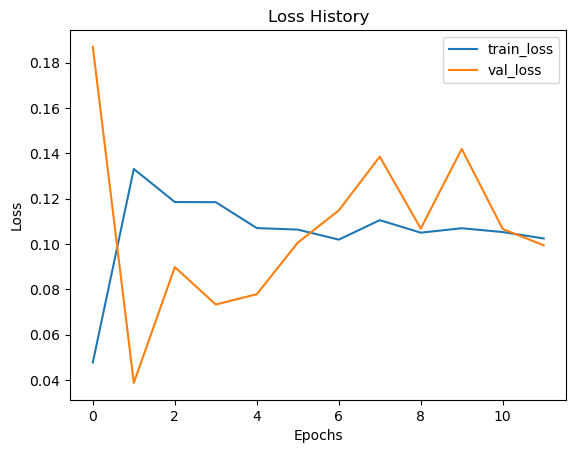

In [42]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Loss History.png")
plt.show()

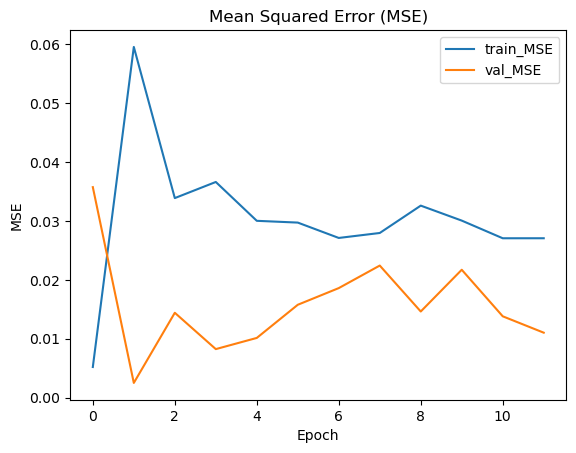

In [43]:
plt.plot(history.history['mean_squared_error'], label='train_MSE')
plt.plot(history.history['val_mean_squared_error'], label='val_MSE')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MSE History.png")
plt.show()

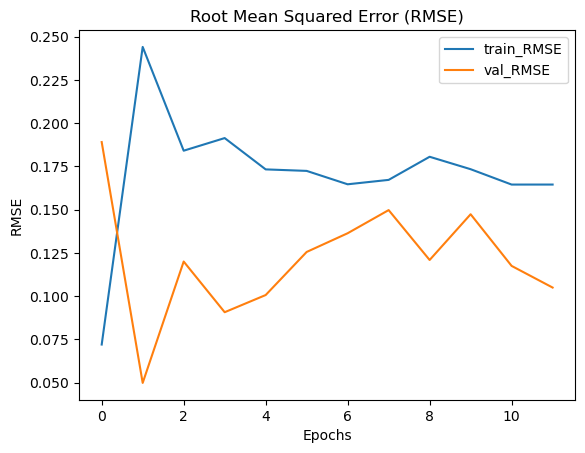

In [44]:
plt.plot(history.history['root_mean_squared_error'], label='train_RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='val_RMSE')
plt.title('Root Mean Squared Error (RMSE)')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - RMSE History.png")
plt.show()

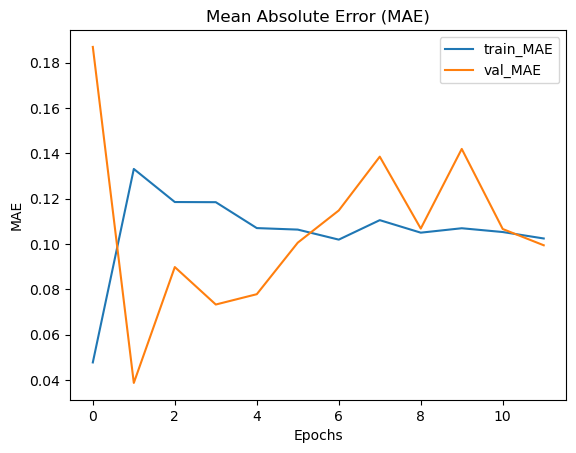

In [45]:
plt.plot(history.history['mean_absolute_error'], label='train_MAE')
plt.plot(history.history['val_mean_absolute_error'], label='val_MAE')
plt.title('Mean Absolute Error (MAE)')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAE History.png")
plt.show()

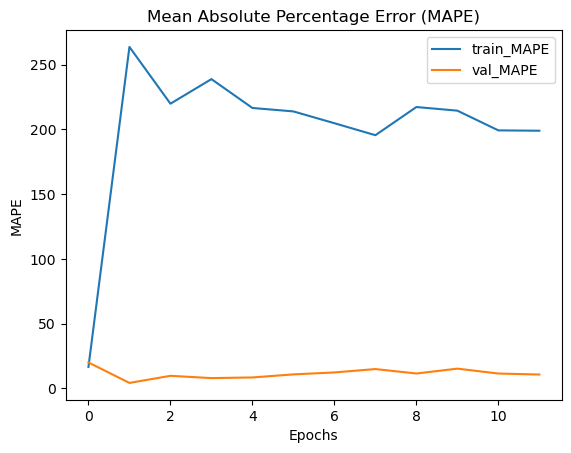

In [46]:
plt.plot(history.history['mean_absolute_percentage_error'], label='train_MAPE')
plt.plot(history.history['val_mean_absolute_percentage_error'], label='val_MAPE')
plt.title('Mean Absolute Percentage Error (MAPE)')
plt.xlabel('Epochs')
plt.ylabel('MAPE')
plt.legend()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - MAPE History.png")
plt.show()

Fazer uma predição

2025-04-14 21:05:21.087883: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Inputs Shape: (7559, 40, 1)
Labels Shape: (7559, 5, 1)
Prediction Shape: (7559, 5, 10)


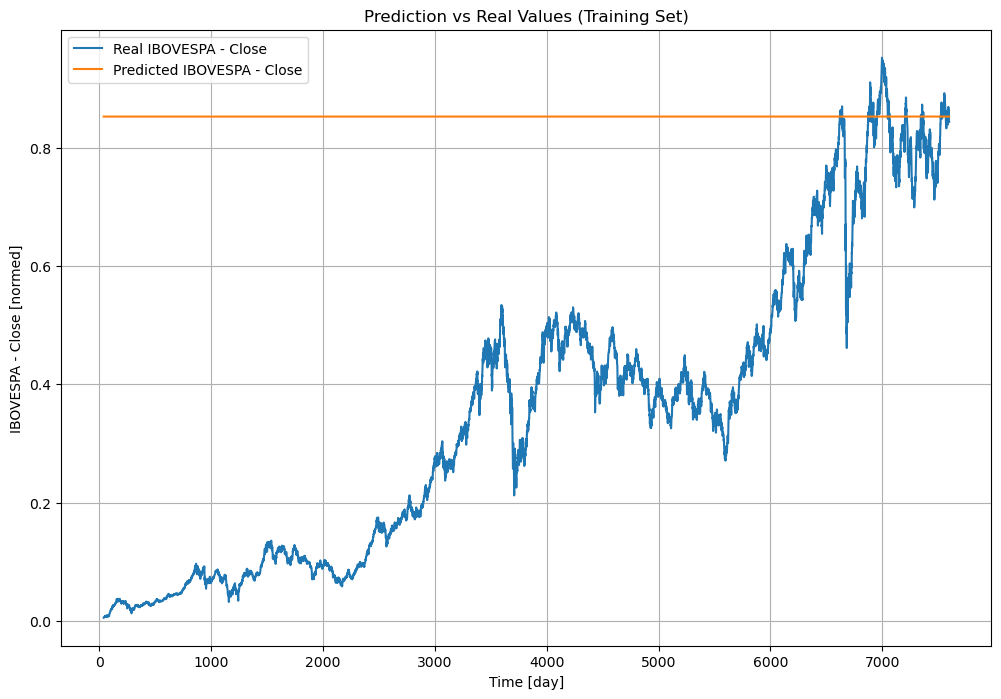

In [47]:
# create inputs and labels
inputs, labels = None, None
for train in iter(multi_window.train):
  if inputs is None:
    inputs = train[0]
    labels = train[1]
  else:
    inputs = np.concatenate((inputs, train[0]), axis=0)
    labels = np.concatenate((labels, train[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)column), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot shifted
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Training Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Training Set).png")
plt.show()

Inputs Shape: (217, 40, 1)
Labels Shape: (217, 5, 1)
Prediction Shape: (217, 5, 10)


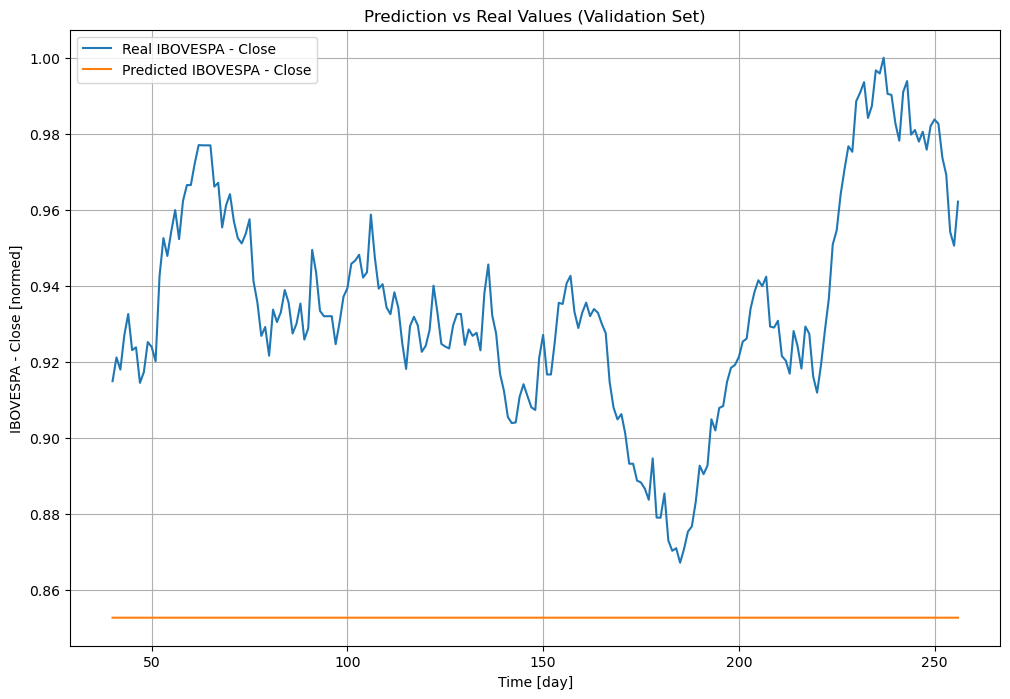

In [48]:
# create inputs and labels
inputs, labels = None, None
for val in iter(multi_window.val):
  if inputs is None:
    inputs = val[0]
    labels = val[1]
  else:
    inputs = np.concatenate((inputs, val[0]), axis=0)
    labels = np.concatenate((labels, val[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# plot the labels and predictions
# for i in range(2):#OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Validation Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save the plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Validation Set).png")
plt.show()

Inputs Shape: (85, 40, 1)
Labels Shape: (85, 5, 1)
Prediction Shape: (85, 5, 10)


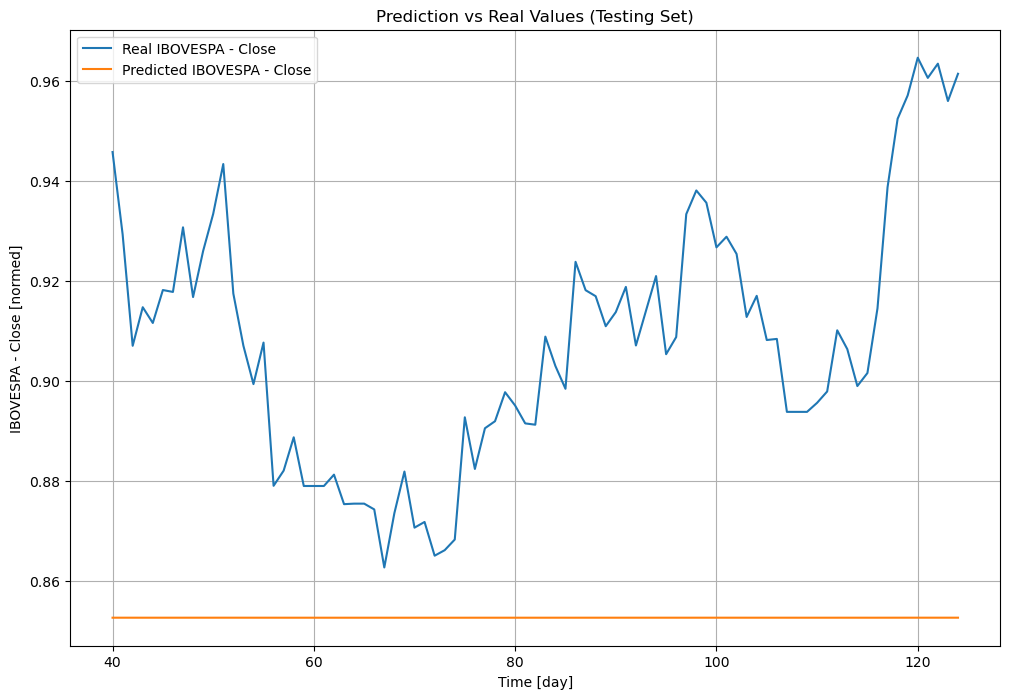

In [49]:
# create inputs and labels
inputs, labels = None, None
for test in iter(multi_window.test):
  if inputs is None:
    inputs = test[0]
    labels = test[1]
  else:
    inputs = np.concatenate((inputs, test[0]), axis=0)
    labels = np.concatenate((labels, test[1]), axis=0)
prediction = model(inputs)
print(f"Inputs Shape: {inputs.shape}")
print(f"Labels Shape: {labels.shape}")
print(f"Prediction Shape: {prediction.shape}")
# # plot the inputs
# for i, col in enumerate(COLUMNS_TO_USE):
#   plt.plot(inputs[:, i, 0], label=f"Input {col}")
# # plot the labels and predictions
# for i in range(OUTPUT_WINDOW_SIZE):
#   # create shift array with length of the input window size + index of label/prediction and fill it with None
#   shift = np.full((INPUT_WINDOW_SIZE + i), None)
#   # add labels, prediction and inputs to the plot shifted
#   if OUTPUT_WINDOW_SIZE == 1:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
#   else:
#     plt.plot(np.concatenate((shift, labels[:, i, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT} ({i+1})")
#     plt.plot(np.concatenate((shift, prediction[:, i, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT} ({i+1})")
# create shift array with length of the input window size and fill it with None
shift = np.full((INPUT_WINDOW_SIZE), None)
# add labels, prediction and inputs to the plot, with inputs shifted by the input window size
plt.plot(np.concatenate((shift, labels[:, 0, 0]), axis=0), label=f"Real {COLUMN_TO_PREDICT}")
plt.plot(np.concatenate((shift, prediction[:, 0, 0]), axis=0), label=f"Predicted {COLUMN_TO_PREDICT}")
# add legend
plt.legend()
plt.title('Prediction vs Real Values (Testing Set)')
plt.xlabel('Time [day]')
plt.ylabel(f"{COLUMN_TO_PREDICT} [normed]")
# ajustar o tamanho da figura
size = 1
plt.gcf().set_size_inches(12*size, 8*size)
plt.grid()
# save plot
plt.savefig(f"{SAVE_FILE_PATH}/plots/{save_file_name} - Prediction vs Real Values (Testing Set).png")
plt.show()

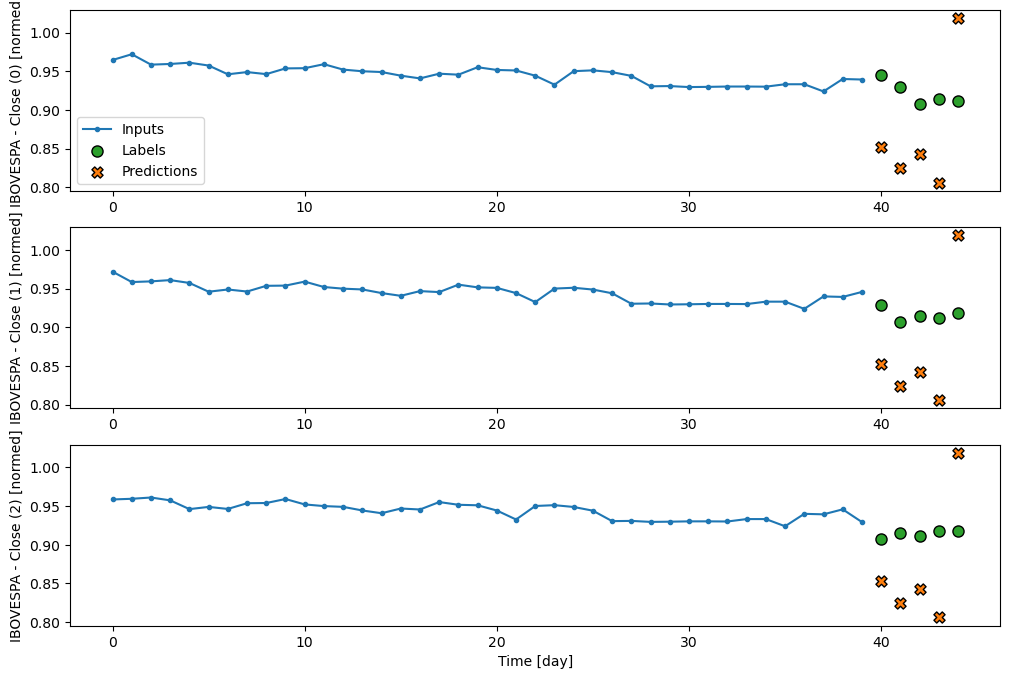

In [50]:
# multi_window.example = next(iter(multi_window.test))
multi_window.plot(model, plot_col=COLUMN_TO_PREDICT)

In [51]:
run_end = time.time()

timeMillisec = (run_end-run_start) * 10**3
# print time in format hh"h":mm"m":ss"s":ms"ms" (like 1h:2m:3s:4ms)
timeStr = str(datetime.timedelta(milliseconds=timeMillisec))
timeStr = timeStr.split(".")[0]
timeStr = timeStr.split(":")
timeStr = f"{int(timeStr[0])}h:{int(timeStr[1])}m:{int(timeStr[2])}s:{int(timeMillisec%1000)}ms"
print(f"Tempo total: {timeStr}")

Tempo total: 0h:2m:8s:555ms


In [52]:
# make a prediction
prediction = model.predict(multi_window.test)
prediction

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step


array([[[0.85260534, 0.85260534, 0.85260534, ..., 0.85260534,
         0.85260534, 0.85260534],
        [0.82446724, 0.82446724, 0.82446724, ..., 0.82446724,
         0.82446724, 0.82446724],
        [0.84267354, 0.84267354, 0.84267354, ..., 0.84267354,
         0.84267354, 0.84267354],
        [0.8058845 , 0.8058845 , 0.8058845 , ..., 0.8058845 ,
         0.8058845 , 0.8058845 ],
        [1.0189887 , 1.0189887 , 1.0189887 , ..., 1.0189887 ,
         1.0189879 , 1.0189879 ]],

       [[0.8526057 , 0.8526057 , 0.8526057 , ..., 0.8526057 ,
         0.8526057 , 0.8526057 ],
        [0.8244678 , 0.8244678 , 0.8244678 , ..., 0.8244678 ,
         0.8244678 , 0.8244678 ],
        [0.8426739 , 0.8426739 , 0.8426739 , ..., 0.8426739 ,
         0.8426739 , 0.8426739 ],
        [0.8058853 , 0.8058853 , 0.8058853 , ..., 0.8058853 ,
         0.8058853 , 0.8058853 ],
        [1.0189892 , 1.0189892 , 1.0189892 , ..., 1.0189892 ,
         1.0189884 , 1.0189884 ]],

       [[0.85260475, 0.85260475, 0.8

In [53]:
prediction.shape

(85, 5, 10)

Salvar e carregar modelo

In [54]:
# model = ...  # Get model (Sequential, Functional Model, or Model subclass)
# model.save('path/to/location.keras')  # The file needs to end with the .keras extension
# model = keras.models.load_model('path/to/location.keras')